#AIT511: Course Project 1 Notebook
Author:- Keyur Sanjaykumar Padiya

Roll no:- MT2025065

This is a report of Course Project 1 of Machine Learning. My objective is to create predictive models that can reveal hidden trends in lifestyle choices and advance knowledge of the risk factors for obesity and overweight.

For this i'll be using many manchine learning techniques, methods and concepts to get the required predictions with a good amount of accuracy.

# 1. Comprehensive EDA: Obesity Risk & Lifestyle Habits


**1.1   Data Structure: Initial inspection, data types, and missing values.**

The initial inspection revealed a high-quality dataset of 15,533 samples with zero missing values, simplifying the entire preprocessing phase. The data consists of a rich, mixed set of 17 features (8 numerical and 9 categorical), with the target variable, WeightCategory, confirming the task as multi-class classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')
print("Libraries loaded and settings applied.")

df = pd.read_csv("/content/drive/MyDrive/Obesity Data/train.csv")
print("Data loaded successfully.")
print(df.head())

print("\n--- Data Info ---")
df.info()
print(df.isnull().sum())
if 'id' in df.columns:
    df = df.drop('id', axis=1)

Libraries loaded and settings applied.
Data loaded successfully.
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE    

**1.2: Target Variable Analysis**

Now, let's focus on the variable we are trying to predict: **WeightCategory**. We'll plot its distribution to understand how many categories there are and how balanced they are.

This confirms the task as a **multi-class classification problem**, immediately justifying the exclusion of regression models like **Linear Regression** . The target variable is adequately balanced, with categories ranging from **$\approx 11.9\%$ to $\approx 19.2\%$**; this even distribution ensures all models have sufficient data to learn each class, making advanced sampling techniques unnecessary.


--- Target Variable Analysis ---
Normalized Target Variable Value Counts:
WeightCategory
Obesity_Type_III       9.602137
Obesity_Type_II        7.735145
Normal_Weight          7.548445
Obesity_Type_I         7.104230
Overweight_Level_II    6.054851
Insufficient_Weight    6.019442
Overweight_Level_I     5.935750
Name: proportion, dtype: float64
Saved plot: weight_category_distribution.png


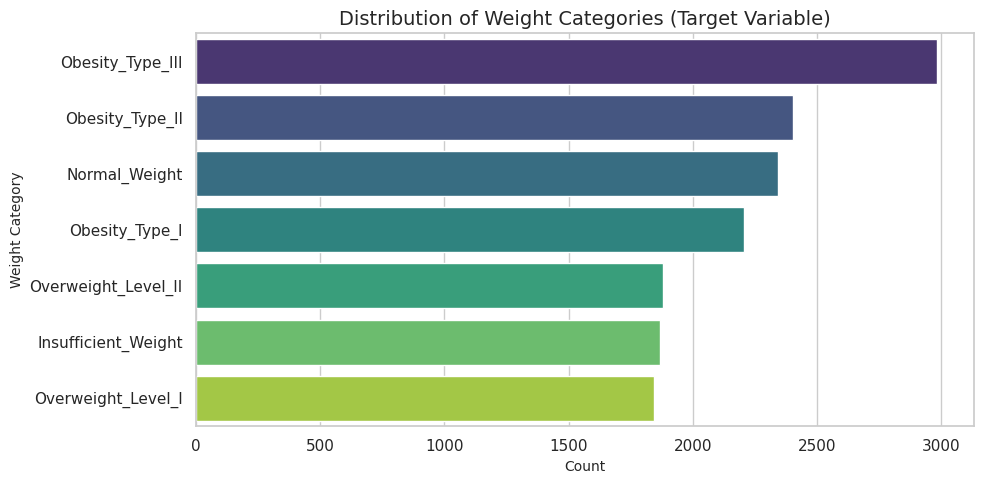

In [ ]:
print("\n--- Target Variable Analysis ---")

# Print the value counts
print("Normalized Target Variable Value Counts:")
print(df['WeightCategory'].value_counts(normalize=True) * 50)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='WeightCategory', order=df['WeightCategory'].value_counts().index,palette="viridis")
plt.title('Distribution of Weight Categories (Target Variable)', fontsize=14)
plt.xlabel('Count', fontsize=10)
plt.ylabel('Weight Category', fontsize=10)
plt.tight_layout()
plt.savefig('weight_category_distribution.png')
print("Saved plot: weight_category_distribution.png")
# plt.show() # Uncomment this line if running in a local environment

**1.3: Numerical Feature Analysis**

Let's explore the 8 numerical features. We will:
1.  Get descriptive statistics (mean, min, max, etc.).
2.  Plot histograms to see their individual distributions.
3.  Create box plots to see how their distributions vary across each `WeightCategory`.

The numerical feature analysis confirmed that Weight is an extremely strong predictor, with its distributions showing minimal overlap across the seven target categories . While features like Age and Height exhibit clear trends, the analysis also revealed complex, non-linear relationships in lifestyle factors like FAF (e.g., the U-shaped pattern observed). This complexity, along with varied feature shapes (normal vs. skewed), strongly validates using Decision Tree and Boosting models, as they inherently capture these non-linear rules without relying on distributional assumptions.


--- Numerical Feature Analysis ---
--- Descriptive Statistics (Numerical Features) ---
                Age        Height        Weight          FCVC           NCP  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean      23.816308      1.699918     87.785225      2.442917      2.760425   
std        5.663167      0.087670     26.369144      0.530895      0.706463   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.630927     66.000000      2.000000      3.000000   
50%       22.771612      1.700000     84.000000      2.342220      3.000000   
75%       26.000000      1.762921    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  
mean       2.027626      0.976968      0.613813  
std        0.607733      0.836841      0.602223  


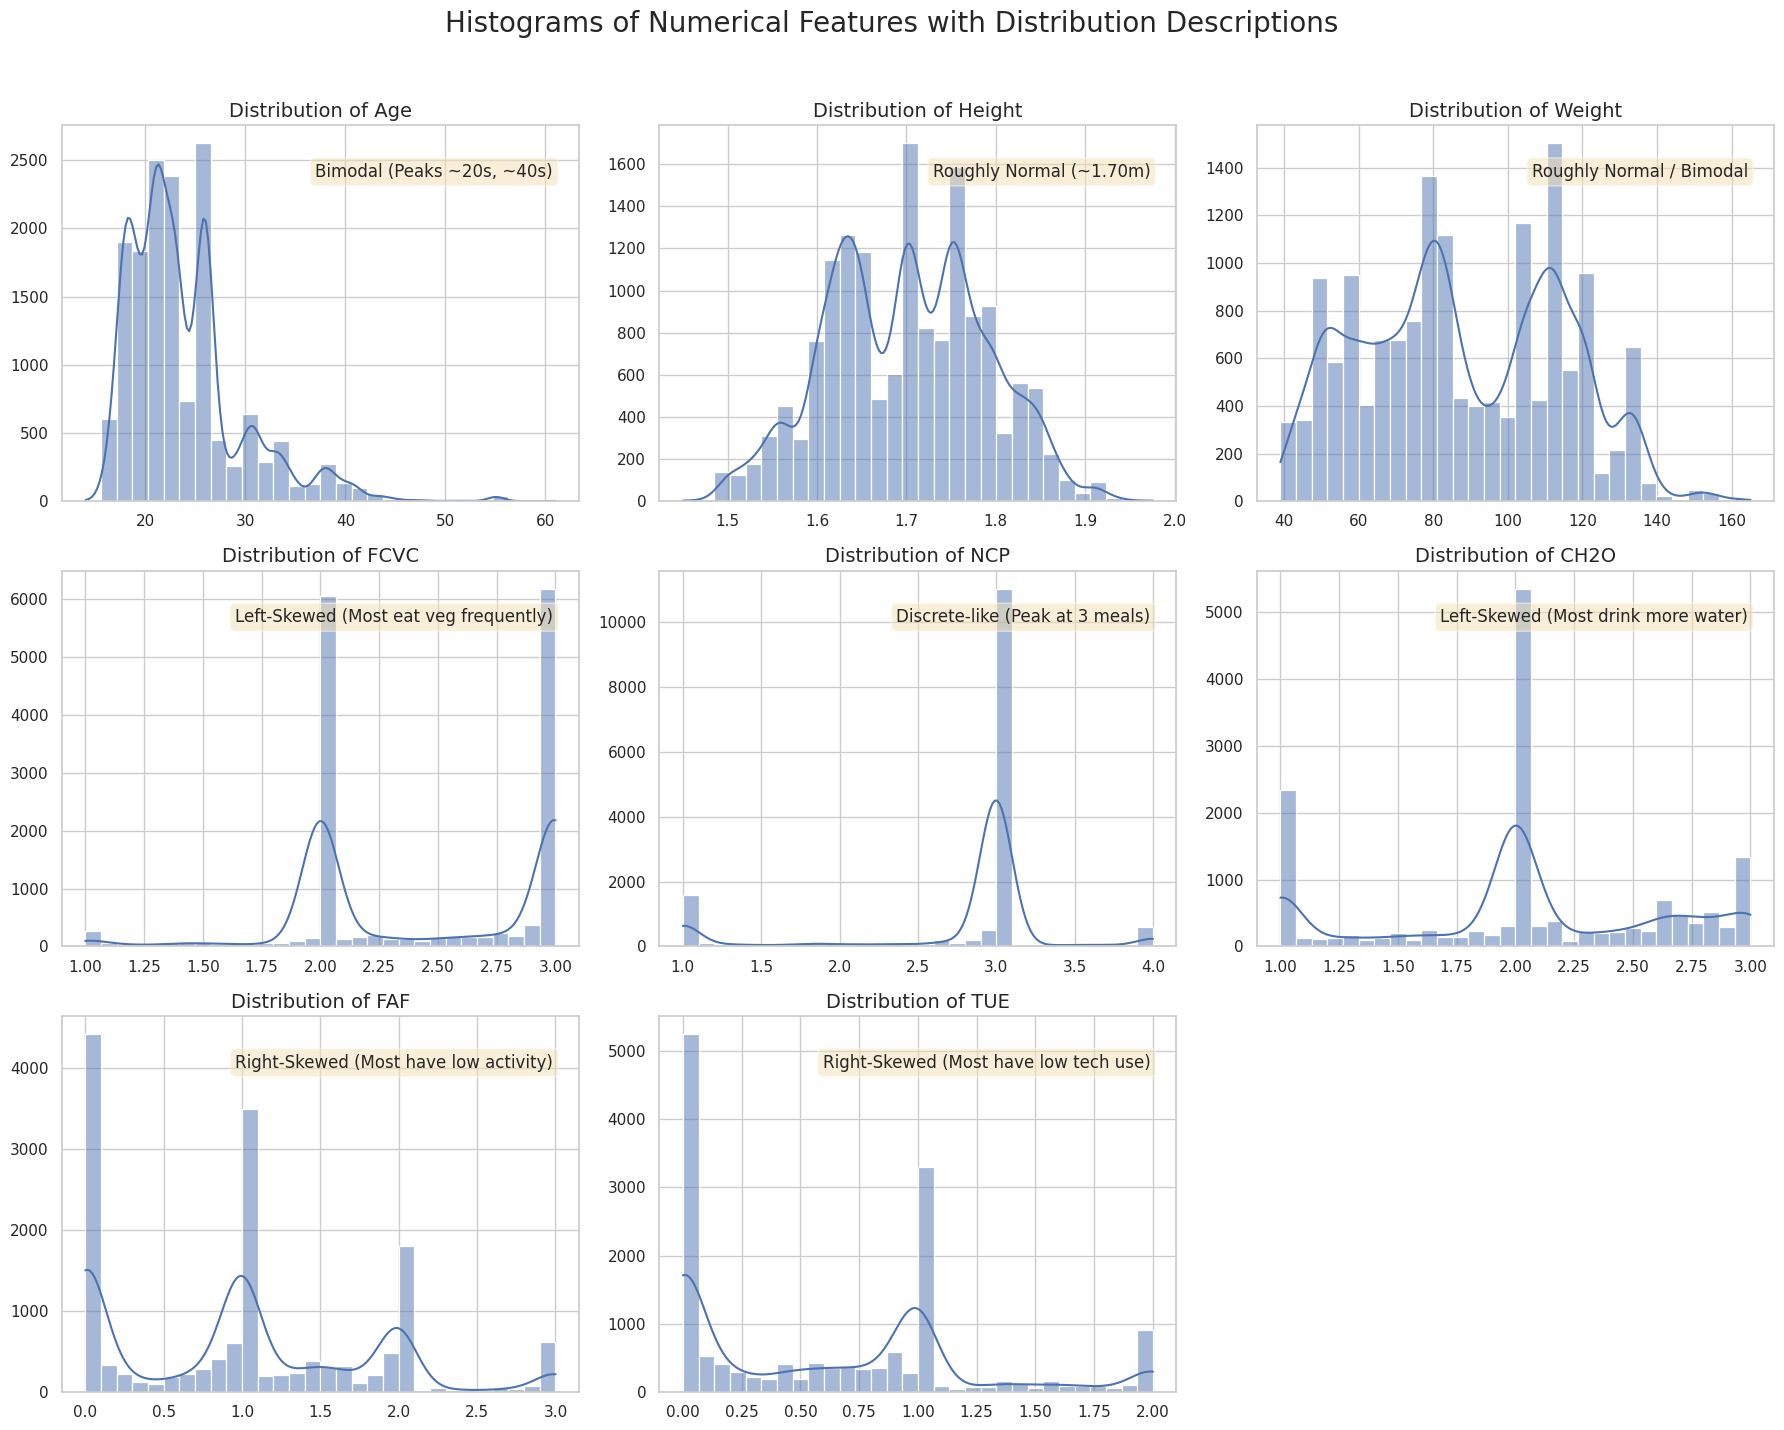

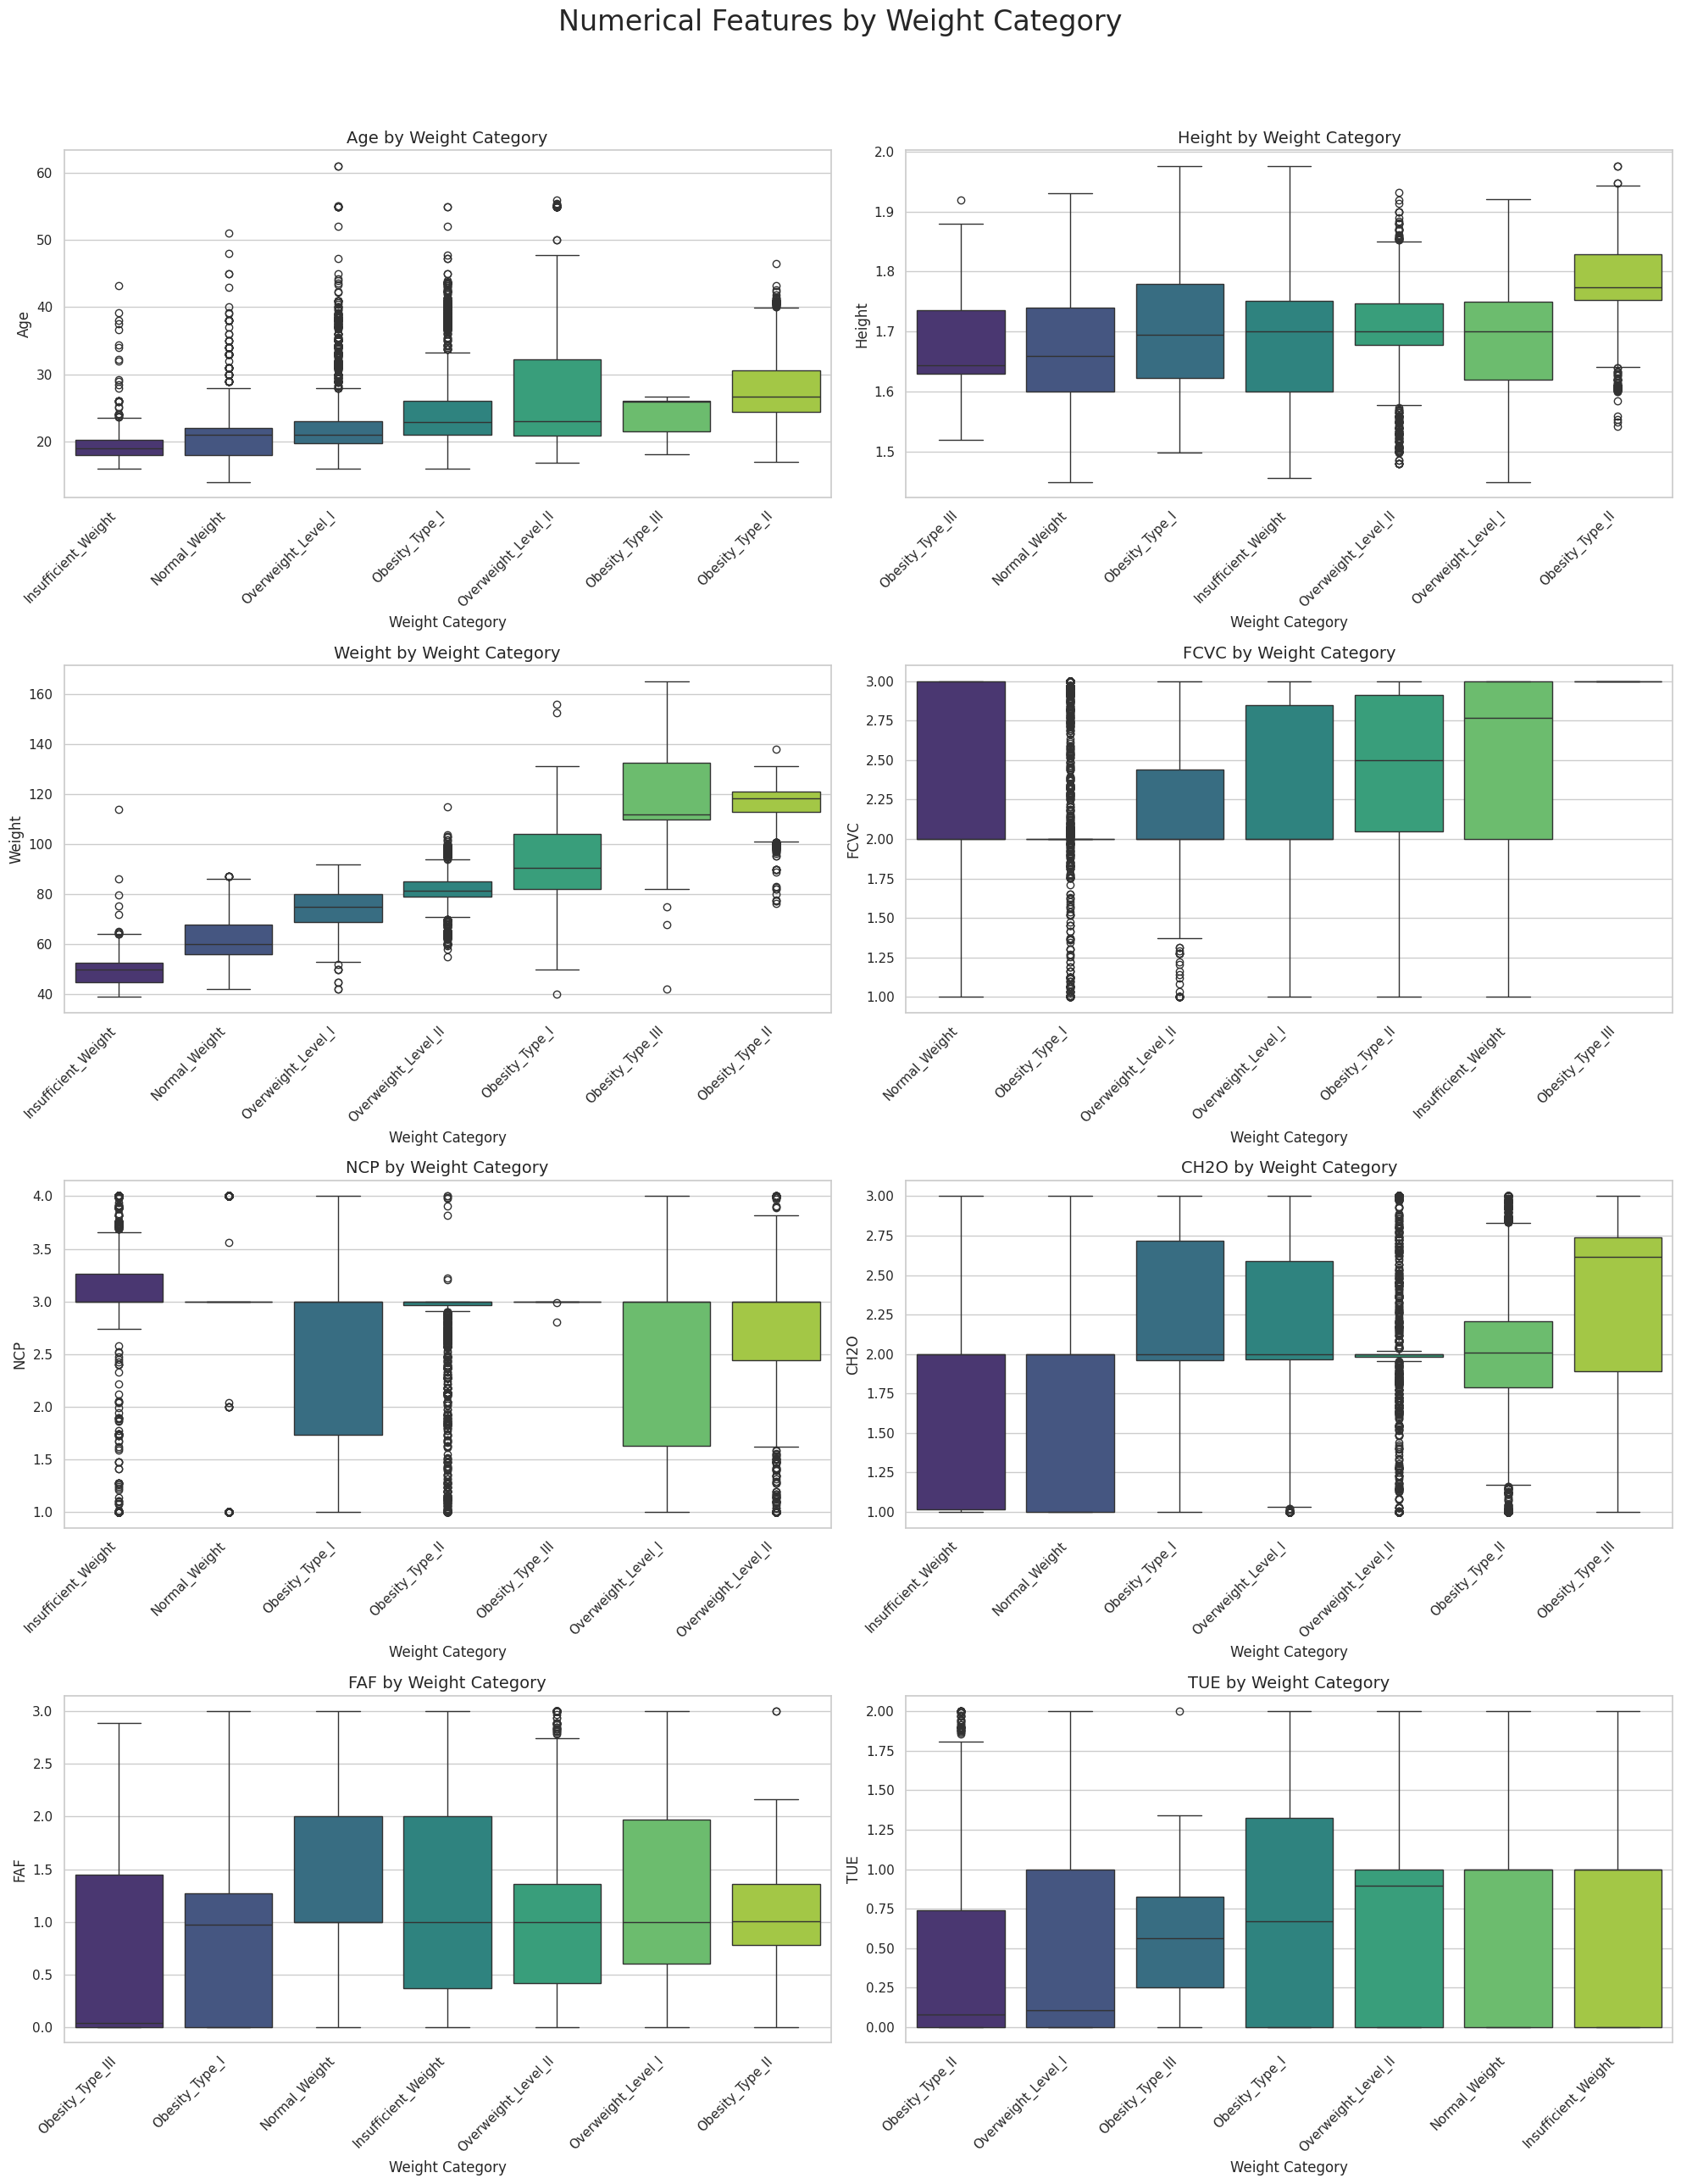

In [ ]:
print("\n--- Numerical Feature Analysis ---")

# Get descriptive statistics
numerical_features = df.select_dtypes(include=[np.number]).columns
print("--- Descriptive Statistics (Numerical Features) ---")
print(df[numerical_features].describe())

# Plot distributions (Histograms)
fig, axes = plt.subplots(3, 3, figsize=(18, 14)) # Slightly larger figure
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Dictionary of descriptions
descriptions = {
    'Age': 'Bimodal (Peaks ~20s, ~40s)',
    'Height': 'Roughly Normal (~1.70m)',
    'Weight': 'Roughly Normal / Bimodal',
    'FCVC': 'Left-Skewed (Most eat veg frequently)',
    'NCP': 'Discrete-like (Peak at 3 meals)',
    'CH2O': 'Left-Skewed (Most drink more water)',
    'FAF': 'Right-Skewed (Most have low activity)',
    'TUE': 'Right-Skewed (Most have low tech use)'
}

# Loop through each numerical feature and plot it
for i, col in enumerate(numerical_features):
    ax = axes[i] # Select the appropriate subplot
    # Plot the histogram with Kernel Density Estimate (KDE)
    sns.histplot(df[col], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('') # Remove x-axis label for cleaner look
    ax.set_ylabel('') # Remove y-axis label for cleaner look

    # --- Add text annotation ---
    # Get the current plot limits to position the text dynamically
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Calculate position for the text box (top-right corner)
    x_pos = xlim[0] + (xlim[1] - xlim[0]) * 0.95 # 95% across x-axis
    y_pos = ylim[1] * 0.9 # 90% up y-axis

    # Get the description text for the current column
    description = descriptions.get(col, '') # Get description or empty string if not found

    # Add the text to the plot
    ax.text(x_pos, y_pos, description,
            horizontalalignment='right', # Align text to the right edge of x_pos
            verticalalignment='top',    # Align text to the top edge of y_pos
            fontsize=12,
            # Add a background box for better readability
            bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

# Remove any unused subplots (if number of features is less than 9)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Add a main title for the entire figure
fig.suptitle('Histograms of Numerical Features with Distribution Descriptions', fontsize=20, y=1.02)
# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0, 1, 1])
# Save the figure to a file
plt.savefig('numerical_feature_histograms_annotated.png')
print("Saved annotated plot: numerical_feature_histograms_annotated.png")
# plt.show() # Uncomment to display plot if running locally
# Plot box plots vs. WeightCategory
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 2, i + 1)
    order = df.groupby('WeightCategory')[col].median().sort_values().index
    sns.boxplot(data=df, x='WeightCategory', y=col, order=order,palette="viridis")
    plt.title(f'{col} by Weight Category', fontsize=14)
    plt.xlabel('Weight Category', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(rotation=45, ha='right')
plt.suptitle('Numerical Features by Weight Category', fontsize=24, y=1.03)
plt.tight_layout()
plt.savefig('numerical_features_vs_target_boxplots.png')
print("Saved plot: numerical_features_vs_target_boxplots.png")
# plt.show() # Uncomment this line

**1.4: Correlation and Multicollinearity**

Now, let's check for correlations among the numerical features. High correlation (multicollinearity) can be problematic for some models and suggests feature redundancy. This step is key to justifying the use of PCA.

The numerical features exhibit moderate correlations (e.g., 0.45 between Height and Weight) that violate the independence assumption of Naive Bayes, explaining its poor performance. While PCA was initially justified for KNN to address dimensionality, its transformation of features was ultimately unhelpful , as it diluted the clear, direct signal of the dominant predictor, Weight, which is better handled by tree-based models.


--- Correlation Analysis ---
Saved plot: correlation_heatmap.png


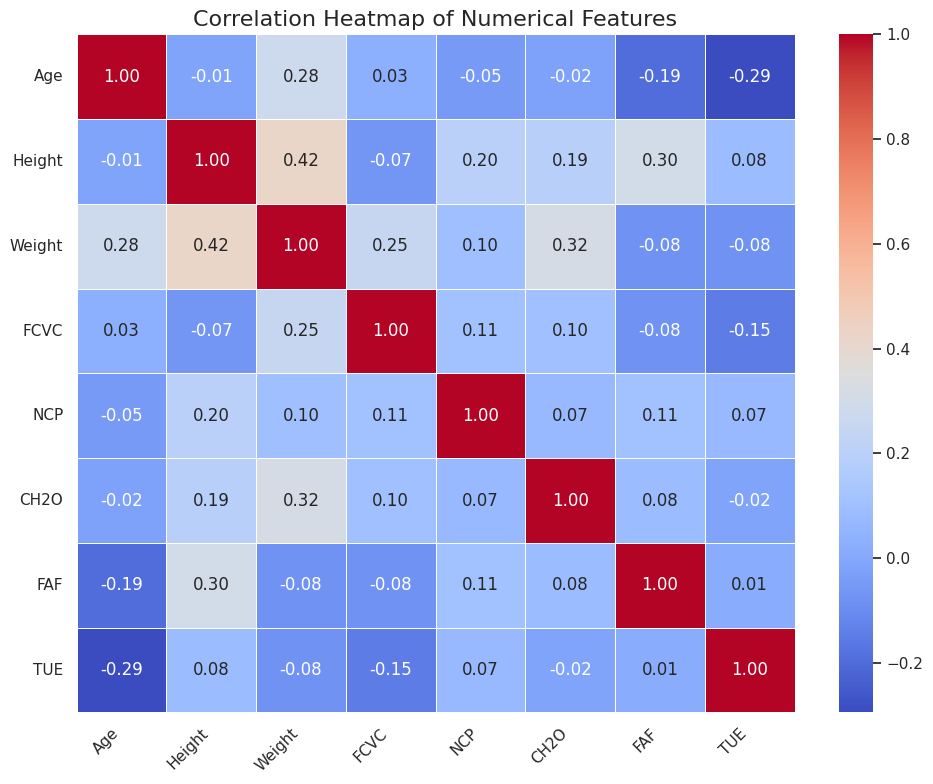

In [ ]:
print("\n--- Correlation Analysis ---")

# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("Saved plot: correlation_heatmap.png")
plt.show()

**Why PCA won't be Helpful for This Specific Problem?**

PCA's job is to create new, simplified features by combining the original ones based on variance. However, this process often dilutes the most critical information when one feature is overwhelmingly powerful, as is the case here with Weight.The EDA suggests tree-based models (which excel at using dominant features for splitting) are most suitable, PCA is logically counterproductive here.

**1.5: Categorical Feature Analysis**

Next, we'll analyze the categorical features to see how they relate to WeightCategory. We'll use stacked or grouped count plots to visualize this.

The categorical features, particularly family_history_with_overweight, MTRANS, and CAEC, proved highly predictive, revealing strong correlations with obesity categories in the plots . This provides compelling evidence for using tree-based models (like Random Forest and XGBoost), as they excel at learning the explicit rules suggested by these distributions. While these patterns also suit Naive Bayes conceptually, the requirement for one-hot encoding drastically increases dimensionality, making distance-based models like KNN less suitable due to the curse of dimensionality, unless techniques like PCA are employed first.


--- Categorical Feature Analysis ---
Categorical Features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Saved plot: categorical_features_vs_target.png


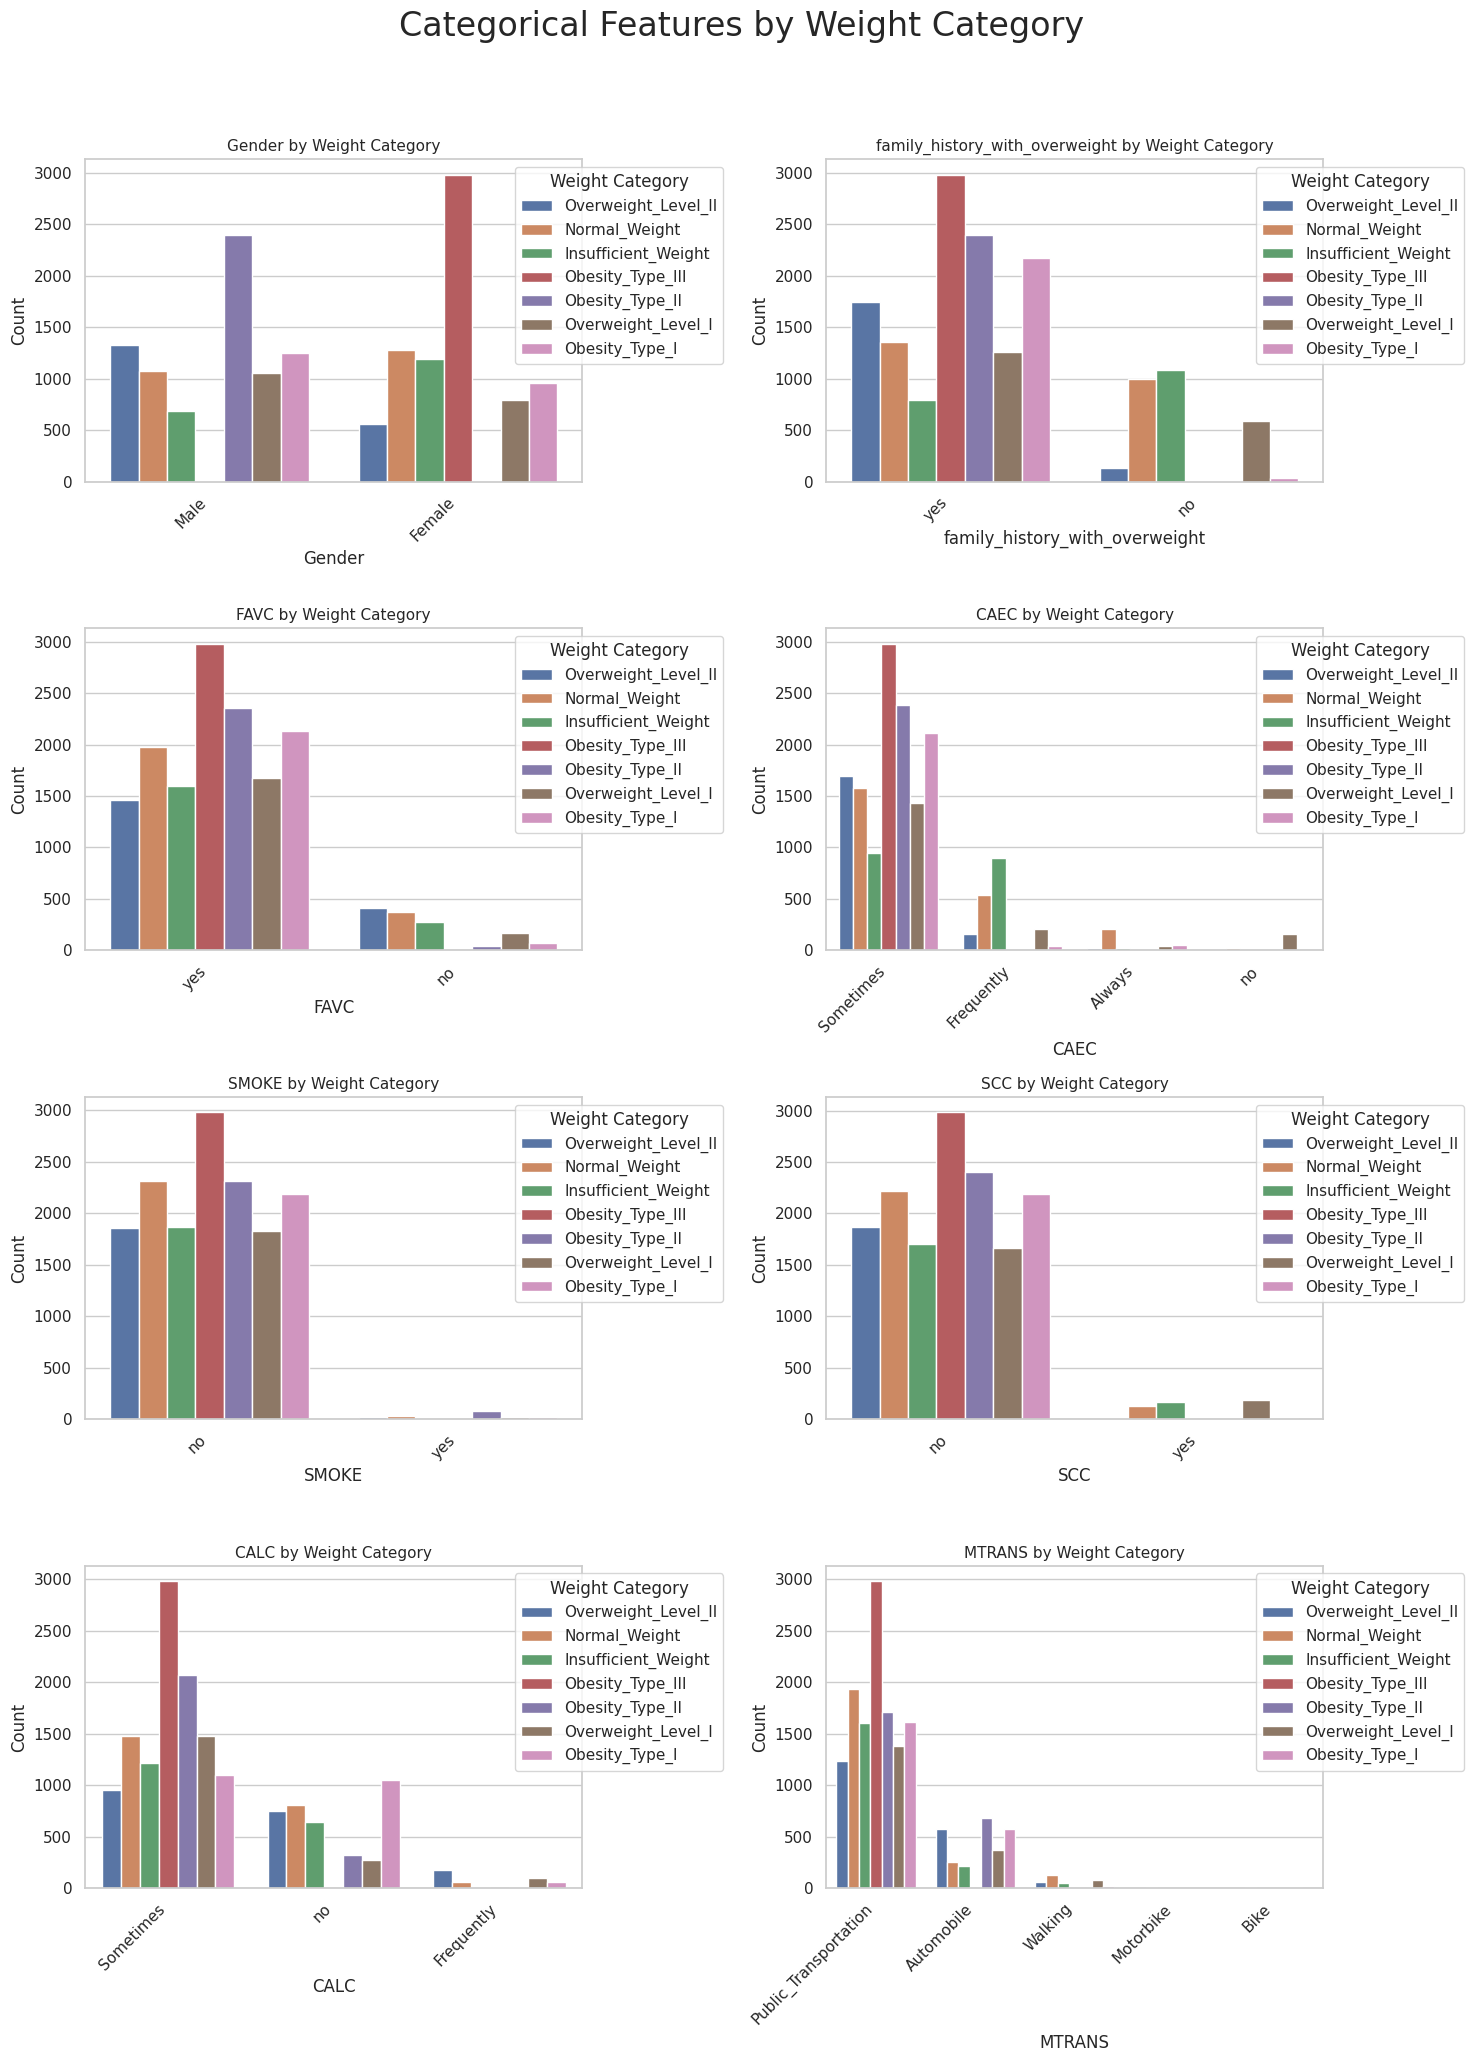

In [ ]:
print("\n--- Categorical Feature Analysis ---")

categorical_features = df.select_dtypes(include=['object']).columns.drop('WeightCategory')
print(f"Categorical Features: {list(categorical_features)}")

# Plot count plots for each categorical feature, grouped by WeightCategory
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=col, hue='WeightCategory', order=df[col].value_counts().index)
    plt.title(f'{col} by Weight Category', fontsize=11)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    # Place legend outside the plot
    plt.legend(title='Weight Category', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.suptitle('Categorical Features by Weight Category', fontsize=24, y=1.03)
plt.tight_layout()
plt.savefig('categorical_features_vs_target.png')
print("Saved plot: categorical_features_vs_target.png")
plt.show()

**1.6: Multivariate Analysis (PCA Visualization)**

Let's directly visualize the justification for PCA and K-NN. We will:
1.  Scale the numerical data (a requirement for PCA).
2.  Apply PCA to reduce the 8 numerical features down to 2 principal components.
3.  Plot these 2 components in a scatter plot, coloring the points by their WeightCategory.
This shows us if the classes are "separable" in a lower-dimensional space.


--- PCA Visualization ---
Saved tweaked plot: pca_plot_tweaked.png

Explained variance by PC1: 22.48%
Explained variance by PC2: 19.69%
Total explained variance by 2 components: 42.17%


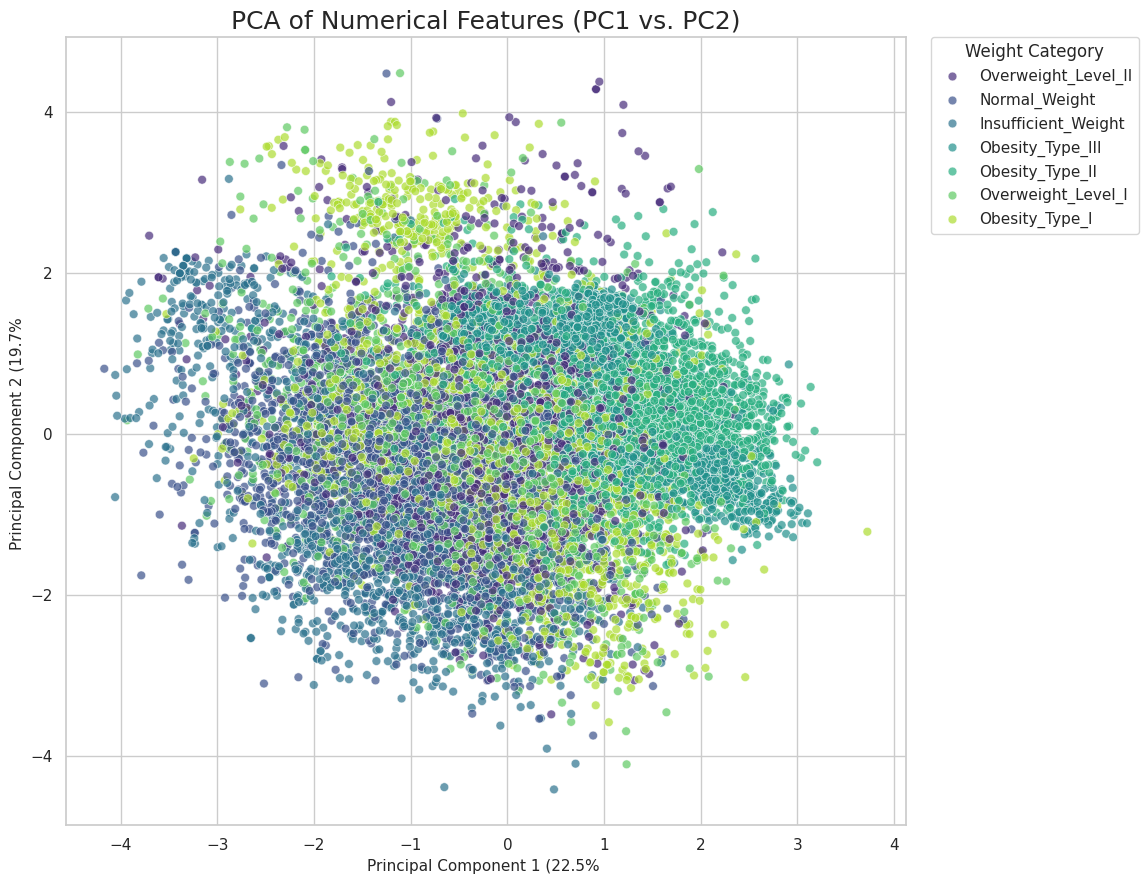

In [ ]:

print("\n--- PCA Visualization ---")

# Separate numerical features and scale them
scaler = StandardScaler()
# Ensure only numerical features are selected if 'WeightCategory' was accidentally included
df_numerical = df[numerical_features]
df_scaled = scaler.fit_transform(df_numerical)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['WeightCategory'] = df['WeightCategory']

# --- Plot the PCA components---
plt.figure(figsize=(13, 9)) #
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='WeightCategory',
    palette='viridis',
    s=40,
    alpha=0.7
)

plt.title('PCA of Numerical Features (PC1 vs. PC2)', fontsize=18) # Slightly larger title
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} ', fontsize=11)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} ', fontsize=11)

# Adjust legend placement to ensure it's outside
plt.legend(title='Weight Category', bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

plt.grid(True) # Keep grid lines
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout slightly to make space for legend if outside
plt.savefig('pca_plot_tweaked.png')
print("Saved tweaked plot: pca_plot_tweaked.png")
# plt.show()

print(f"\nExplained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total explained variance by 2 components: {np.sum(pca.explained_variance_ratio_):.2%}")


The PCA visualization of numerical features shows distinct clustering, with obesity types grouping together and Insufficient_Weight separating clearly . However, the first two components only capture ~42% of the variance, and significant overlap exists between Normal_Weight and Overweight categories. This visual clustering confirms the suitability of K-NN (as neighborhoods exist), while the extensive overlap simultaneously highlights the need for powerful, non-linear models like Random Forest and Gradient Boosting to effectively capture the complex decision boundaries.

# 2. Data Preprocessing steps

Data preprocessing encompasses a series of techniques used to clean, transform, and organize raw data before feeding it into machine learning models. Quality preprocessing directly impacts model performance, accuracy, and reliability.Data preprocessing is a critical step in machine learning pipelines that directly impacts model performance.

**2.1: Data Loading & Exploration**

By examining the shape and types, you can check if the dataset is imbalanced, contains enough observations for learning, and if the data types are compatible with your model.

The raw training and test datasets were successfully loaded, and non-predictive id columns were removed. Features (X) and the target (y) were cleanly separated, establishing distinct datasets for training the preprocessors and the final model, and for generating predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("/content/drive/MyDrive/Obesity Data/train.csv")
df_test = pd.read_csv('/content/drive/MyDrive/Obesity Data/test.csv')

print(df.shape)              # Dimensions
print(df.info())             # Data types
print(df.describe())         # Statistical summary
print(df.head())             # Sample rows
print(df.dtypes)             # Column types


(15533, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                 

**2.2: Identify Feature Types**

Before applying specific transformations, we must identify which columns are numerical and which are categorical. This allows us to apply the correct preprocessing step (scaling or encoding) to each type.

The script correctly identified 8 numerical and 9 categorical features based on their data types, enabling the application of appropriate, distinct transformations (scaling vs. encoding) in the subsequent steps.

In [ ]:
X = df.drop(['id', 'WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

print(f"Identified {len(categorical_cols)} categorical columns: {list(categorical_cols)}")
print(f"Identified {len(numerical_cols)} numerical columns: {list(numerical_cols)}")

Identified 8 categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Identified 8 numerical columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


**2.3 :Handle Categorical Features (One-Hot Encoding)**

The EDA identified 9 categorical features. Tree-based models like XGBoost require numerical input. One-Hot Encoding converts these text-based categories into binary (0/1) columns, allowing the model to process them. Using drop_first=True avoids creating perfectly collinear features. Crucially, the columns must be aligned between the training and test sets after encoding to ensure they have the exact same structure.

In [ ]:
test_ids = df_test['id']
X_test_official = df_test.drop('id', axis=1)
print("Applying One-Hot Encoding...")

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
print(f"Training data shape after OHE: {X.shape}")

X_test_official = pd.get_dummies(X_test_official, columns=categorical_cols, drop_first=True, dtype=int)
print(f"Test data shape after OHE: {X_test_official.shape}")

print("Aligning columns between train and test sets...")
X, X_test_official = X.align(X_test_official, join='inner', axis=1, fill_value=0)

print("Columns aligned.")
print(f"Shape after alignment: X={X.shape}, X_test_official={X_test_official.shape}")

Applying One-Hot Encoding...
Training data shape after OHE: (15533, 22)
Test data shape after OHE: (5225, 22)
Aligning columns between train and test sets...
Columns aligned.
Shape after alignment: X=(15533, 22), X_test_official=(5225, 22)


**2.4: Handle Numerical Features (Standard Scaling)**

The 8 numerical features have different scales. While XGBoost is somewhat robust to this, applying Standard Scaling standardizes the features (mean=0, std dev=1). This can sometimes help the gradient boosting process converge more smoothly. The scaler is fitted only on the training data and then used to transform both train and test sets to prevent data leakage.

In [ ]:
print("Applying Standard Scaling...")

num_features_to_scale = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
num_features_to_scale = [col for col in num_features_to_scale if col in X.columns]

scaler = StandardScaler()

scaler.fit(X[num_features_to_scale])
print("Scaler fitted on training data.")

X[num_features_to_scale] = scaler.transform(X[num_features_to_scale])
X_test_official[num_features_to_scale] = scaler.transform(X_test_official[num_features_to_scale])
print("Scaling applied to both datasets.")

print("\nSample scaled training data (first 5 rows):")
print(X.head())

Applying Standard Scaling...
Scaler fitted on training data.
Scaling applied to both datasets.

Sample scaled training data (first 5 rows):
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0  0.110667  0.000910 -0.231918 -0.834311  0.315486  1.211010 -1.167485   
1 -1.027075 -1.596015 -1.167509 -0.834311  0.339130 -0.045459  0.027524   
2 -1.027075  0.131655 -1.426693 -1.059346 -1.909206 -0.192933 -0.132554   
3 -0.505665  0.123328  1.649315  1.049363  0.339130 -0.581796  0.586624   
4  1.381740  2.444105  0.228033  0.445954 -1.116801 -0.078619  1.184260   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.602221            1                                   1  ...   
1  0.641290            0                                   1  ...   
2  1.759822            0                                   1  ...   
3  0.276295            0                                   1  ...   
4  0.527908            1                                   1  ..

**2.5: Handle Target Variable (Label Encoding)**

The target variable WeightCategory needs to be converted from text labels to integers (0, 1, 2... 6) for XGBoost's multi:softmax objective. Label Encoding achieves this mapping.

Label Encoding successfully transformed the 7 distinct text labels of the WeightCategory target variable into the required integer format (0-6) for XGBoost's multi-class classification objective (multi:softmax).

In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Applying Label Encoding to the target variable...")

le = LabelEncoder()

y_enc = le.fit_transform(y)
print("Target variable Label Encoded.")

print("\nLabel Encoding Mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} -> {i}")

print("\nPreprocessing pipeline complete. Data is ready for model training.")

Applying Label Encoding to the target variable...
Target variable Label Encoded.

Label Encoding Mapping:
Insufficient_Weight -> 0
Normal_Weight -> 1
Obesity_Type_I -> 2
Obesity_Type_II -> 3
Obesity_Type_III -> 4
Overweight_Level_I -> 5
Overweight_Level_II -> 6

Preprocessing pipeline complete. Data is ready for model training.


## 3. Data Preprocessing steps

#**Naive Bayes Classifier**

Best Output/Test Accuracy :- .63305

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from google.colab import drive

df = pd.read_csv("/content/drive/MyDrive/Obesity Data/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Obesity Data/test.csv")

df = df.drop('id', axis=1)

X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train_full = X.copy()
y_train_full = y.copy()
test_df_ids = df_test['id']
X_test_official = df_test.drop('id', axis=1)

X_train_cat = pd.get_dummies(X_train_full[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test_official[categorical_cols], drop_first=True, dtype=int)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)
X_test_cat = X_test_cat.fillna(0)

X_train_manual = pd.concat([X_train_full.drop(columns=categorical_cols).reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_official.drop(columns=categorical_cols).reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual[numerical_cols])

X_train_manual[numerical_cols] = scaler.transform(X_train_manual[numerical_cols])
X_test_manual[numerical_cols] = scaler.transform(X_test_manual[numerical_cols])

gnb = GaussianNB()
gnb.fit(X_train_manual, y_train_full)

y_pred_official = gnb.predict(X_test_manual)

submission_df = pd.DataFrame({'id': test_df_ids, 'WeightCategory': y_pred_official})
submission_df.to_csv('weight_naive_bayes_submission_MT2025065.csv', index=False)
print(submission_df.head())

      id       WeightCategory
0  15533     Obesity_Type_III
1  15534       Obesity_Type_I
2  15535      Obesity_Type_II
3  15536      Obesity_Type_II
4  15537  Insufficient_Weight


#**KNN with PCA**
Best Output/Test Accuracy :- .71763

This code justifies why PCA gives low accuracy, the code applies PCA on one-hot encoded and scaled features and uses only 10 principal components for KNN classification. PCA reduces dimensionality based purely on global variance without considering class labels or separability. This can lead to loss of important discriminative information because the principal components maximizing variance may not align with directions that separate classes well. Hence, PCA might discard features useful for classification, limiting accuracy improvement. In datasets where class-distinguishing features contribute less to total variance, PCA can actually degrade classification performance rather than help.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')

df_train = df_train.drop('id', axis=1)
X_train_full = df_train.drop('WeightCategory', axis=1)
y_train_full = df_train['WeightCategory']

test_df_ids = df_test['id']

if 'WeightCategory' in df_test.columns:
    X_test_official = df_test.drop(['id', 'WeightCategory'], axis=1)
    y_test_official = df_test['WeightCategory']
else:
    X_test_official = df_test.drop('id', axis=1)
    y_test_official = None

numerical_cols = X_train_full.select_dtypes(include=['float64']).columns
categorical_cols = X_train_full.select_dtypes(include=['object']).columns

X_train_cat = pd.get_dummies(X_train_full[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test_official[categorical_cols], drop_first=True, dtype=int)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)
X_test_cat = X_test_cat.fillna(0)

X_train_manual = X_train_full.drop(columns=categorical_cols)
X_test_manual = X_test_official.drop(columns=categorical_cols)

X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual)

X_train_scaled = scaler.transform(X_train_manual)
X_test_scaled = scaler.transform(X_test_manual)

n_components = 10
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_full)

y_pred_official = knn.predict(X_test_pca)

if y_test_official is not None:
    accuracy = accuracy_score(y_test_official, y_pred_official)
    print(f"Accuracy on Test Set: {accuracy:.4f}")
    print(classification_report(y_test_official, y_pred_official, zero_division=0))
    plt.figure(figsize=(10, 8))
    labels = np.unique(y_test_official)
    sns.heatmap(confusion_matrix(y_test_official, y_pred_official),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix for KNN/PCA on Test Data')
    plt.show()

submission_df = pd.DataFrame({
    'id': test_df_ids,
    'WeightCategory': y_pred_official
})

submission_df.to_csv('weight_knn_submission_MT2025065.csv', index=False)
print(df.head())

   Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS       WeightCategory  
0  0.976473  Sometimes  Public_Tran

#**Bagging**
Best Output/Test Accuracy :- .90688

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
file_path_train = '/content/drive/MyDrive/Obesity Data/train.csv'
df_train = pd.read_csv(file_path_train)
df = df_train.drop('id', axis=1)
X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True, dtype=int)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)
X_train_manual = X_train.drop(columns=categorical_cols)
X_test_manual = X_test.drop(columns=categorical_cols)
X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)
scaler = StandardScaler()
numerical_cols_to_scale = [col for col in numerical_cols if col in X_train_manual.columns and col not in categorical_cols]
scaler.fit(X_train_manual[numerical_cols_to_scale])
X_train_manual[numerical_cols_to_scale] = scaler.transform(X_train_manual[numerical_cols_to_scale])
X_test_manual[numerical_cols_to_scale] = scaler.transform(X_test_manual[numerical_cols_to_scale])
base_estimator = DecisionTreeClassifier(max_depth=30, min_samples_leaf=3, random_state=50)
bagging_model = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=1000,
    max_features=0.6,
    random_state=50,
    n_jobs=-1
)
bagging_model.fit(X_train_manual, y_train)
y_pred = bagging_model.predict(X_test_manual)
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.5f}")
print("Validation Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Validation Accuracy: 0.90119
Validation Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.93       374
      Normal_Weight       0.87      0.90      0.89       469
     Obesity_Type_I       0.89      0.86      0.87       441
    Obesity_Type_II       0.95      0.98      0.96       481
   Obesity_Type_III       0.99      1.00      1.00       597
 Overweight_Level_I       0.82      0.73      0.77       369
Overweight_Level_II       0.80      0.82      0.81       376

           accuracy                           0.90      3107
          macro avg       0.89      0.89      0.89      3107
       weighted avg       0.90      0.90      0.90      3107



#**Random Forest**
Best Output/Test Accuracy :- .90578

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import os

warnings.filterwarnings("ignore")

df = pd.read_csv("/content/drive/MyDrive/Obesity Data/train.csv")

df = df.drop('id', axis=1)
X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']

X_internal_train, X_internal_val, y_internal_train, y_internal_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_internal_train = X_internal_train.reset_index(drop=True)
X_internal_val = X_internal_val.reset_index(drop=True)
y_internal_train = y_internal_train.reset_index(drop=True)
y_internal_val = y_internal_val.reset_index(drop=True)

numerical_cols_internal = X_internal_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols_internal = X_internal_train.select_dtypes(include=['object']).columns

X_train_cat_internal = pd.get_dummies(X_internal_train[categorical_cols_internal], drop_first=True, dtype=int)
X_val_cat_internal = pd.get_dummies(X_internal_val[categorical_cols_internal], drop_first=True, dtype=int)

X_train_cat_internal, X_val_cat_internal = X_train_cat_internal.align(X_val_cat_internal, join='left', axis=1, fill_value=0)

X_train_proc_internal = X_internal_train.drop(columns=categorical_cols_internal)
X_val_proc_internal = X_internal_val.drop(columns=categorical_cols_internal)

X_train_proc_internal = pd.concat([X_train_proc_internal, X_train_cat_internal], axis=1)
X_val_proc_internal = pd.concat([X_val_proc_internal, X_val_cat_internal], axis=1)

scaler_internal = StandardScaler()
numerical_cols_to_scale_internal = [col for col in numerical_cols_internal if col in X_train_proc_internal.columns]
scaler_internal.fit(X_train_proc_internal[numerical_cols_to_scale_internal])

X_train_proc_internal[numerical_cols_to_scale_internal] = scaler_internal.transform(X_train_proc_internal[numerical_cols_to_scale_internal])
X_val_proc_internal[numerical_cols_to_scale_internal] = scaler_internal.transform(X_val_proc_internal[numerical_cols_to_scale_internal])

model_internal = RandomForestClassifier(
    n_estimators=1000,
    max_depth=15,
    min_samples_leaf=5,
    max_features=0.7,
    random_state=50,
    n_jobs=-1
)

model_internal.fit(X_train_proc_internal, y_internal_train)

y_pred_internal_val = model_internal.predict(X_val_proc_internal)

validation_accuracy = accuracy_score(y_internal_val, y_pred_internal_val)
print(f"Validation Accuracy: {validation_accuracy:.5f}")
print(classification_report(y_internal_val, y_pred_internal_val, zero_division=0))

Validation Accuracy: 0.89411
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93       374
      Normal_Weight       0.87      0.89      0.88       469
     Obesity_Type_I       0.88      0.85      0.86       441
    Obesity_Type_II       0.95      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.79      0.73      0.76       369
Overweight_Level_II       0.79      0.81      0.80       376

           accuracy                           0.89      3107
          macro avg       0.88      0.88      0.88      3107
       weighted avg       0.89      0.89      0.89      3107



#**AdaBoost**
Best Output/Test Accuracy :- .89614

Validation Accuracy: 0.89186
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.87      0.88      0.88       469
     Obesity_Type_I       0.88      0.85      0.86       441
    Obesity_Type_II       0.96      0.97      0.96       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.78      0.71      0.75       369
Overweight_Level_II       0.77      0.82      0.79       376

           accuracy                           0.89      3107
          macro avg       0.88      0.88      0.88      3107
       weighted avg       0.89      0.89      0.89      3107



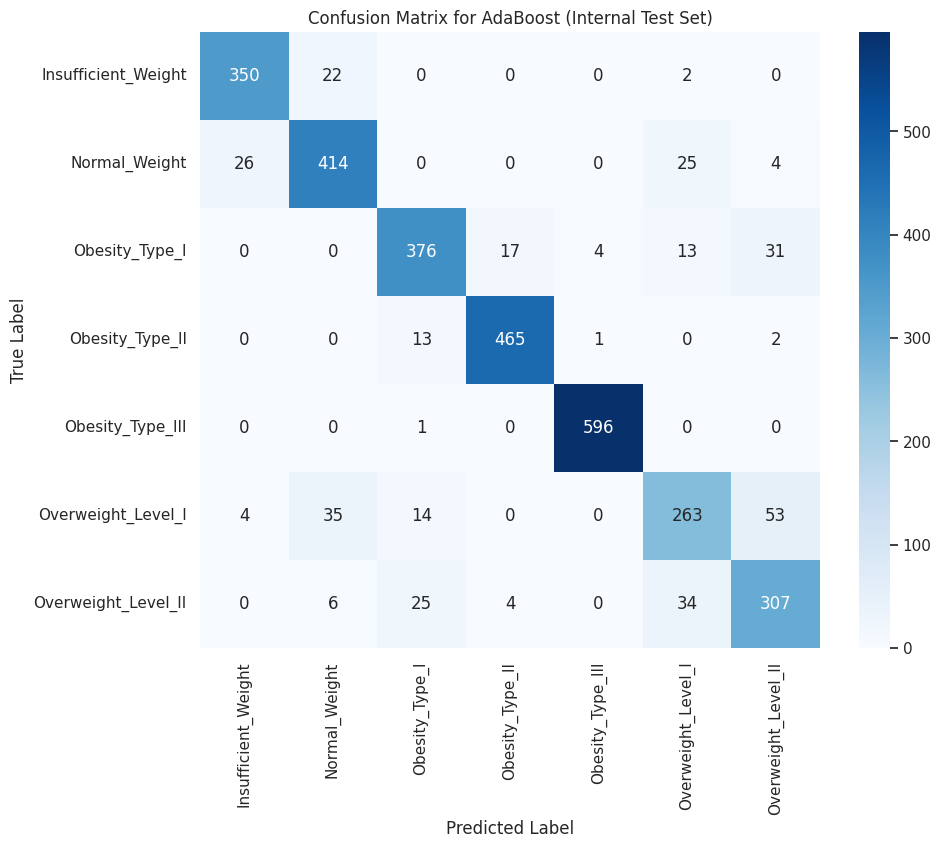

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

file_path = '/content/drive/MyDrive/Obesity Data/train.csv'
df_train = pd.read_csv(file_path)

df = df_train.drop('id', axis=1)

X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True, dtype=int)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)
X_test_cat = X_test_cat.fillna(0)

X_train_manual = X_train.drop(columns=categorical_cols)
X_test_manual = X_test.drop(columns=categorical_cols)

X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual[numerical_cols])

X_train_manual[numerical_cols] = scaler.transform(X_train_manual[numerical_cols])
X_test_manual[numerical_cols] = scaler.transform(X_test_manual[numerical_cols])

base_estimator = DecisionTreeClassifier(
    max_depth=15,
    min_samples_leaf=10,
    random_state=50
)

ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=50
)

ada_model.fit(X_train_manual, y_train)

y_pred = ada_model.predict(X_test_manual)

accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.5f}")
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(10, 8))
labels = np.unique(y_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for AdaBoost (Internal Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#**Gradient Boosting**
Best Output/Test Accuracy :- .89614

GridSearchCV on gradient boosting range

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

print("Loading data from Google Drive...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')
print("✅ Both train.csv and test.csv loaded successfully.")

print("Preparing 100% of training data...")
df = df_train.drop('id', axis=1)
X_train_full = df.drop('WeightCategory', axis=1)
y_train_full = df['WeightCategory']

print("Preparing test data for prediction...")
test_df_ids = df_test['id']
X_test_official = df_test.drop('id', axis=1)

y_test_official = None
if 'WeightCategory' in X_test_official.columns:
    y_test_official = X_test_official['WeightCategory']
    X_test_official = X_test_official.drop('WeightCategory', axis=1)
    print("Test labels found. Model will be evaluated.")
else:
    print("No test labels found. Skipping evaluation.")

print("Starting preprocessing (OHE & Scaling)...")

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = X_train_full.select_dtypes(include=['object']).columns

X_train_cat = pd.get_dummies(X_train_full[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test_official[categorical_cols], drop_first=True, dtype=int)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

X_train_manual = X_train_full.drop(columns=categorical_cols)
X_test_manual = X_test_official.drop(columns=categorical_cols)
X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual[numerical_cols])
X_train_manual[numerical_cols] = scaler.transform(X_train_manual[numerical_cols])
X_test_manual[numerical_cols] = scaler.transform(X_test_manual[numerical_cols])

print("✅ Preprocessing complete for both datasets.")

print("\n--- Starting Focused GridSearchCV for GradientBoostingClassifier ---")
print("This may take some time...")
start_time = time.time()

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [1000, 1200],
    'learning_rate': [0.03, 0.05],
    'max_depth': [5, 6],
    'subsample': [0.8, 0.9]
}

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_manual, y_train_full)

end_time = time.time()
print(f"✅ GridSearchCV complete. Time taken: {end_time - start_time:.2f} seconds.")

print("\n--- Best Parameters Found by GridSearch ---")
print(grid_search.best_params_)
print(f"\nBest internal cross-validation accuracy: {grid_search.best_score_:.5f}")

print("\n--- Generating predictions on test.csv using BEST model ---")
y_pred_official = grid_search.predict(X_test_manual)

if y_test_official is not None:
    print("\n--- Evaluating Best Model on Test Set (Labels Found) ---")
    accuracy = accuracy_score(y_test_official, y_pred_official)
    print(f"--- FINAL ACCURACY ON TEST SET: {accuracy:.5f} ---")
    print("\nClassification Report:")
    print(classification_report(y_test_official, y_pred_official, zero_division=0))
else:
    print("\nNo labels found in test.csv to evaluate against.")

print("\n--- Creating submission output file ---")

submission_df = pd.DataFrame({
    'id': test_df_ids,
    'WeightCategory': y_pred_official
})

output_path = '/content/drive/MyDrive/Obesity Data/gridsearch_gb_submission.csv'
submission_df.to_csv(output_path, index=False)

print(f"✅ Success! Submission file saved to: {output_path}")
print(submission_df.head())

Loading data from Google Drive...
✅ Both train.csv and test.csv loaded successfully.
Preparing 100% of training data...
Preparing test data for prediction...
No test labels found. Skipping evaluation.
Starting preprocessing (OHE & Scaling)...
✅ Preprocessing complete for both datasets.

--- Starting Focused GridSearchCV for GradientBoostingClassifier ---
This may take some time...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ GridSearchCV complete. Time taken: 10638.57 seconds.

--- Best Parameters Found by GridSearch ---
{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}

Best internal cross-validation accuracy: 0.90047

--- Generating predictions on test.csv using BEST model ---

No labels found in test.csv to evaluate against.

--- Creating submission output file ---
✅ Success! Submission file saved to: /content/drive/MyDrive/Obesity Data/gridsearch_gb_submission.csv
      id       WeightCategory
0  15533     Obesity_Type_III
1  15534   

Optuna on gradient boosting range

Loading data from Google Drive...
✅ Training data loaded successfully.
Preparing and splitting data (80% train, 20% test)...
Internal training set size: 12426 samples
Internal testing set size: 3107 samples
Starting preprocessing (OHE & Scaling)...
✅ Preprocessing complete.

--- Training GradientBoostingClassifier ---
✅ Training complete. Time taken: 270.47 seconds.

--- Evaluating Model on Internal Test Set (20%) ---
--- FINAL ACCURACY ON TEST SET (GradientBoosting): 0.90183 ---

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.88      0.88      0.88       469
     Obesity_Type_I       0.89      0.86      0.88       441
    Obesity_Type_II       0.96      0.97      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.75      0.78       369
Overweight_Level_II       0.80      0.84      0.82       376

 

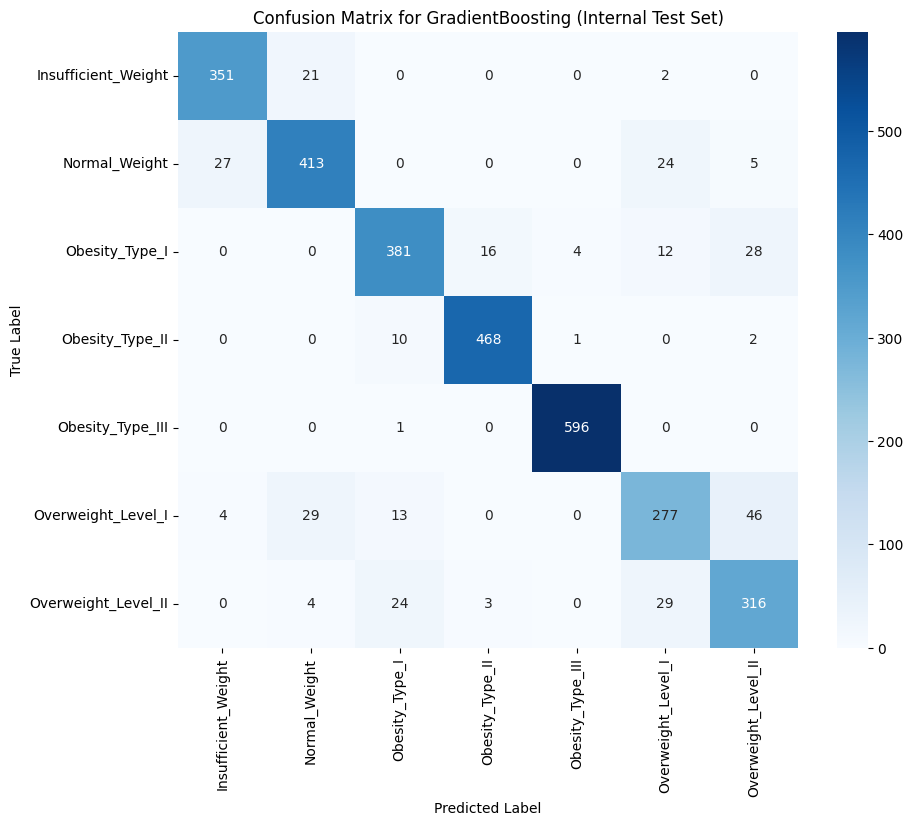

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

warnings.filterwarnings("ignore")

print("Loading data from Google Drive...")
file_path = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path + 'train.csv')
print("✅ Training data loaded successfully.")

print("Preparing and splitting data (80% train, 20% test)...")
df = df_train.drop('id', axis=1)

X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Internal training set size: {len(X_train)} samples")
print(f"Internal testing set size: {len(X_test)} samples")

print("Starting preprocessing (OHE & Scaling)...")

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True, dtype=int)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

X_train_manual = X_train.drop(columns=categorical_cols)
X_test_manual = X_test.drop(columns=categorical_cols)
X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual[numerical_cols])
X_train_manual[numerical_cols] = scaler.transform(X_train_manual[numerical_cols])
X_test_manual[numerical_cols] = scaler.transform(X_test_manual[numerical_cols])

print("✅ Preprocessing complete.")

print("\n--- Training GradientBoostingClassifier ---")
start_time = time.time()

gb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.018570273514045024,
    'max_depth': 5,
    'subsample': 0.7549164768308696,
    'min_samples_split': 3,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42
}

gb_model = GradientBoostingClassifier(**gb_params) # Define gb_model here
gb_model.fit(X_train_manual, y_train)

end_time = time.time()
print(f"✅ Training complete. Time taken: {end_time - start_time:.2f} seconds.")

print("\n--- Evaluating Model on Internal Test Set (20%) ---")

y_pred = gb_model.predict(X_test_manual)

accuracy = accuracy_score(y_test, y_pred)
print(f"--- FINAL ACCURACY ON TEST SET (GradientBoosting): {accuracy:.5f} ---")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:")
plt.figure(figsize=(10, 8))
labels = np.unique(y_test)
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for GradientBoosting (Internal Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

print("Loading data from Google Drive...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')
print("✅ Data loaded successfully.")

print("Preparing and splitting data (80% train, 20% test)...")
df = df_train.drop('id', axis=1)
X = df.drop('WeightCategory', axis=1)
y = df['WeightCategory']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Internal training set size: {len(X_train)} samples")
print(f"Internal testing set size: {len(X_test)} samples")

print("Starting preprocessing...")

numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True, dtype=int)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True, dtype=int)

X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join='left', axis=1, fill_value=0)

X_train_manual = X_train.drop(columns=categorical_cols)
X_test_manual = X_test.drop(columns=categorical_cols)

X_train_manual = pd.concat([X_train_manual.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_manual = pd.concat([X_test_manual.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_manual[numerical_cols])

X_train_manual[numerical_cols] = scaler.transform(X_train_manual[numerical_cols])
X_test_manual[numerical_cols] = scaler.transform(X_test_manual[numerical_cols])

print("✅ Preprocessing complete.")

print("\n--- Training GradientBoostingClassifier ---")
start_time = time.time()

gb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.018570273514045024,
    'max_depth': 5,
    'subsample': 0.7549164768308696,
    'min_samples_split': 3,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42
}

gb_model = GradientBoostingClassifier(**gb_params)

gb_model.fit(X_train_manual, y_train)

end_time = time.time()
print(f"✅ Training complete. Time taken: {end_time - start_time:.2f} seconds.")

print("\n--- Evaluating Model on Internal Test Set (20%) ---")

y_pred = gb_model.predict(X_test_manual)

accuracy = accuracy_score(y_test, y_pred)
print(f"--- FINAL ACCURACY ON TEST SET (GradientBoosting): {accuracy:.5f} ---")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Loading data from Google Drive...
✅ Data loaded successfully.
Preparing and splitting data (80% train, 20% test)...
Internal training set size: 12426 samples
Internal testing set size: 3107 samples
Starting preprocessing...
✅ Preprocessing complete.

--- Training GradientBoostingClassifier ---
✅ Training complete. Time taken: 105.41 seconds.

--- Evaluating Model on Internal Test Set (20%) ---
--- FINAL ACCURACY ON TEST SET (GradientBoosting): 0.89990 ---

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.89      0.88      0.88       469
     Obesity_Type_I       0.89      0.86      0.88       441
    Obesity_Type_II       0.96      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      1.00       597
 Overweight_Level_I       0.78      0.75      0.77       369
Overweight_Level_II       0.79      0.83      0.81       376

           accuracy       

#**XG Boosting**
Best Output/Test Accuracy :- .89614

Train-Test split file for checking validation accuracy

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

warnings.filterwarnings("ignore")

print("Loading train.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df = pd.read_csv(file_path_base + 'train.csv')
print("✅ train.csv loaded.")

X = df.drop(['id', 'WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]
scaler = StandardScaler()
X_train[numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
X_val[numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

print("\nTraining XGBoost on 80% of data...")
start = time.time()

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    early_stopping_rounds=50
)
#.90473 basic settings, actual accuracy:- 0.90358
#.90666 0.01 LR
#.90763 0.01 LR 0.9 subsample actual accuracy:- 0.90936
#.90666 0.01 LR 0.9 subsample 0.9 colsample_bytree
#.90505 0.01 LR 0.9 subsample 7 max_depth
#.90183 0.01 LR 0.9 subsample 5 max_depth
#.90602 2000 trees 0.01 LR 0.9 subsample
#.90602 1500 trees 0.01 LR 0.9 subsample
#.90602 1200 trees 0.01 LR 0.9 subsample
#.90005 0.005 LR 0.9 subsample
#.90537 0.01 LR 0.9 subsample 50 random_state
#.90634 0.02 LR 0.9 subsample
#.90505 0.015 LR 0.9 subsample
#.90763 0.01 LR 0.95 subsample
#.90666 0.01 LR 1 subsample
#.90537 0.01 LR 0.9 subsample 0.7 colsample_bytree

model.fit(X_train, y_train_encoded,
          eval_set=[(X_val, y_val_encoded)],
          verbose=False)
end = time.time()
print(f"Training completed in {(end - start):.2f} seconds.")

y_pred_encoded = model.predict(X_val)
y_pred = le.inverse_transform(y_pred_encoded)

acc = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy (20% split): {acc:.5f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred, zero_division=0))

Loading train.csv...
✅ train.csv loaded.

Training XGBoost on 80% of data...
Training completed in 45.59 seconds.

Validation Accuracy (20% split): 0.90602

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.89      0.89      0.89       469
     Obesity_Type_I       0.90      0.87      0.88       441
    Obesity_Type_II       0.96      0.97      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.76      0.78       369
Overweight_Level_II       0.81      0.84      0.83       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107



Code for generating CSV file to be checked for output/test accuracy

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

warnings.filterwarnings("ignore")

print("Loading train.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df = pd.read_csv(file_path_base + 'train.csv')
print("✅ train.csv loaded.")

X = df.drop(['id', 'WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]
scaler = StandardScaler()
X_train[numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])
X_val[numerical_cols_present] = scaler.transform(X_val[numerical_cols_present])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

print("\nTraining XGBoost on 80% of data...")
start = time.time()

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    early_stopping_rounds=50
)

model.fit(X_train, y_train_encoded,
          eval_set=[(X_val, y_val_encoded)],
          verbose=False)
end = time.time()
print(f"Training completed in {(end - start):.2f} seconds.")

y_pred_encoded = model.predict(X_val)
y_pred = le.inverse_transform(y_pred_encoded)

acc = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy (20% split): {acc:.5f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred, zero_division=0))


Loading train.csv...
✅ train.csv loaded.

Training XGBoost on 80% of data...
Training completed in 95.35 seconds.

Validation Accuracy (20% split): 0.90602

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.94      0.93       374
      Normal_Weight       0.89      0.89      0.89       469
     Obesity_Type_I       0.90      0.87      0.88       441
    Obesity_Type_II       0.96      0.97      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.76      0.78       369
Overweight_Level_II       0.81      0.84      0.83       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107



RandomSearchCV on xgboost


would result in .90661 output accuracy



In [ ]:
import pandas as pd
import warnings
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import xgboost as xgb
from scipy.stats import uniform, randint

warnings.filterwarnings("ignore")

print("Loading train.csv and test.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')
print("✅ Data loaded.")

X_train = df_train.drop(['id', 'WeightCategory'], axis=1)
y_train = df_train['WeightCategory']

categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [c for c in numerical_cols if c in X_train.columns]
scaler = StandardScaler()
X_train[numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

param_dist = {
    'n_estimators': [800, 900, 1000, 1100, 1200],
    'learning_rate': uniform(0.001, 0.099),
    'max_depth': randint(4, 11),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 11),
    'reg_alpha': uniform(0.0, 0.6),
    'reg_lambda': uniform(0.5, 3.5),
    'gamma': uniform(0.0, 0.5),
    'objective': ['multi:softmax'],
    'num_class': [len(le.classes_)],
    'use_label_encoder': [False],
    'eval_metric': ['mlogloss'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbosity': [0]
}

print("\n" + "="*80)
print("STARTING BROADENED RANDOMIZED SEARCH - ALL HYPERPARAMETERS")
print("="*80)
print("Tuning: n_estimators (800-1200), learning_rate (0.001-0.1),")
print("        max_depth (4-10), subsample (0.6-1.0), colsample_bytree (0.6-1.0),")
print("        min_child_weight (1-10), reg_alpha (0.0-0.6), reg_lambda (0.5-4.0),")
print("        gamma (0.0-0.5)")
print("="*80)

xgb_clf = xgb.XGBClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=200,
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy',
    return_train_score=True
)
random_search.fit(X_train, y_train_encoded)

best_model = xgb.XGBClassifier(**random_search.best_params_)
best_model.fit(X_train, y_train_encoded)
print("✅ Final model trained.")

X_test = df_test.drop(['id'], axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test[numerical_cols_present] = scaler.transform(X_test[numerical_cols_present])

y_test_pred_encoded = best_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

results_df = pd.DataFrame(random_search.cv_results_)

submission = pd.DataFrame({
    'id': df_test['id'],
    'WeightCategory': y_test_pred
})

output_path = file_path_base + 'randomsearch_broadened_full.csv'
submission.to_csv(output_path, index=False)
print(f"\n✅ Submission saved to: {output_path}")
print(submission.head())

results_df.to_csv(file_path_base + 'xg_randomsearch_regularization_3.csv', index=False)
print(f"✅ Full search results saved.")


In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

print("Loading train.csv and test.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')
print("✅ Data loaded.")

X_train = df_train.drop(['id', 'WeightCategory'], axis=1)
y_train = df_train['WeightCategory']

categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [col for col in numerical_cols if col in X_train.columns]
scaler = StandardScaler()
X_train[numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 900, 1200),
        'learning_rate': trial.suggest_float('learning_rate', 0.009, 0.011),
        'max_depth': trial.suggest_int('max_depth', 5, 7),
        'subsample': trial.suggest_float('subsample', 0.90, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.90, 0.95),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.8, 1.2),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': 0
    }
    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()

print("\nStarting Optuna hyperparameter optimization...")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
start_time = time.time()
study.optimize(objective, n_trials=50, show_progress_bar=True)
end_time = time.time()

print(f"\nOptimization finished in {(end_time - start_time) / 60:.2f} minutes")
print(f"Best Accuracy: {study.best_value:.5f}")
print(f"Best Parameters: {study.best_params}")

print("\nTraining final model on full training data...")
best_params = study.best_params
best_params['objective'] = 'multi:softmax'
best_params['num_class'] = len(le.classes_)
best_params['use_label_encoder'] = False
best_params['eval_metric'] = 'mlogloss'
best_params['random_state'] = 42
best_params['n_jobs'] = -1
best_params['verbosity'] = 0

model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train_encoded)
print("Training complete.")

X_test = df_test.drop('id', axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test[numerical_cols_present] = scaler.transform(X_test[numerical_cols_present])

print("Predicting test data...")
y_test_pred_encoded = model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

submission = pd.DataFrame({'id': df_test['id'], 'WeightCategory': y_test_pred})
output_path = file_path_base + 'optuna_xgb_submission.csv'
submission.to_csv(output_path, index=False)
print(f"\n✅ Submission saved to: {output_path}")
print(submission.head())


Loading data from Google Drive...
✅ Both train.csv and test.csv loaded successfully.
Preparing 100% of training data...
Preparing test data for prediction...
No test labels found. Skipping evaluation.
Starting preprocessing (OHE & Scaling)...
✅ Preprocessing complete for both datasets.

--- Starting Focused GridSearchCV for GradientBoostingClassifier ---
This may take some time...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ GridSearchCV complete. Time taken: 10638.57 seconds.

--- Best Parameters Found by GridSearch ---
{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.8}

Best internal cross-validation accuracy: 0.90047

--- Generating predictions on test.csv using BEST model ---

No labels found in test.csv to evaluate against.

--- Creating submission output file ---
✅ Success! Submission file saved to: /content/drive/MyDrive/Obesity Data/gridsearch_gb_submission.csv
      id       WeightCategory
0  15533     Obesity_Type_III
1  15534   

In [ ]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

print("Loading train.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')
print("✅ Data loaded.")

X_train = df_train.drop(['id', 'WeightCategory'], axis=1)
y_train = df_train['WeightCategory']

categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [c for c in numerical_cols if c in X_train.columns]
scaler = StandardScaler()
X_train[numerical_cols_present] = scaler.fit_transform(X_train[numerical_cols_present])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

def objective(trial):
    params = {
        'n_estimators': 1000,
        'learning_rate': 0.01,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': trial.suggest_float('reg_alpha', 0.15, 0.55),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.8, 3.2),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': 0
    }
    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean()

print("\n" + "="*80)
print("STARTING OPTUNA REGULARIZATION TUNING")
print("="*80)
print("Fixed parameters: n_estimators=1000, lr=0.01, max_depth=6, subsample=0.8")
print("Tuning: reg_alpha (0.15-0.55), reg_lambda (0.8-3.2)")
print("="*80)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
start_time = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)
end_time = time.time()

print(f"\n✅ Optuna finished in {(end_time - start_time)/60:.2f} minutes")
print(f"🏆 Best CV Accuracy: {study.best_value:.5f}")
print(f"📊 Best Parameters:")
for k, v in study.best_params.items():
    print(f"   {k}: {v:.4f}")

print("\n📈 Top 10 Trials:")
trials_df = study.trials_dataframe().sort_values('value', ascending=False).head(10)
for idx, row in trials_df.iterrows():
    print(f"Trial {int(row['number'])}: Accuracy={row['value']:.5f}, "
          f"alpha={row['params_reg_alpha']:.4f}, lambda={row['params_reg_lambda']:.4f}")

print("\n" + "="*80)
print("TRAINING FINAL MODEL ON FULL DATA")
print("="*80)

best_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': study.best_params['reg_alpha'],
    'reg_lambda': study.best_params['reg_lambda'],
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 0
}

final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train_encoded)
print("✅ Final model trained.")

X_test = df_test.drop(['id'], axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test[numerical_cols_present] = scaler.transform(X_test[numerical_cols_present])

y_test_pred_encoded = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_encoded)

submission = pd.DataFrame({
    'id': df_test['id'],
    'WeightCategory': y_test_pred
})
output_path = file_path_base + 'optuna_regularization_2.csv'
submission.to_csv(output_path, index=False)
print(f"\n✅ Submission saved to: {output_path}")
print(submission.head())


Loading train.csv...


[I 2025-10-22 02:29:36,198] A new study created in memory with name: no-name-fadf1ac1-36b1-4991-b66c-a463ed592a78


✅ Data loaded.

STARTING OPTUNA REGULARIZATION TUNING
Fixed parameters: n_estimators=1000, lr=0.01, max_depth=6, subsample=0.8
Tuning: reg_alpha (0.15-0.55), reg_lambda (0.8-3.2)


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-10-22 02:31:10,620] Trial 0 finished with value: 0.9051055392648261 and parameters: {'reg_alpha': 0.299816047538945, 'reg_lambda': 3.081714335383799}. Best is trial 0 with value: 0.9051055392648261.
[I 2025-10-22 02:32:38,203] Trial 1 finished with value: 0.9049767355395281 and parameters: {'reg_alpha': 0.442797576724562, 'reg_lambda': 2.236780362072888}. Best is trial 0 with value: 0.9051055392648261.
[I 2025-10-22 02:34:07,836] Trial 2 finished with value: 0.9049123647638602 and parameters: {'reg_alpha': 0.2124074561769746, 'reg_lambda': 1.1743868488068865}. Best is trial 0 with value: 0.9051055392648261.
[I 2025-10-22 02:35:37,617] Trial 3 finished with value: 0.9052342600915075 and parameters: {'reg_alpha': 0.1732334448672798, 'reg_lambda': 2.878822749859845}. Best is trial 3 with value: 0.9052342600915075.
[I 2025-10-22 02:37:03,621] Trial 4 finished with value: 0.9049767355395281 and parameters: {'reg_alpha': 0.3904460046972835, 'reg_lambda': 2.4993741867105097}. Best is 

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

file_path = '/content/drive/MyDrive/Obesity Data/'
df_train = pd.read_csv(file_path + 'train.csv')
df_test = pd.read_csv(file_path + 'test.csv')

X_train_full = df_train.drop(['id','WeightCategory'], axis=1)
y_train_full = df_train['WeightCategory']

print("Starting preprocessing...")
cat_features = X_train_full.select_dtypes(include=['object']).columns
X_train_full = pd.get_dummies(X_train_full, columns=cat_features, drop_first=True)

num_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
scaler = StandardScaler()
X_train_full[num_features] = scaler.fit_transform(X_train_full[num_features])

le = LabelEncoder()
y_train_full_enc = le.fit_transform(y_train_full)
print("✅ Preprocessing and Encoding complete.")

center_params = {
    'n_estimators': 1403,
    'learning_rate': 0.011519841358664365,
    'max_depth': 13,
    'subsample': 0.8389925410061727,
    'colsample_bytree': 0.4289205756686294,
    'min_child_weight': 1,
    'reg_alpha': 0.21720626221992917,
    'reg_lambda': 3.274796369552523,
    'gamma': 0.38490059483369904
}

PRUNING_THRESHOLD = 0.90473

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators',
                                          center_params['n_estimators']-200,
                                          center_params['n_estimators']+200),
        'learning_rate': trial.suggest_float('learning_rate',
                                             center_params['learning_rate']/5,
                                             center_params['learning_rate']*5,
                                             log=True),
        'max_depth': trial.suggest_int('max_depth',
                                       max(3, center_params['max_depth']-3),
                                       center_params['max_depth']+3),
        'subsample': trial.suggest_float('subsample',
                                         max(0.5, center_params['subsample']-0.2),
                                         min(1.0, center_params['subsample']+0.2)),
        'colsample_bytree': trial.suggest_float('colsample_bytree',
                                                max(0.4, center_params['colsample_bytree']-0.2),
                                                min(1.0, center_params['colsample_bytree']+0.2)),
        'min_child_weight': trial.suggest_int('min_child_weight',
                                              max(1, center_params['min_child_weight']-3),
                                              center_params['min_child_weight']+3),
        'reg_alpha': trial.suggest_float('reg_alpha',
                                         center_params['reg_alpha']/5,
                                         center_params['reg_alpha']*5,
                                         log=True),
        'reg_lambda': trial.suggest_float('reg_lambda',
                                          center_params['reg_lambda']/5,
                                          center_params['reg_lambda']*5,
                                          log=True),
        'gamma': trial.suggest_float('gamma', 0.3, 0.7),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = []
    fold_count = 0

    for train_idx, val_idx in cv.split(X_train_full, y_train_full_enc):
        X_tr, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
        y_tr, y_val = y_train_full_enc[train_idx], y_train_full_enc[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        score = model.score(X_val, y_val)
        scores.append(score)

        fold_count += 1
        intermediate_mean = np.mean(scores)
        trial.report(intermediate_mean, step=fold_count)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(scores)

print(f"\nStarting Optuna optimization with pruning threshold: {PRUNING_THRESHOLD}")
print("Trials with avg accuracy lower than threshold might be stopped early\n")

pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=5)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=pruner
)

start = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)

print(f"Best Accuracy: {study.best_value:.5f}")
print(f"Number of completed trials: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
print(f"Number of pruned trials: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")
print("\nBest params found by Optuna:", study.best_params)

best optuna for lambda,alpha

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

print("Loading train.csv and test.csv...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
try:
    df_train = pd.read_csv(file_path_base + 'train.csv')
    df_test = pd.read_csv(file_path_base + 'test.csv')
    print("✅ Data loaded.")
except FileNotFoundError:
    print(f"❌ ERROR: Could not find files in {file_path_base}. Please check path.")
    raise

X = df_train.drop(['id', 'WeightCategory'], axis=1)
y = df_train['WeightCategory']

print("Starting preprocessing...")
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present_train = [col for col in numerical_cols if col in X.columns]
scaler = StandardScaler()
X[numerical_cols_present_train] = scaler.fit_transform(X[numerical_cols_present_train])

le = LabelEncoder()
y_enc = le.fit_transform(y)
print("✅ Preprocessing and Encoding complete.")

center_params = {
    'n_estimators': 1390,
    'learning_rate': 0.00680,
    'max_depth': 8,
    'subsample': 0.85676,
    'colsample_bytree': 0.50965,
    'min_child_weight': 7,
    'reg_alpha': 0.15512,
    'reg_lambda': 3.51511,
}

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', max(100, center_params['n_estimators'] - 400), center_params['n_estimators'] + 400),
        'learning_rate': trial.suggest_float('learning_rate', center_params['learning_rate'] / 5, center_params['learning_rate'] * 5, log=True),
        'max_depth': trial.suggest_int('max_depth', max(3, center_params['max_depth'] - 3), center_params['max_depth'] + 3),
        'subsample': trial.suggest_float('subsample', max(0.5, center_params['subsample'] - 0.2), min(1.0, center_params['subsample'] + 0.1)),
        'colsample_bytree': trial.suggest_float('colsample_bytree', max(0.4, center_params['colsample_bytree'] - 0.2), min(0.8, center_params['colsample_bytree'] + 0.2)),
        'min_child_weight': trial.suggest_int('min_child_weight', max(1, center_params['min_child_weight'] - 4), center_params['min_child_weight'] + 4),
        'reg_alpha': trial.suggest_float('reg_alpha', max(0.0, center_params['reg_alpha'] / 5), center_params['reg_alpha'] * 5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', max(0.0, center_params['reg_lambda'] / 5), center_params['reg_lambda'] * 5, log=True),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        score = model.score(X_val, y_val)
        scores.append(score)

        trial.report(score, step=len(scores))
        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(scores)

print("\nStarting refined Optuna tuning with early stopping...\n")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
start = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)
end = time.time()

print(f"\nCompleted Optuna tuning in {(end - start)/60:.2f} minutes")
print(f"Best CV accuracy: {study.best_value:.5f}")
print("Best hyperparameters found by Optuna:")
best_params_from_optuna = study.best_params.copy()
print(best_params_from_optuna)

print("\nTraining final model with best parameters found by Optuna...")
start_final_train = time.time()

best_params_final = best_params_from_optuna
best_params_final.update({
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'verbosity': 0,
    'n_jobs': -1
})

final_model = xgb.XGBClassifier(**best_params_final)
final_model.fit(X, y_enc, verbose=False)

end_final_train = time.time()
print(f"✅ Final model training complete in {(end_final_train - start_final_train):.2f} seconds.")

print("Preparing and preprocessing test data...")
df_test = pd.read_csv(file_path_base + 'test.csv')
X_test = df_test.drop('id', axis=1)

original_train_cols = df_train.drop(['id','WeightCategory'], axis=1).columns
for col in categorical_cols:
    if col not in X_test.columns:
        X_test[col] = 'Missing'
    train_categories = df_train[col].astype('category').cat.categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories)

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

numerical_cols_present_test = [col for col in numerical_cols if col in X_test.columns]
cols_to_scale_test = [col for col in numerical_cols_present_train if col in numerical_cols_present_test]
X_test[cols_to_scale_test] = scaler.transform(X_test[cols_to_scale_test])
print("✅ Test data preprocessing complete.")

print("Generating test predictions...")
y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)
print("✅ Predictions decoded.")

submission = pd.DataFrame({
    'id': df_test['id'],
    'WeightCategory': y_test_pred
})
out_path = file_path_base + 'weight_xg_boosting_optuna_final.csv'
submission.to_csv(out_path, index=False)
print(f"\n✅ Submission saved to: {out_path}")
print(submission.head())


From the best parameters I found above, I got a jump in accuracy, but still i was stuck after trying multiple tunings, then I manually tuned the values of new hyperparameter gamma from 0.1 to 1.0, and I found gamma=0.5 giving the most accurate results. This value of gamma helped me reach **0.91239** as the final accuracy.

below code tuned value of gamma based on centering at the values of parameters which resulted to the last most accurate model.

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

file_path = '/content/drive/MyDrive/Obesity Data/'
df = pd.read_csv(file_path + 'train.csv')
df_test = pd.read_csv(file_path + 'test.csv')
X = df.drop(['id','WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

le = LabelEncoder()
y_enc = le.fit_transform(y)

center_params = {
    'n_estimators': 1244,
    'learning_rate': 0.012037573993022807,
    'max_depth': 11,
    'subsample': 0.6732768958671234,
    'colsample_bytree': 0.530161020060218,
    'min_child_weight': 3,
    'reg_alpha': 0.13850139721638935,
    'reg_lambda': 13.95559742202856
}

PRUNING_THRESHOLD = 0.90473

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators',
                                          center_params['n_estimators']-200,
                                          center_params['n_estimators']+200),
        'learning_rate': trial.suggest_float('learning_rate',
                                             center_params['learning_rate']/5,
                                             center_params['learning_rate']*5,
                                             log=True),
        'max_depth': trial.suggest_int('max_depth',
                                       max(3, center_params['max_depth']-3),
                                       center_params['max_depth']+3),
        'subsample': trial.suggest_float('subsample',
                                         max(0.5, center_params['subsample']-0.2),
                                         min(1.0, center_params['subsample']+0.2)),
        'colsample_bytree': trial.suggest_float('colsample_bytree',
                                                max(0.4, center_params['colsample_bytree']-0.2),
                                                min(1.0, center_params['colsample_bytree']+0.2)),
        'min_child_weight': trial.suggest_int('min_child_weight',
                                              max(1, center_params['min_child_weight']-3),
                                              center_params['min_child_weight']+3),
        'reg_alpha': trial.suggest_float('reg_alpha',
                                         center_params['reg_alpha']/5,
                                         center_params['reg_alpha']*5,
                                         log=True),
        'reg_lambda': trial.suggest_float('reg_lambda',
                                          center_params['reg_lambda']/5,
                                          center_params['reg_lambda']*5,
                                          log=True),
        'gamma': trial.suggest_float('gamma', 0.3, 0.7),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = []
    fold_count = 0

    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        score = model.score(X_val, y_val)
        scores.append(score)
        fold_count += 1
        intermediate_mean = np.mean(scores)
        trial.report(intermediate_mean, step=fold_count)
        if trial.should_prune():
            print(f"❌ Trial pruned at fold {fold_count}/15 with avg accuracy: {intermediate_mean:.5f}")
            raise optuna.TrialPruned()
    return np.mean(scores)

print(f"Starting Optuna optimization with pruning threshold: {PRUNING_THRESHOLD}")
print("Trials with avg accuracy < 0.90473 will be stopped early\n")

pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=5)

study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=pruner
)

start = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)
end = time.time()

print(f"\n✅ Done in {(end-start)/60:.2f} min")
print(f"Best CV accuracy: {study.best_value:.5f}")
print(f"Number of completed trials: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
print(f"Number of pruned trials: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")
print("\nBest params:", study.best_params)

best = study.best_params
best.update({
    'objective':'multi:softmax',
    'num_class':len(le.classes_),
    'use_label_encoder':False,
    'eval_metric':'mlogloss',
    'random_state':42,
    'verbosity':0,
    'n_jobs':-1
})
final_model = xgb.XGBClassifier(**best)
final_model.fit(X, y_enc, verbose=False)

X_test = df_test.drop(['id'], axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nGenerating test predictions...")
y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)
print("✅ Predictions decoded.")

submission = pd.DataFrame({
    'id': df_test['id'],
    'WeightCategory': y_test_pred
})

out_path = file_path + 'xg_gamma_optuna_pruned.csv'
submission.to_csv(out_path, index=False)
print(f"✅ Submission saved to: {out_path}")
print(submission.head())


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)
warnings.filterwarnings("ignore")

print("Loading Training and Test data...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
try:
    df_train = pd.read_csv(file_path_base + 'train.csv')
    df_test = pd.read_csv(file_path_base + 'test.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"❌ ERROR: Could not find files in {file_path_base}. Please check the file path.")
    raise

X = df_train.drop(['id', 'WeightCategory'], axis=1)
y = df_train['WeightCategory']

print("Starting Data Preprocessing...")
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
num_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
num_features_present_train = [col for col in num_features if col in X.columns]
scaler = StandardScaler()
X[num_features_present_train] = scaler.fit_transform(X[num_features_present_train])
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Preprocessing and Encoding complete.")

params_1 = {
    'n_estimators': 1244, 'learning_rate': 0.012037573993022807, 'max_depth': 11,
    'subsample': 0.6732768958671234, 'colsample_bytree': 0.530161020060218,
    'min_child_weight': 3, 'reg_alpha': 0.13850139721638935,
    'reg_lambda': 13.95559742202856, 'gamma': 0.5
}
params_2 = {
    'n_estimators': 1403, 'learning_rate': 0.011519841358664365, 'max_depth': 13,
    'subsample': 0.8389925410061727, 'colsample_bytree': 0.4289205756686294,
    'min_child_weight': 1, 'reg_alpha': 0.21720626221992917,
    'reg_lambda': 3.274796369552523, 'gamma': 0.38490059483369904
}

print("\nAdjusting parameters for n_estimators range [500-900]...\n")

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 900),
        'max_depth': trial.suggest_int('max_depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.015, 0.030, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.3, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 20.0, 50.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.70, 0.85),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.50, 0.70),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 30,
        'tree_method': 'hist'
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        score = model.score(X_val, y_val)
        scores.append(score)
    return np.mean(scores)

print("Starting OPTUNA tuning for LOW-COMPLEXITY models (500-900 estimators)...\n")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)
print(f"Best CV accuracy: {study.best_value:.5f}")
print("\nBest hyperparameters found:")
best_params_from_optuna = study.best_params.copy()
for k, v in best_params_from_optuna.items():
    print(f"  {k}: {v}")

print("\nTraining final model with best parameters...")
start_final_train = time.time()
best_params_final = best_params_from_optuna.copy()
best_params_final.update({
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'verbosity': 0,
    'n_jobs': -1,
    'tree_method': 'hist'
})
final_model = xgb.XGBClassifier(**best_params_final)
final_model.fit(X, y_enc, verbose=False)
end_final_train = time.time()

print("\nPreparing and preprocessing test data...")
X_test = df_test.drop('id', axis=1)
test_ids = df_test['id']
original_train_df = df_train.drop(['id','WeightCategory'], axis=1)
for col in categorical_cols:
    if col not in X_test.columns:
        X_test[col] = 'Missing'
    train_categories = original_train_df[col].astype('category').cat.categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
num_features_present_test = [col for col in num_features if col in X_test.columns]
cols_to_scale_test = [col for col in num_features_present_train if col in num_features_present_test]
X_test[cols_to_scale_test] = scaler.transform(X_test[cols_to_scale_test])
print("Test data preprocessing complete.")

print("Generating test predictions...")
y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)
submission = pd.DataFrame({'id': test_ids, 'WeightCategory': y_test_pred})
out_path = file_path_base + 'weight_xgb_500_900_estimators.csv'
submission.to_csv(out_path, index=False)
print(f"\nSubmission saved to: {out_path}")
print("Sample Submission:")
print(submission.head())


Loading Training and Test data...


[I 2025-10-25 03:40:34,671] A new study created in memory with name: no-name-d558dbc8-4ed5-436e-b63b-0905fb77c8a8


Data loaded successfully.
Starting Data Preprocessing...
Preprocessing and Encoding complete.

Adjusting parameters for n_estimators range [500-900]...

Starting OPTUNA tuning for LOW-COMPLEXITY models (500-900 estimators)...



  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-25 03:42:57,631] Trial 0 finished with value: 0.9060707278560699 and parameters: {'n_estimators': 650, 'max_depth': 10, 'learning_rate': 0.024913996103247533, 'reg_alpha': 0.6168038158199004, 'reg_lambda': 23.073636940063274, 'gamma': 0.5779972601681014, 'min_child_weight': 3, 'subsample': 0.8299264218662402, 'colsample_bytree': 0.6202230023486417}. Best is trial 0 with value: 0.9060707278560699.
[I 2025-10-25 03:45:03,596] Trial 1 finished with value: 0.9059096869313026 and parameters: {'n_estimators': 783, 'max_depth': 6, 'learning_rate': 0.0293807729915014, 'reg_alpha': 0.8173118924709636, 'reg_lambda': 24.295633253176874, 'gamma': 0.5909124836035503, 'min_child_weight': 4, 'subsample': 0.7456363364439306, 'colsample_bytree': 0.6049512863264476}. Best is trial 0 with value: 0.9060707278560699.
[I 2025-10-25 03:46:58,855] Trial 2 finished with value: 0.9059419448554259 and parameters: {'n_estimators': 673, 'max_depth': 7, 'learning_rate': 0.022923310303024545, 'reg_alpha':

NameError: name 'd' is not defined

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)

warnings.filterwarnings("ignore")

print("Loading Training and Test data...")
file_path_base = '/content/drive/MyDrive/Obesity Data/'
try:
    df_train = pd.read_csv(file_path_base + 'train.csv')
    df_test = pd.read_csv(file_path_base + 'test.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"❌ ERROR: Could not find files in {file_path_base}. Please check the file path.")
    raise

X = df_train.drop(['id', 'WeightCategory'], axis=1)
y = df_train['WeightCategory']

print("Starting Data Preprocessing...")
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

num_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
num_features_present_train = [col for col in num_features if col in X.columns]
scaler = StandardScaler()
X[num_features_present_train] = scaler.fit_transform(X[num_features_present_train])

le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Preprocessing and Encoding complete.")

print("\nOptimizing around max_depth=8 (your best performer: 0.90183)...\n")

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 7, 12),
        'n_estimators': trial.suggest_int('n_estimators', 550, 700),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.035, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.15, 0.35, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 12.0, 22.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.40, 0.65),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 3),
        'subsample': trial.suggest_float('subsample', 0.80, 0.90),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.50, 0.65),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 30,
        'tree_method': 'hist'
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        score = model.score(X_val, y_val)
        scores.append(score)
    return np.mean(scores)

print("Starting OPTUNA search with max_depth=8 as anchor...\n")
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=80, show_progress_bar=True)

print(f"\nBest CV accuracy: {study.best_value:.5f}")
print("\nBest hyperparameters found:")
best_params_from_optuna = study.best_params.copy()
best_params_from_optuna['max_depth'] = 8
for k, v in best_params_from_optuna.items():
    print(f"  {k}: {v}")

print("\nTraining final model with best parameters...")
best_params_final = best_params_from_optuna.copy()
best_params_final.update({
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'verbosity': 0,
    'n_jobs': -1,
    'tree_method': 'hist'
})

final_model = xgb.XGBClassifier(**best_params_final)
final_model.fit(X, y_enc, verbose=False)

print("\nPreparing and preprocessing test data...")
X_test = df_test.drop('id', axis=1)
test_ids = df_test['id']
original_train_df = df_train.drop(['id','WeightCategory'], axis=1)
for col in categorical_cols:
    if col not in X_test.columns:
        X_test[col] = 'Missing'
    train_categories = original_train_df[col].astype('category').cat.categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories)

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
num_features_present_test = [col for col in num_features if col in X_test.columns]
cols_to_scale_test = [col for col in num_features_present_train if col in num_features_present_test]
X_test[cols_to_scale_test] = scaler.transform(X_test[cols_to_scale_test])
print("Test data preprocessing complete.")

print("Generating test predictions...")
y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({'id': test_ids, 'WeightCategory': y_test_pred})
out_path = file_path_base + 'xgb_maxdepth8_optimized.csv'
submission.to_csv(out_path, index=False)
print(f"\n Submission saved to: {out_path}")
print("Sample Submission:")
print(submission.head())


[I 2025-10-25 05:47:28,062] A new study created in memory with name: no-name-b1fd8f7f-f398-433a-9393-f1fb4b95eb1e


Loading Training and Test data...
Data loaded successfully.
Starting Data Preprocessing...
Preprocessing and Encoding complete.

Optimizing around max_depth=8 (your best performer: 0.90183)...

Starting OPTUNA search with max_depth=8 as anchor...



  0%|          | 0/80 [00:00<?, ?it/s]

[I 2025-10-25 05:50:02,661] Trial 0 finished with value: 0.9077765534112677 and parameters: {'max_depth': 9, 'n_estimators': 693, 'learning_rate': 0.02077670387146178, 'reg_alpha': 0.24910571058105346, 'reg_lambda': 13.190213245183196, 'gamma': 0.4389986300840507, 'min_child_weight': 1, 'subsample': 0.8866176145774936, 'colsample_bytree': 0.5901672517614813}. Best is trial 0 with value: 0.9077765534112677.
[I 2025-10-25 05:51:53,947] Trial 1 finished with value: 0.9077444716467044 and parameters: {'max_depth': 11, 'n_estimators': 553, 'learning_rate': 0.033009497973205286, 'reg_alpha': 0.3036762487005602, 'reg_lambda': 13.648272915220799, 'gamma': 0.4454562418017752, 'min_child_weight': 1, 'subsample': 0.8304242242959539, 'colsample_bytree': 0.5787134647448356}. Best is trial 0 with value: 0.9077765534112677.
[I 2025-10-25 05:54:03,424] Trial 2 finished with value: 0.906617817275284 and parameters: {'max_depth': 9, 'n_estimators': 593, 'learning_rate': 0.01644544715158596, 'reg_alpha':

optuna search on best 2 accuracies till date(.91239)

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

file_path = '/home/iiitb/Desktop/IIITB/ML/project_first_half/'
df = pd.read_csv(file_path + 'train.csv')
df_test = pd.read_csv(file_path + 'test.csv')
X = df.drop(['id','WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

le = LabelEncoder()
y_enc = le.fit_transform(y)

center1 = {'n_estimators': 1244, 'learning_rate': 0.01203757, 'max_depth': 11, 'subsample': 0.6732769, 'colsample_bytree': 0.5301610, 'min_child_weight': 3, 'reg_alpha': 0.1385014, 'reg_lambda': 13.9555974, 'gamma': 0.5}
center2 = {'n_estimators': 1403, 'learning_rate': 0.01151984, 'max_depth': 13, 'subsample': 0.8389925, 'colsample_bytree': 0.4289206, 'min_child_weight': 1, 'reg_alpha': 0.2172063, 'reg_lambda': 3.2747964, 'gamma': 0.3849006}

def objective(trial):
    ne_lo = int(min(center1['n_estimators'], center2['n_estimators']) * 0.95)
    ne_hi = int(max(center1['n_estimators'], center2['n_estimators']) * 1.05)
    lr_lo = min(center1['learning_rate'], center2['learning_rate']) * 0.8
    lr_hi = max(center1['learning_rate'], center2['learning_rate']) * 1.2
    ss_lo = min(center1['subsample'], center2['subsample']) - 0.05
    ss_hi = max(center1['subsample'], center2['subsample']) + 0.05
    cs_lo = min(center1['colsample_bytree'], center2['colsample_bytree']) - 0.05
    cs_hi = max(center1['colsample_bytree'], center2['colsample_bytree']) + 0.05
    ra_lo = min(center1['reg_alpha'], center2['reg_alpha']) * 0.5
    ra_hi = max(center1['reg_alpha'], center2['reg_alpha']) * 1.5
    rl_lo = min(center1['reg_lambda'], center2['reg_lambda']) * 0.8
    rl_hi = max(center1['reg_lambda'], center2['reg_lambda']) * 1.2
    gm_lo = min(center1['gamma'], center2['gamma']) - 0.1
    gm_hi = max(center1['gamma'], center2['gamma']) + 0.1

    params = {
        'n_estimators': trial.suggest_int('n_estimators', ne_lo, ne_hi),
        'learning_rate': trial.suggest_float('learning_rate', lr_lo, lr_hi, log=True),
        'max_depth': trial.suggest_int('max_depth', min(center1['max_depth'], center2['max_depth']), max(center1['max_depth'], center2['max_depth'])),
        'subsample': trial.suggest_float('subsample', max(0.5, ss_lo), min(1.0, ss_hi)),
        'colsample_bytree': trial.suggest_float('colsample_bytree', max(0.4, cs_lo), min(1.0, cs_hi)),
        'min_child_weight': trial.suggest_int('min_child_weight', min(center1['min_child_weight'], center2['min_child_weight']), max(center1['min_child_weight'], center2['min_child_weight'])),
        'reg_alpha': trial.suggest_float('reg_alpha', ra_lo, ra_hi, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', rl_lo, rl_hi, log=True),
        'gamma': trial.suggest_float('gamma', max(0.0, gm_lo), gm_hi),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        scores.append(model.score(X_val, y_val))
    return np.mean(scores)

pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=5)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42), pruner=pruner)

start = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)
end = time.time()

print(f"Done in {(end - start)/60:.2f} min")
print(f"Best CV accuracy: {study.best_value:.5f}")
print("Best params:", study.best_params)

best = study.best_params.copy()
best.update({'objective':'multi:softmax','num_class':len(le.classes_),'use_label_encoder':False,'eval_metric':'mlogloss','random_state':42,'verbosity':0,'n_jobs':-1})
final_model = xgb.XGBClassifier(**best)
final_model.fit(X, y_enc, verbose=False)

X_test = df_test.drop(['id'], axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({'id': df_test['id'], 'WeightCategory': y_test_pred})
submission.to_csv(file_path + 'xg_optuna_best2.csv', index=False)
print("Submission saved.")


[I 2025-10-23 20:25:51,122] A new study created in memory with name: no-name-8e411c47-f418-44be-b839-47b0b76020d1
Best trial: 0. Best value: 0.908431:   1%|          | 1/100 [04:18<7:06:42, 258.61s/it]

[I 2025-10-23 20:30:09,725] Trial 0 finished with value: 0.9084311899688804 and parameters: {'n_estimators': 1290, 'learning_rate': 0.014128638416865078, 'max_depth': 13, 'subsample': 0.7823497983235062, 'colsample_bytree': 0.42810847428074983, 'min_child_weight': 1, 'reg_alpha': 0.07576832591389868, 'reg_lambda': 13.065131015793716, 'gamma': 0.474311579531278}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   2%|▏         | 2/100 [09:03<7:27:55, 274.24s/it]

[I 2025-10-23 20:34:54,910] Trial 1 finished with value: 0.9081951568832137 and parameters: {'n_estimators': 1388, 'learning_rate': 0.00930152570615882, 'max_depth': 13, 'subsample': 0.8444698957658686, 'colsample_bytree': 0.4382552265189089, 'min_child_weight': 1, 'reg_alpha': 0.0919964241115056, 'reg_lambda': 4.606686872823836, 'gamma': 0.4502510367534591}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   3%|▎         | 3/100 [13:48<7:31:04, 279.01s/it]

[I 2025-10-23 20:39:39,601] Trial 2 finished with value: 0.9074654487201937 and parameters: {'n_estimators': 1307, 'learning_rate': 0.010504601870873372, 'max_depth': 12, 'subsample': 0.6603425948794737, 'colsample_bytree': 0.45263307202475345, 'min_child_weight': 2, 'reg_alpha': 0.1403295882644004, 'reg_lambda': 11.242309423353674, 'gamma': 0.3478176889538298}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   4%|▍         | 4/100 [18:07<7:13:53, 271.18s/it]

[I 2025-10-23 20:43:58,739] Trial 3 finished with value: 0.9073581640940808 and parameters: {'n_estimators': 1331, 'learning_rate': 0.012027242419088454, 'max_depth': 11, 'subsample': 0.7847110448499018, 'colsample_bytree': 0.43072179664762617, 'min_child_weight': 1, 'reg_alpha': 0.30101433697764957, 'reg_lambda': 15.712342613832865, 'gamma': 0.539626119353088}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   5%|▌         | 5/100 [21:31<6:30:47, 246.81s/it]

[I 2025-10-23 20:47:22,384] Trial 4 finished with value: 0.9072723225767542 and parameters: {'n_estimators': 1270, 'learning_rate': 0.009629426722965774, 'max_depth': 13, 'subsample': 0.7402322839655144, 'colsample_bytree': 0.4219865304278702, 'min_child_weight': 2, 'reg_alpha': 0.0730384934981502, 'reg_lambda': 14.153803817255655, 'gamma': 0.36644201693417633}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   6%|▌         | 6/100 [24:26<5:48:42, 222.58s/it]

[I 2025-10-23 20:50:17,923] Trial 5 finished with value: 0.907122151733068 and parameters: {'n_estimators': 1375, 'learning_rate': 0.010601744554806291, 'max_depth': 12, 'subsample': 0.7685463499018672, 'colsample_bytree': 0.4333035635619345, 'min_child_weight': 3, 'reg_alpha': 0.23000200194869183, 'reg_lambda': 14.968789273686847, 'gamma': 0.5668601612233419}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   7%|▋         | 7/100 [27:52<5:36:39, 217.20s/it]

[I 2025-10-23 20:53:44,039] Trial 6 finished with value: 0.9081522982985129 and parameters: {'n_estimators': 1356, 'learning_rate': 0.013946691700207918, 'max_depth': 11, 'subsample': 0.6753526038774206, 'colsample_bytree': 0.40814819359741145, 'min_child_weight': 1, 'reg_alpha': 0.1264226825312147, 'reg_lambda': 4.333991951476359, 'gamma': 0.5460352918912674}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   8%|▊         | 8/100 [31:59<5:47:33, 226.67s/it]

[I 2025-10-23 20:57:50,983] Trial 7 finished with value: 0.9080234185828165 and parameters: {'n_estimators': 1285, 'learning_rate': 0.010456112653721188, 'max_depth': 12, 'subsample': 0.660722664993704, 'colsample_bytree': 0.5445246102496286, 'min_child_weight': 1, 'reg_alpha': 0.31926008395124267, 'reg_lambda': 10.975831968122215, 'gamma': 0.3475157920220088}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:   9%|▉         | 9/100 [35:35<5:38:23, 223.12s/it]

[I 2025-10-23 21:01:26,292] Trial 8 finished with value: 0.9084311347031362 and parameters: {'n_estimators': 1182, 'learning_rate': 0.013295392473336972, 'max_depth': 13, 'subsample': 0.8169854770603118, 'colsample_bytree': 0.5389528369292866, 'min_child_weight': 1, 'reg_alpha': 0.1206442235692169, 'reg_lambda': 3.2480658342780093, 'gamma': 0.5568639716313439}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 0. Best value: 0.908431:  10%|█         | 10/100 [39:18<5:34:46, 223.18s/it]

[I 2025-10-23 21:05:09,629] Trial 9 finished with value: 0.9073152433354175 and parameters: {'n_estimators': 1363, 'learning_rate': 0.010693560092632599, 'max_depth': 11, 'subsample': 0.7059097542040702, 'colsample_bytree': 0.4585853524796608, 'min_child_weight': 3, 'reg_alpha': 0.18586891186976448, 'reg_lambda': 13.585074258111558, 'gamma': 0.4336952395895751}. Best is trial 0 with value: 0.9084311899688804.


Best trial: 10. Best value: 0.908539:  11%|█         | 11/100 [43:23<5:41:03, 229.93s/it]

[I 2025-10-23 21:09:14,846] Trial 10 finished with value: 0.9085385022278658 and parameters: {'n_estimators': 1457, 'learning_rate': 0.012534348968406635, 'max_depth': 13, 'subsample': 0.8710009875752958, 'colsample_bytree': 0.49392513787719616, 'min_child_weight': 2, 'reg_alpha': 0.07089396483154492, 'reg_lambda': 8.327237314152747, 'gamma': 0.4646798898954994}. Best is trial 10 with value: 0.9085385022278658.


Best trial: 10. Best value: 0.908539:  12%|█▏        | 12/100 [47:40<5:49:23, 238.22s/it]

[I 2025-10-23 21:13:32,048] Trial 11 finished with value: 0.908238077641877 and parameters: {'n_estimators': 1472, 'learning_rate': 0.012632951325921798, 'max_depth': 13, 'subsample': 0.8787196084573634, 'colsample_bytree': 0.501053512305816, 'min_child_weight': 2, 'reg_alpha': 0.0704428896299714, 'reg_lambda': 7.588383231847572, 'gamma': 0.4713397586713802}. Best is trial 10 with value: 0.9085385022278658.


Best trial: 12. Best value: 0.90886:  13%|█▎        | 13/100 [51:52<5:51:05, 242.13s/it] 

[I 2025-10-23 21:17:43,177] Trial 12 finished with value: 0.9088604113719493 and parameters: {'n_estimators': 1455, 'learning_rate': 0.014232230486412676, 'max_depth': 13, 'subsample': 0.888193160538898, 'colsample_bytree': 0.48445935290771, 'min_child_weight': 2, 'reg_alpha': 0.09560946226529322, 'reg_lambda': 7.762268378604656, 'gamma': 0.4916424835229907}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  14%|█▍        | 14/100 [56:17<5:57:01, 249.08s/it]

[I 2025-10-23 21:22:08,319] Trial 13 finished with value: 0.908645814486851 and parameters: {'n_estimators': 1472, 'learning_rate': 0.012868511858213439, 'max_depth': 13, 'subsample': 0.8888230900011032, 'colsample_bytree': 0.49726531044385175, 'min_child_weight': 2, 'reg_alpha': 0.1006652099679006, 'reg_lambda': 7.593695610567005, 'gamma': 0.4083971321714596}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  15%|█▌        | 15/100 [59:12<5:21:24, 226.87s/it]

[I 2025-10-23 21:25:03,713] Trial 14 finished with value: 0.907830340796903 and parameters: {'n_estimators': 1422, 'learning_rate': 0.013341203769949976, 'max_depth': 12, 'subsample': 0.832003600794303, 'colsample_bytree': 0.5792136575151189, 'min_child_weight': 3, 'reg_alpha': 0.10219761037031092, 'reg_lambda': 5.73566660637862, 'gamma': 0.41416301705437225}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  16%|█▌        | 16/100 [1:01:53<4:49:39, 206.90s/it]

[I 2025-10-23 21:27:44,250] Trial 15 finished with value: 0.9084097399518761 and parameters: {'n_estimators': 1428, 'learning_rate': 0.014434746878564834, 'max_depth': 12, 'subsample': 0.8751939724241603, 'colsample_bytree': 0.4745402739339987, 'min_child_weight': 2, 'reg_alpha': 0.09998494611716283, 'reg_lambda': 9.051196660241171, 'gamma': 0.5091474539122197}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  17%|█▋        | 17/100 [1:05:30<4:50:33, 210.04s/it]

[I 2025-10-23 21:31:21,577] Trial 16 finished with value: 0.9084956021938566 and parameters: {'n_estimators': 1422, 'learning_rate': 0.011561029166370527, 'max_depth': 13, 'subsample': 0.8099084619714647, 'colsample_bytree': 0.5190142207277009, 'min_child_weight': 2, 'reg_alpha': 0.15907152737621752, 'reg_lambda': 6.249712060954249, 'gamma': 0.2890533625439003}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  18%|█▊        | 18/100 [1:07:46<4:16:49, 187.93s/it]

[I 2025-10-23 21:33:38,018] Trial 17 finished with value: 0.9084312037853166 and parameters: {'n_estimators': 1243, 'learning_rate': 0.01326348329793426, 'max_depth': 13, 'subsample': 0.8495641420107123, 'colsample_bytree': 0.47611832860422315, 'min_child_weight': 2, 'reg_alpha': 0.08928078441964953, 'reg_lambda': 4.857534244905753, 'gamma': 0.5980102651941028}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  19%|█▉        | 19/100 [1:10:39<4:07:19, 183.20s/it]

[I 2025-10-23 21:36:30,219] Trial 18 finished with value: 0.9078304236955196 and parameters: {'n_estimators': 1453, 'learning_rate': 0.012446319049333247, 'max_depth': 13, 'subsample': 0.6240488141776346, 'colsample_bytree': 0.5158564301492268, 'min_child_weight': 3, 'reg_alpha': 0.11436981218597324, 'reg_lambda': 7.265052385458937, 'gamma': 0.3973800102493195}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  20%|██        | 20/100 [1:13:04<3:49:10, 171.89s/it]

[I 2025-10-23 21:38:55,741] Trial 19 finished with value: 0.9087746043957129 and parameters: {'n_estimators': 1404, 'learning_rate': 0.013578265953954885, 'max_depth': 12, 'subsample': 0.8872531689406447, 'colsample_bytree': 0.4739057215541127, 'min_child_weight': 3, 'reg_alpha': 0.1706046031422878, 'reg_lambda': 3.588381127915649, 'gamma': 0.5072376233768641}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  21%|██        | 21/100 [1:15:42<3:40:38, 167.58s/it]

[I 2025-10-23 21:41:33,275] Trial 20 finished with value: 0.9084097952176203 and parameters: {'n_estimators': 1400, 'learning_rate': 0.013744475998946211, 'max_depth': 12, 'subsample': 0.8524441353624777, 'colsample_bytree': 0.47281544693194133, 'min_child_weight': 3, 'reg_alpha': 0.20413700523536582, 'reg_lambda': 2.676928562651908, 'gamma': 0.5056329986613246}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  22%|██▏       | 22/100 [1:18:13<3:31:26, 162.65s/it]

[I 2025-10-23 21:44:04,432] Trial 21 finished with value: 0.9082809776758861 and parameters: {'n_estimators': 1438, 'learning_rate': 0.012992889070227475, 'max_depth': 12, 'subsample': 0.885760423650374, 'colsample_bytree': 0.5098866805151898, 'min_child_weight': 2, 'reg_alpha': 0.16055545555734074, 'reg_lambda': 9.31034157086877, 'gamma': 0.5073160042224985}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  23%|██▎       | 23/100 [1:20:50<3:26:45, 161.12s/it]

[I 2025-10-23 21:46:41,968] Trial 22 finished with value: 0.9085385713100462 and parameters: {'n_estimators': 1403, 'learning_rate': 0.013630581428086904, 'max_depth': 13, 'subsample': 0.887487034639951, 'colsample_bytree': 0.48037869751852685, 'min_child_weight': 2, 'reg_alpha': 0.13907475885853762, 'reg_lambda': 3.51080170968229, 'gamma': 0.3981284459153621}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  24%|██▍       | 24/100 [1:23:18<3:18:58, 157.09s/it]

[I 2025-10-23 21:49:09,656] Trial 23 finished with value: 0.9086672575956374 and parameters: {'n_estimators': 1470, 'learning_rate': 0.011863085981238666, 'max_depth': 12, 'subsample': 0.8148870685374686, 'colsample_bytree': 0.5335416834780862, 'min_child_weight': 3, 'reg_alpha': 0.0855746633052795, 'reg_lambda': 6.163449314594693, 'gamma': 0.4908656873642666}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  25%|██▌       | 25/100 [1:25:55<3:16:11, 156.95s/it]

[I 2025-10-23 21:51:46,245] Trial 24 finished with value: 0.9083239053427674 and parameters: {'n_estimators': 1447, 'learning_rate': 0.011181335487315947, 'max_depth': 12, 'subsample': 0.8093411392704601, 'colsample_bytree': 0.5359094506328079, 'min_child_weight': 3, 'reg_alpha': 0.08492410557910744, 'reg_lambda': 5.507498077946424, 'gamma': 0.49338641863549787}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  26%|██▌       | 26/100 [1:28:15<3:07:20, 151.90s/it]

[I 2025-10-23 21:54:06,398] Trial 25 finished with value: 0.9082166897988347 and parameters: {'n_estimators': 1415, 'learning_rate': 0.012004196415642368, 'max_depth': 12, 'subsample': 0.7412343847498281, 'colsample_bytree': 0.5666717095546758, 'min_child_weight': 3, 'reg_alpha': 0.22680770924455074, 'reg_lambda': 3.622436645516942, 'gamma': 0.522889901189784}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  27%|██▋       | 27/100 [1:30:38<3:01:47, 149.42s/it]

[I 2025-10-23 21:56:30,041] Trial 26 finished with value: 0.9084312383264069 and parameters: {'n_estimators': 1346, 'learning_rate': 0.014313172677245519, 'max_depth': 11, 'subsample': 0.8546105358745213, 'colsample_bytree': 0.4588060417713068, 'min_child_weight': 3, 'reg_alpha': 0.18491724486069708, 'reg_lambda': 2.745872771154202, 'gamma': 0.5804785925467719}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  28%|██▊       | 28/100 [1:32:58<2:55:55, 146.60s/it]

[I 2025-10-23 21:58:50,054] Trial 27 finished with value: 0.9082595345670995 and parameters: {'n_estimators': 1472, 'learning_rate': 0.012064289705957363, 'max_depth': 12, 'subsample': 0.8302780764498894, 'colsample_bytree': 0.5289571919755939, 'min_child_weight': 3, 'reg_alpha': 0.1111435008413371, 'reg_lambda': 4.030329535711683, 'gamma': 0.48320946328304987}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  29%|██▉       | 29/100 [1:35:13<2:49:14, 143.02s/it]

[I 2025-10-23 22:01:04,732] Trial 28 finished with value: 0.9081951776078678 and parameters: {'n_estimators': 1389, 'learning_rate': 0.011251465318119023, 'max_depth': 12, 'subsample': 0.8627753358353705, 'colsample_bytree': 0.5502397543508873, 'min_child_weight': 3, 'reg_alpha': 0.08405610391452331, 'reg_lambda': 5.355032319895842, 'gamma': 0.528085950832093}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  30%|███       | 30/100 [1:37:42<2:49:01, 144.88s/it]

[I 2025-10-23 22:03:33,951] Trial 29 finished with value: 0.9085170453026432 and parameters: {'n_estimators': 1443, 'learning_rate': 0.009933716628593213, 'max_depth': 11, 'subsample': 0.7934155810442843, 'colsample_bytree': 0.48943167346008115, 'min_child_weight': 3, 'reg_alpha': 0.08098317107987935, 'reg_lambda': 6.2827562284119445, 'gamma': 0.4413501115755767}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  31%|███       | 31/100 [1:39:44<2:38:30, 137.83s/it]

[I 2025-10-23 22:05:35,339] Trial 30 finished with value: 0.9080664153318782 and parameters: {'n_estimators': 1405, 'learning_rate': 0.01405980073567287, 'max_depth': 12, 'subsample': 0.7579544541729204, 'colsample_bytree': 0.5565209781459456, 'min_child_weight': 3, 'reg_alpha': 0.17340480920661103, 'reg_lambda': 3.0921363506094486, 'gamma': 0.47176995289846396}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  32%|███▏      | 32/100 [1:42:07<2:38:01, 139.44s/it]

[I 2025-10-23 22:07:58,522] Trial 31 finished with value: 0.9080878446242284 and parameters: {'n_estimators': 1473, 'learning_rate': 0.012774014877808477, 'max_depth': 13, 'subsample': 0.8378028119867051, 'colsample_bytree': 0.5030338690544467, 'min_child_weight': 2, 'reg_alpha': 0.09827487380027798, 'reg_lambda': 7.283459848721934, 'gamma': 0.4164471263371983}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  33%|███▎      | 33/100 [1:44:19<2:33:21, 137.34s/it]

[I 2025-10-23 22:10:10,966] Trial 32 finished with value: 0.908302448417545 and parameters: {'n_estimators': 1459, 'learning_rate': 0.01364829717091467, 'max_depth': 13, 'subsample': 0.8642224000728843, 'colsample_bytree': 0.5258876378056191, 'min_child_weight': 2, 'reg_alpha': 0.10658608566307844, 'reg_lambda': 11.469221163839803, 'gamma': 0.4516258048704246}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  34%|███▍      | 34/100 [1:46:27<2:28:01, 134.57s/it]

[I 2025-10-23 22:12:19,066] Trial 33 finished with value: 0.9085814575276193 and parameters: {'n_estimators': 1437, 'learning_rate': 0.01293975259805337, 'max_depth': 13, 'subsample': 0.8280113596238537, 'colsample_bytree': 0.4885536608447348, 'min_child_weight': 2, 'reg_alpha': 0.1294224271789106, 'reg_lambda': 9.097105866878215, 'gamma': 0.4891889074313301}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 12. Best value: 0.90886:  35%|███▌      | 35/100 [1:48:44<2:26:26, 135.18s/it]

[I 2025-10-23 22:14:35,662] Trial 34 finished with value: 0.908645800670415 and parameters: {'n_estimators': 1456, 'learning_rate': 0.012347592079386268, 'max_depth': 12, 'subsample': 0.8863398311146401, 'colsample_bytree': 0.46690339828569105, 'min_child_weight': 2, 'reg_alpha': 0.0932654259588829, 'reg_lambda': 8.061642669131682, 'gamma': 0.45643445033579655}. Best is trial 12 with value: 0.9088604113719493.


Best trial: 35. Best value: 0.908925:  36%|███▌      | 36/100 [1:51:07<2:26:41, 137.52s/it]

[I 2025-10-23 22:16:58,655] Trial 35 finished with value: 0.9089248097804894 and parameters: {'n_estimators': 1382, 'learning_rate': 0.011734625785894707, 'max_depth': 12, 'subsample': 0.7931303088723458, 'colsample_bytree': 0.4434522811997975, 'min_child_weight': 1, 'reg_alpha': 0.14155673913516692, 'reg_lambda': 6.7056579332850985, 'gamma': 0.37140078584173314}. Best is trial 35 with value: 0.9089248097804894.


Best trial: 36. Best value: 0.909268:  37%|███▋      | 37/100 [1:53:29<2:25:44, 138.80s/it]

[I 2025-10-23 22:19:20,453] Trial 36 finished with value: 0.9092682103908858 and parameters: {'n_estimators': 1333, 'learning_rate': 0.011633586166366573, 'max_depth': 12, 'subsample': 0.7938389735094136, 'colsample_bytree': 0.4410016887165864, 'min_child_weight': 1, 'reg_alpha': 0.259749812869647, 'reg_lambda': 4.979243873230984, 'gamma': 0.35896863319759553}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  38%|███▊      | 38/100 [1:56:05<2:28:46, 143.97s/it]

[I 2025-10-23 22:21:56,488] Trial 37 finished with value: 0.9085385920347003 and parameters: {'n_estimators': 1320, 'learning_rate': 0.010891085480812572, 'max_depth': 12, 'subsample': 0.7895442881142876, 'colsample_bytree': 0.44419161002537844, 'min_child_weight': 1, 'reg_alpha': 0.254627926441613, 'reg_lambda': 4.803070732765152, 'gamma': 0.32413461888192335}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  39%|███▉      | 39/100 [1:58:25<2:25:03, 142.68s/it]

[I 2025-10-23 22:24:16,165] Trial 38 finished with value: 0.9085385920347002 and parameters: {'n_estimators': 1381, 'learning_rate': 0.011617233892698387, 'max_depth': 11, 'subsample': 0.7211552472750795, 'colsample_bytree': 0.42296273652836364, 'min_child_weight': 1, 'reg_alpha': 0.2761770417655088, 'reg_lambda': 4.047912885715004, 'gamma': 0.3738524569507248}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  40%|████      | 40/100 [2:00:49<2:23:13, 143.22s/it]

[I 2025-10-23 22:26:40,631] Trial 39 finished with value: 0.9081308137404182 and parameters: {'n_estimators': 1337, 'learning_rate': 0.010192777907940107, 'max_depth': 12, 'subsample': 0.7641387745733491, 'colsample_bytree': 0.4432645178613215, 'min_child_weight': 1, 'reg_alpha': 0.14084083315609033, 'reg_lambda': 6.748971384387662, 'gamma': 0.3408748023332511}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  41%|████      | 41/100 [2:03:03<2:18:06, 140.44s/it]

[I 2025-10-23 22:28:54,594] Trial 40 finished with value: 0.9083239467920756 and parameters: {'n_estimators': 1302, 'learning_rate': 0.011183322146525836, 'max_depth': 12, 'subsample': 0.7146582630504785, 'colsample_bytree': 0.41108325561806397, 'min_child_weight': 1, 'reg_alpha': 0.231848325574267, 'reg_lambda': 5.072829420100234, 'gamma': 0.3775811972427718}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  42%|████▏     | 42/100 [2:06:09<2:28:55, 154.06s/it]

[I 2025-10-23 22:32:00,426] Trial 41 finished with value: 0.9084741798097242 and parameters: {'n_estimators': 1368, 'learning_rate': 0.011787234433182319, 'max_depth': 12, 'subsample': 0.7753147040303301, 'colsample_bytree': 0.4516904729212446, 'min_child_weight': 1, 'reg_alpha': 0.07747842484692355, 'reg_lambda': 6.11540733897031, 'gamma': 0.32354236872085257}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  43%|████▎     | 43/100 [2:10:56<3:04:18, 194.01s/it]

[I 2025-10-23 22:36:47,630] Trial 42 finished with value: 0.9085814575276193 and parameters: {'n_estimators': 1262, 'learning_rate': 0.011919958856874063, 'max_depth': 12, 'subsample': 0.7856498419724799, 'colsample_bytree': 0.46157835729520913, 'min_child_weight': 1, 'reg_alpha': 0.20044658691442127, 'reg_lambda': 4.272579774154031, 'gamma': 0.5380561296920076}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  44%|████▍     | 44/100 [2:17:21<3:54:36, 251.36s/it]

[I 2025-10-23 22:43:12,838] Trial 43 finished with value: 0.9086887766948224 and parameters: {'n_estimators': 1352, 'learning_rate': 0.012171122189237141, 'max_depth': 12, 'subsample': 0.7972715888574476, 'colsample_bytree': 0.432601228853531, 'min_child_weight': 1, 'reg_alpha': 0.27374342507158106, 'reg_lambda': 6.604299990539631, 'gamma': 0.4280698286550289}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  45%|████▌     | 45/100 [2:21:58<3:57:30, 259.09s/it]

[I 2025-10-23 22:47:49,973] Trial 44 finished with value: 0.9078302578982865 and parameters: {'n_estimators': 1350, 'learning_rate': 0.009294173983554498, 'max_depth': 12, 'subsample': 0.7991504978004298, 'colsample_bytree': 0.42966045522586893, 'min_child_weight': 1, 'reg_alpha': 0.2884858322991756, 'reg_lambda': 10.266881672859906, 'gamma': 0.3840596165682757}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  46%|████▌     | 46/100 [2:24:06<3:17:49, 219.80s/it]

[I 2025-10-23 22:49:58,085] Trial 45 finished with value: 0.9078732615555664 and parameters: {'n_estimators': 1325, 'learning_rate': 0.012216564453606778, 'max_depth': 11, 'subsample': 0.804209776962602, 'colsample_bytree': 0.40071628629096323, 'min_child_weight': 1, 'reg_alpha': 0.3196622445249398, 'reg_lambda': 6.855987861938438, 'gamma': 0.4271433055962178}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  47%|████▋     | 47/100 [2:26:33<2:54:41, 197.77s/it]

[I 2025-10-23 22:52:24,437] Trial 46 finished with value: 0.9079805461816794 and parameters: {'n_estimators': 1386, 'learning_rate': 0.011321498250238406, 'max_depth': 12, 'subsample': 0.7377948629139162, 'colsample_bytree': 0.4402685510656001, 'min_child_weight': 1, 'reg_alpha': 0.25569397326034066, 'reg_lambda': 8.217245317045462, 'gamma': 0.36663332981723373}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  48%|████▊     | 48/100 [2:29:28<2:45:30, 190.98s/it]

[I 2025-10-23 22:55:19,577] Trial 47 finished with value: 0.9086458835690314 and parameters: {'n_estimators': 1367, 'learning_rate': 0.010959099244425643, 'max_depth': 12, 'subsample': 0.7729095581137353, 'colsample_bytree': 0.4145324025148479, 'min_child_weight': 1, 'reg_alpha': 0.25797335383509445, 'reg_lambda': 4.449069705597836, 'gamma': 0.35431597469287884}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  49%|████▉     | 49/100 [2:34:56<3:17:12, 232.02s/it]

[I 2025-10-23 23:00:47,356] Trial 48 finished with value: 0.9087102405282631 and parameters: {'n_estimators': 1310, 'learning_rate': 0.013884910627156646, 'max_depth': 12, 'subsample': 0.8185792944203133, 'colsample_bytree': 0.4476929712790958, 'min_child_weight': 1, 'reg_alpha': 0.2163001546449248, 'reg_lambda': 5.5161320197022325, 'gamma': 0.29475907963180553}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  50%|█████     | 50/100 [2:39:03<3:17:16, 236.73s/it]

[I 2025-10-23 23:04:55,069] Trial 49 finished with value: 0.908774597487495 and parameters: {'n_estimators': 1310, 'learning_rate': 0.013982260708899253, 'max_depth': 12, 'subsample': 0.8247822440113828, 'colsample_bytree': 0.45000611189381245, 'min_child_weight': 1, 'reg_alpha': 0.20894788131180597, 'reg_lambda': 5.183377545848782, 'gamma': 0.2870019067448188}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  51%|█████     | 51/100 [2:43:00<3:13:18, 236.71s/it]

[I 2025-10-23 23:08:51,741] Trial 50 finished with value: 0.9088604528212575 and parameters: {'n_estimators': 1295, 'learning_rate': 0.013320997762023674, 'max_depth': 11, 'subsample': 0.8582542766579662, 'colsample_bytree': 0.45150166027426963, 'min_child_weight': 1, 'reg_alpha': 0.1756076184362804, 'reg_lambda': 3.711627768856635, 'gamma': 0.31859785871880947}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  52%|█████▏    | 52/100 [2:47:22<3:15:22, 244.21s/it]

[I 2025-10-23 23:13:13,443] Trial 51 finished with value: 0.9088175251543762 and parameters: {'n_estimators': 1284, 'learning_rate': 0.013362123386435932, 'max_depth': 11, 'subsample': 0.8676862696273725, 'colsample_bytree': 0.4544250775634968, 'min_child_weight': 1, 'reg_alpha': 0.17263937969468768, 'reg_lambda': 3.933171363025703, 'gamma': 0.31302558449983725}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  53%|█████▎    | 53/100 [2:51:13<3:08:12, 240.26s/it]

[I 2025-10-23 23:17:04,494] Trial 52 finished with value: 0.9084956021938566 and parameters: {'n_estimators': 1274, 'learning_rate': 0.01344005516009276, 'max_depth': 11, 'subsample': 0.8688374209415851, 'colsample_bytree': 0.46704828544096416, 'min_child_weight': 1, 'reg_alpha': 0.17001883810462878, 'reg_lambda': 3.7726708624933436, 'gamma': 0.3152512781215923}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  54%|█████▍    | 54/100 [2:55:09<3:03:15, 239.03s/it]

[I 2025-10-23 23:21:00,657] Trial 53 finished with value: 0.908302448417545 and parameters: {'n_estimators': 1247, 'learning_rate': 0.013111889388278607, 'max_depth': 11, 'subsample': 0.8428121774861383, 'colsample_bytree': 0.48081034023823715, 'min_child_weight': 1, 'reg_alpha': 0.1514754167858945, 'reg_lambda': 3.0275398209586637, 'gamma': 0.3066326690040963}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  55%|█████▌    | 55/100 [2:59:07<2:59:05, 238.78s/it]

[I 2025-10-23 23:24:58,854] Trial 54 finished with value: 0.9085814644358372 and parameters: {'n_estimators': 1286, 'learning_rate': 0.01418983659568801, 'max_depth': 11, 'subsample': 0.8765724931432579, 'colsample_bytree': 0.4349981339691219, 'min_child_weight': 1, 'reg_alpha': 0.1884207802803456, 'reg_lambda': 3.406159519050959, 'gamma': 0.34339713595926913}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  56%|█████▌    | 56/100 [3:03:06<2:55:07, 238.81s/it]

[I 2025-10-23 23:28:57,724] Trial 55 finished with value: 0.9085814022618749 and parameters: {'n_estimators': 1211, 'learning_rate': 0.013469315531986442, 'max_depth': 11, 'subsample': 0.86286920726447, 'colsample_bytree': 0.4661277471301234, 'min_child_weight': 1, 'reg_alpha': 0.126446115329956, 'reg_lambda': 3.9473455437996754, 'gamma': 0.33144080106693097}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  57%|█████▋    | 57/100 [3:07:26<2:55:39, 245.11s/it]

[I 2025-10-23 23:33:17,526] Trial 56 finished with value: 0.9085170522108612 and parameters: {'n_estimators': 1336, 'learning_rate': 0.012656673042716227, 'max_depth': 11, 'subsample': 0.8558022123819448, 'colsample_bytree': 0.45622937191789237, 'min_child_weight': 1, 'reg_alpha': 0.17102266896542048, 'reg_lambda': 3.270256000074742, 'gamma': 0.3035225114664474}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  58%|█████▊    | 58/100 [3:11:13<2:47:47, 239.69s/it]

[I 2025-10-23 23:37:04,590] Trial 57 finished with value: 0.9090321358559106 and parameters: {'n_estimators': 1294, 'learning_rate': 0.013193446786908553, 'max_depth': 11, 'subsample': 0.8783097256709833, 'colsample_bytree': 0.41813354184411144, 'min_child_weight': 1, 'reg_alpha': 0.1442029156176727, 'reg_lambda': 4.659513128884289, 'gamma': 0.35790072624798974}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  59%|█████▉    | 59/100 [3:15:17<2:44:46, 241.14s/it]

[I 2025-10-23 23:41:09,093] Trial 58 finished with value: 0.9087745698546228 and parameters: {'n_estimators': 1297, 'learning_rate': 0.013165519534748487, 'max_depth': 11, 'subsample': 0.8758440607728813, 'colsample_bytree': 0.4222006804712295, 'min_child_weight': 1, 'reg_alpha': 0.13888390967744732, 'reg_lambda': 4.5712051672136385, 'gamma': 0.357902113416277}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  60%|██████    | 60/100 [3:19:37<2:44:22, 246.57s/it]

[I 2025-10-23 23:45:28,330] Trial 59 finished with value: 0.9089892081890293 and parameters: {'n_estimators': 1273, 'learning_rate': 0.01378766416325947, 'max_depth': 11, 'subsample': 0.8419158065051857, 'colsample_bytree': 0.42526788915420577, 'min_child_weight': 1, 'reg_alpha': 0.15257090796338094, 'reg_lambda': 5.844754673105757, 'gamma': 0.33450071583688007}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  61%|██████    | 61/100 [3:22:55<2:30:53, 232.14s/it]

[I 2025-10-23 23:48:46,809] Trial 60 finished with value: 0.9089892012808113 and parameters: {'n_estimators': 1268, 'learning_rate': 0.014363365465822921, 'max_depth': 11, 'subsample': 0.8522410420976122, 'colsample_bytree': 0.41713354477915277, 'min_child_weight': 1, 'reg_alpha': 0.11667957637699129, 'reg_lambda': 5.692682276015727, 'gamma': 0.39156508440642296}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  62%|██████▏   | 62/100 [3:26:50<2:27:33, 232.99s/it]

[I 2025-10-23 23:52:41,796] Trial 61 finished with value: 0.9089463357878923 and parameters: {'n_estimators': 1255, 'learning_rate': 0.014419697492031572, 'max_depth': 11, 'subsample': 0.8399539139844312, 'colsample_bytree': 0.4187355669530909, 'min_child_weight': 1, 'reg_alpha': 0.11707076333532751, 'reg_lambda': 5.658569907574986, 'gamma': 0.3905283966743046}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  63%|██████▎   | 63/100 [3:30:52<2:25:17, 235.62s/it]

[I 2025-10-23 23:56:43,531] Trial 62 finished with value: 0.9086887490619503 and parameters: {'n_estimators': 1254, 'learning_rate': 0.013821637553156624, 'max_depth': 11, 'subsample': 0.8413980049374119, 'colsample_bytree': 0.41846291832072247, 'min_child_weight': 1, 'reg_alpha': 0.11712251146082252, 'reg_lambda': 5.670454902892824, 'gamma': 0.3927060378334095}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  64%|██████▍   | 64/100 [3:34:14<2:15:17, 225.48s/it]

[I 2025-10-24 00:00:05,361] Trial 63 finished with value: 0.9083453691762083 and parameters: {'n_estimators': 1230, 'learning_rate': 0.014395812645605001, 'max_depth': 11, 'subsample': 0.8482487608472795, 'colsample_bytree': 0.40525716349620516, 'min_child_weight': 1, 'reg_alpha': 0.13299106618714487, 'reg_lambda': 5.849844803977218, 'gamma': 0.3638054637367358}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  65%|██████▌   | 65/100 [3:37:53<2:10:28, 223.67s/it]

[I 2025-10-24 00:03:44,818] Trial 64 finished with value: 0.9086029420857141 and parameters: {'n_estimators': 1276, 'learning_rate': 0.014075576920871, 'max_depth': 11, 'subsample': 0.8221005965963957, 'colsample_bytree': 0.4280641044421402, 'min_child_weight': 1, 'reg_alpha': 0.1212605519636035, 'reg_lambda': 4.783836559199675, 'gamma': 0.33642397184145184}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  66%|██████▌   | 66/100 [3:41:50<2:09:00, 227.65s/it]

[I 2025-10-24 00:07:41,748] Trial 65 finished with value: 0.9089033804881389 and parameters: {'n_estimators': 1234, 'learning_rate': 0.014436565561322435, 'max_depth': 11, 'subsample': 0.8374240890391097, 'colsample_bytree': 0.4257757169981658, 'min_child_weight': 1, 'reg_alpha': 0.1494065795592453, 'reg_lambda': 5.125763469237197, 'gamma': 0.3498261843381374}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  67%|██████▋   | 67/100 [3:45:13<2:01:07, 220.22s/it]

[I 2025-10-24 00:11:04,634] Trial 66 finished with value: 0.9089892150972474 and parameters: {'n_estimators': 1235, 'learning_rate': 0.014417344182409144, 'max_depth': 11, 'subsample': 0.8358113139105245, 'colsample_bytree': 0.416664451941766, 'min_child_weight': 1, 'reg_alpha': 0.1534997627677792, 'reg_lambda': 4.990189761489708, 'gamma': 0.3512366756756833}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  68%|██████▊   | 68/100 [3:48:16<1:51:29, 209.06s/it]

[I 2025-10-24 00:14:07,647] Trial 67 finished with value: 0.9086243921027186 and parameters: {'n_estimators': 1198, 'learning_rate': 0.01419249220101124, 'max_depth': 11, 'subsample': 0.8090625916496127, 'colsample_bytree': 0.4137037024166879, 'min_child_weight': 1, 'reg_alpha': 0.1510609307007287, 'reg_lambda': 6.011407639005337, 'gamma': 0.38930396962852337}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  69%|██████▉   | 69/100 [3:51:50<1:48:41, 210.38s/it]

[I 2025-10-24 00:17:41,123] Trial 68 finished with value: 0.9089677236309345 and parameters: {'n_estimators': 1226, 'learning_rate': 0.013679668992940007, 'max_depth': 11, 'subsample': 0.8334920415972789, 'colsample_bytree': 0.41669565281286364, 'min_child_weight': 1, 'reg_alpha': 0.1605901526125892, 'reg_lambda': 4.250639689324391, 'gamma': 0.40899180260150136}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  70%|███████   | 70/100 [3:54:58<1:41:56, 203.88s/it]

[I 2025-10-24 00:20:49,842] Trial 69 finished with value: 0.9073153124175979 and parameters: {'n_estimators': 1219, 'learning_rate': 0.00951049812978112, 'max_depth': 11, 'subsample': 0.8327707332691404, 'colsample_bytree': 0.40734600414834204, 'min_child_weight': 1, 'reg_alpha': 0.1605685413202516, 'reg_lambda': 4.229857524133561, 'gamma': 0.40322544045160097}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  71%|███████   | 71/100 [3:57:06<1:27:27, 180.97s/it]

[I 2025-10-24 00:22:57,330] Trial 70 finished with value: 0.9089677374473708 and parameters: {'n_estimators': 1257, 'learning_rate': 0.013816614833484042, 'max_depth': 11, 'subsample': 0.8512225674773805, 'colsample_bytree': 0.415419800487465, 'min_child_weight': 1, 'reg_alpha': 0.10858341022972987, 'reg_lambda': 4.892271334102184, 'gamma': 0.41497521560458694}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  72%|███████▏  | 72/100 [3:59:10<1:16:34, 164.08s/it]

[I 2025-10-24 00:25:02,027] Trial 71 finished with value: 0.9090106927471241 and parameters: {'n_estimators': 1265, 'learning_rate': 0.013730382510104342, 'max_depth': 11, 'subsample': 0.8508457834792416, 'colsample_bytree': 0.41936228545943427, 'min_child_weight': 1, 'reg_alpha': 0.11238830347523215, 'reg_lambda': 4.882463998028918, 'gamma': 0.4169063124396941}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  73%|███████▎  | 73/100 [4:01:16<1:08:34, 152.39s/it]

[I 2025-10-24 00:27:07,129] Trial 72 finished with value: 0.9092037774412556 and parameters: {'n_estimators': 1236, 'learning_rate': 0.013732815110659354, 'max_depth': 11, 'subsample': 0.8523725497483511, 'colsample_bytree': 0.417727429278456, 'min_child_weight': 1, 'reg_alpha': 0.10828106151694686, 'reg_lambda': 4.656581503121197, 'gamma': 0.414290078116593}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  74%|███████▍  | 74/100 [4:03:28<1:03:28, 146.49s/it]

[I 2025-10-24 00:29:19,859] Trial 73 finished with value: 0.9083025105915072 and parameters: {'n_estimators': 1244, 'learning_rate': 0.013902237101079509, 'max_depth': 11, 'subsample': 0.8494851756428977, 'colsample_bytree': 0.4005183928034034, 'min_child_weight': 1, 'reg_alpha': 0.10724690671305374, 'reg_lambda': 4.855103787506017, 'gamma': 0.4190480396124684}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  75%|███████▌  | 75/100 [4:05:39<59:06, 141.87s/it]  

[I 2025-10-24 00:31:30,940] Trial 74 finished with value: 0.9091393997573695 and parameters: {'n_estimators': 1265, 'learning_rate': 0.013756298204873629, 'max_depth': 11, 'subsample': 0.8587094801470007, 'colsample_bytree': 0.43741610032615025, 'min_child_weight': 1, 'reg_alpha': 0.1042830356143744, 'reg_lambda': 4.590754239839903, 'gamma': 0.37924098470479284}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  76%|███████▌  | 76/100 [4:08:34<1:00:43, 151.83s/it]

[I 2025-10-24 00:34:26,017] Trial 75 finished with value: 0.9087316974534859 and parameters: {'n_estimators': 1268, 'learning_rate': 0.014098419176695819, 'max_depth': 11, 'subsample': 0.8761839505050597, 'colsample_bytree': 0.4363186392260127, 'min_child_weight': 1, 'reg_alpha': 0.1033910553062228, 'reg_lambda': 4.569480026415737, 'gamma': 0.37881867502611405}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 36. Best value: 0.909268:  77%|███████▋  | 77/100 [4:10:50<56:22, 147.05s/it]  

[I 2025-10-24 00:36:41,903] Trial 76 finished with value: 0.908152319023167 and parameters: {'n_estimators': 1237, 'learning_rate': 0.013584234440835142, 'max_depth': 11, 'subsample': 0.6818203686828438, 'colsample_bytree': 0.40947343958047067, 'min_child_weight': 1, 'reg_alpha': 0.09059513169440753, 'reg_lambda': 5.23092798671672, 'gamma': 0.4406801483843672}. Best is trial 36 with value: 0.9092682103908858.


Best trial: 77. Best value: 0.909311:  78%|███████▊  | 78/100 [4:13:09<52:59, 144.54s/it]

[I 2025-10-24 00:39:00,577] Trial 77 finished with value: 0.9093111311495488 and parameters: {'n_estimators': 1267, 'learning_rate': 0.013034614108249017, 'max_depth': 11, 'subsample': 0.8583465135661814, 'colsample_bytree': 0.4261762035998442, 'min_child_weight': 1, 'reg_alpha': 0.09678563447756561, 'reg_lambda': 5.327675418687854, 'gamma': 0.3616069534480977}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  79%|███████▉  | 79/100 [4:15:37<50:59, 145.68s/it]

[I 2025-10-24 00:41:28,928] Trial 78 finished with value: 0.9090965411726687 and parameters: {'n_estimators': 1278, 'learning_rate': 0.01309691119651875, 'max_depth': 11, 'subsample': 0.8589505848125705, 'colsample_bytree': 0.4259437709596556, 'min_child_weight': 1, 'reg_alpha': 0.09347262525963745, 'reg_lambda': 5.414996037694247, 'gamma': 0.36138272076659167}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  80%|████████  | 80/100 [4:18:02<48:29, 145.47s/it]

[I 2025-10-24 00:43:53,921] Trial 79 finished with value: 0.908881895930044 and parameters: {'n_estimators': 1202, 'learning_rate': 0.012849538618257645, 'max_depth': 11, 'subsample': 0.861728860640994, 'colsample_bytree': 0.4383826403425533, 'min_child_weight': 1, 'reg_alpha': 0.10263606082643607, 'reg_lambda': 4.648532242779011, 'gamma': 0.35836600678352065}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  81%|████████  | 81/100 [4:20:23<45:38, 144.13s/it]

[I 2025-10-24 00:46:14,904] Trial 80 finished with value: 0.9091609050401186 and parameters: {'n_estimators': 1283, 'learning_rate': 0.012626595333171838, 'max_depth': 11, 'subsample': 0.8706443831877445, 'colsample_bytree': 0.42974951701437114, 'min_child_weight': 1, 'reg_alpha': 0.09730237399266735, 'reg_lambda': 5.3876802696492785, 'gamma': 0.3685535010343425}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  82%|████████▏ | 82/100 [4:22:45<43:03, 143.51s/it]

[I 2025-10-24 00:48:36,983] Trial 81 finished with value: 0.9083453000940278 and parameters: {'n_estimators': 1286, 'learning_rate': 0.013060087061158413, 'max_depth': 11, 'subsample': 0.8713189300698599, 'colsample_bytree': 0.43104976621407864, 'min_child_weight': 1, 'reg_alpha': 0.09728952106774787, 'reg_lambda': 16.497760537954452, 'gamma': 0.36696646150774465}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  83%|████████▎ | 83/100 [4:25:01<39:57, 141.03s/it]

[I 2025-10-24 00:50:52,212] Trial 82 finished with value: 0.908667340494254 and parameters: {'n_estimators': 1278, 'learning_rate': 0.01248118600985989, 'max_depth': 11, 'subsample': 0.8826733516250296, 'colsample_bytree': 0.4221540866514421, 'min_child_weight': 1, 'reg_alpha': 0.09491146315542089, 'reg_lambda': 5.3994988084785644, 'gamma': 0.34970712632095907}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  84%|████████▍ | 84/100 [4:27:45<39:28, 148.06s/it]

[I 2025-10-24 00:53:36,666] Trial 83 finished with value: 0.9088604251883852 and parameters: {'n_estimators': 1264, 'learning_rate': 0.012789440801670807, 'max_depth': 11, 'subsample': 0.8574382910559808, 'colsample_bytree': 0.42859577861314285, 'min_child_weight': 1, 'reg_alpha': 0.08768868327515321, 'reg_lambda': 4.379643359462329, 'gamma': 0.38134094631242543}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  85%|████████▌ | 85/100 [4:30:31<38:21, 153.46s/it]

[I 2025-10-24 00:56:22,741] Trial 84 finished with value: 0.9081308482815083 and parameters: {'n_estimators': 1251, 'learning_rate': 0.012610773000450591, 'max_depth': 11, 'subsample': 0.8692697824870125, 'colsample_bytree': 0.4039869586159632, 'min_child_weight': 1, 'reg_alpha': 0.08031624809420913, 'reg_lambda': 4.978485799772308, 'gamma': 0.3597583365100518}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  86%|████████▌ | 86/100 [4:33:05<35:51, 153.66s/it]

[I 2025-10-24 00:58:56,875] Trial 85 finished with value: 0.9084741798097242 and parameters: {'n_estimators': 1304, 'learning_rate': 0.013230796912603355, 'max_depth': 11, 'subsample': 0.8824192929678571, 'colsample_bytree': 0.4110848437160135, 'min_child_weight': 1, 'reg_alpha': 0.11105325397620858, 'reg_lambda': 6.367274790408576, 'gamma': 0.36980929640328336}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  87%|████████▋ | 87/100 [4:35:40<33:20, 153.90s/it]

[I 2025-10-24 01:01:31,325] Trial 86 finished with value: 0.9087746458450212 and parameters: {'n_estimators': 1321, 'learning_rate': 0.012978691695841095, 'max_depth': 11, 'subsample': 0.8457966388623135, 'colsample_bytree': 0.4340364863083581, 'min_child_weight': 1, 'reg_alpha': 0.0910463949427835, 'reg_lambda': 5.349470936013335, 'gamma': 0.401562374334008}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  88%|████████▊ | 88/100 [4:38:13<30:43, 153.60s/it]

[I 2025-10-24 01:04:04,233] Trial 87 finished with value: 0.9089248443215795 and parameters: {'n_estimators': 1239, 'learning_rate': 0.013502938986534267, 'max_depth': 11, 'subsample': 0.865219502497379, 'colsample_bytree': 0.44627152744562115, 'min_child_weight': 1, 'reg_alpha': 0.10008538103619978, 'reg_lambda': 4.671190495766151, 'gamma': 0.3440609330028251}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  89%|████████▉ | 89/100 [4:40:45<28:06, 153.31s/it]

[I 2025-10-24 01:06:36,872] Trial 88 finished with value: 0.9092467258327909 and parameters: {'n_estimators': 1262, 'learning_rate': 0.012335024389040841, 'max_depth': 11, 'subsample': 0.8594103049611129, 'colsample_bytree': 0.42272712816144753, 'min_child_weight': 1, 'reg_alpha': 0.07429502538007034, 'reg_lambda': 4.178914267340856, 'gamma': 0.3836676254427426}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  90%|█████████ | 90/100 [4:43:18<25:31, 153.13s/it]

[I 2025-10-24 01:09:09,575] Trial 89 finished with value: 0.9087316767288317 and parameters: {'n_estimators': 1293, 'learning_rate': 0.012346464672298363, 'max_depth': 11, 'subsample': 0.8722588488041784, 'colsample_bytree': 0.4389713191555283, 'min_child_weight': 1, 'reg_alpha': 0.07134170836681439, 'reg_lambda': 4.149336374770273, 'gamma': 0.38287868745719406}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  91%|█████████ | 91/100 [4:45:44<22:39, 151.05s/it]

[I 2025-10-24 01:11:35,771] Trial 90 finished with value: 0.9088604735459117 and parameters: {'n_estimators': 1281, 'learning_rate': 0.012659465117519106, 'max_depth': 11, 'subsample': 0.8804813591171209, 'colsample_bytree': 0.425979533954202, 'min_child_weight': 1, 'reg_alpha': 0.08170881381736822, 'reg_lambda': 3.837028571539937, 'gamma': 0.4268684261555109}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  92%|█████████▏| 92/100 [4:48:23<20:26, 153.32s/it]

[I 2025-10-24 01:14:14,401] Trial 91 finished with value: 0.9087101990789551 and parameters: {'n_estimators': 1261, 'learning_rate': 0.011428670099235224, 'max_depth': 11, 'subsample': 0.8574217707062661, 'colsample_bytree': 0.4203351660738926, 'min_child_weight': 1, 'reg_alpha': 0.07497346092109705, 'reg_lambda': 5.067165766812146, 'gamma': 0.37394908955258693}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  93%|█████████▎| 93/100 [4:50:49<17:38, 151.16s/it]

[I 2025-10-24 01:16:40,504] Trial 92 finished with value: 0.9091823619653411 and parameters: {'n_estimators': 1249, 'learning_rate': 0.013116362003863222, 'max_depth': 11, 'subsample': 0.8598886165838623, 'colsample_bytree': 0.43222286761383677, 'min_child_weight': 1, 'reg_alpha': 0.09434388443596735, 'reg_lambda': 4.482506297625118, 'gamma': 0.39734086322931467}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  94%|█████████▍| 94/100 [4:53:24<15:13, 152.31s/it]

[I 2025-10-24 01:19:15,496] Trial 93 finished with value: 0.9088819028382621 and parameters: {'n_estimators': 1247, 'learning_rate': 0.01318527916439002, 'max_depth': 11, 'subsample': 0.8605459315504085, 'colsample_bytree': 0.43102515530992813, 'min_child_weight': 1, 'reg_alpha': 0.08774740655645989, 'reg_lambda': 4.448613625298562, 'gamma': 0.38424696830953725}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  95%|█████████▌| 95/100 [4:55:50<12:31, 150.39s/it]

[I 2025-10-24 01:21:41,395] Trial 94 finished with value: 0.9087960336880634 and parameters: {'n_estimators': 1267, 'learning_rate': 0.012778383796608972, 'max_depth': 11, 'subsample': 0.8472437169748941, 'colsample_bytree': 0.42393089393478023, 'min_child_weight': 1, 'reg_alpha': 0.0933793442861245, 'reg_lambda': 4.434218428578332, 'gamma': 0.40865057974946145}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  96%|█████████▌| 96/100 [4:58:21<10:02, 150.64s/it]

[I 2025-10-24 01:24:12,641] Trial 95 finished with value: 0.9090965135397966 and parameters: {'n_estimators': 1291, 'learning_rate': 0.013370060371908129, 'max_depth': 11, 'subsample': 0.8663177898272738, 'colsample_bytree': 0.4406759751026435, 'min_child_weight': 1, 'reg_alpha': 0.12125460744587803, 'reg_lambda': 4.707128345572929, 'gamma': 0.42053225902218594}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  97%|█████████▋| 97/100 [5:00:56<07:35, 151.94s/it]

[I 2025-10-24 01:26:47,620] Trial 96 finished with value: 0.9087316974534858 and parameters: {'n_estimators': 1316, 'learning_rate': 0.013419452389747082, 'max_depth': 11, 'subsample': 0.8888652341168112, 'colsample_bytree': 0.4406945114948987, 'min_child_weight': 1, 'reg_alpha': 0.12089253626405916, 'reg_lambda': 4.11023639396471, 'gamma': 0.3990555592048463}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  98%|█████████▊| 98/100 [5:03:28<05:04, 152.03s/it]

[I 2025-10-24 01:29:19,842] Trial 97 finished with value: 0.9084956160102926 and parameters: {'n_estimators': 1330, 'learning_rate': 0.012955523679663503, 'max_depth': 11, 'subsample': 0.8723274739102919, 'colsample_bytree': 0.4351985914549134, 'min_child_weight': 1, 'reg_alpha': 0.10567754858278258, 'reg_lambda': 4.693222270406685, 'gamma': 0.4327611743816258}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311:  99%|█████████▉| 99/100 [5:06:10<02:34, 154.94s/it]

[I 2025-10-24 01:32:01,589] Trial 98 finished with value: 0.9091609395812087 and parameters: {'n_estimators': 1298, 'learning_rate': 0.012338515045132881, 'max_depth': 11, 'subsample': 0.8665798146289544, 'colsample_bytree': 0.4416070347178628, 'min_child_weight': 1, 'reg_alpha': 0.09608257318845949, 'reg_lambda': 5.3105567098143664, 'gamma': 0.37478996338886267}. Best is trial 77 with value: 0.9093111311495488.


Best trial: 77. Best value: 0.909311: 100%|██████████| 100/100 [5:08:56<00:00, 185.36s/it]


[I 2025-10-24 01:34:47,171] Trial 99 finished with value: 0.9092252827240045 and parameters: {'n_estimators': 1302, 'learning_rate': 0.012400823073576645, 'max_depth': 11, 'subsample': 0.8671164146793225, 'colsample_bytree': 0.44391109256011196, 'min_child_weight': 1, 'reg_alpha': 0.0965491356761557, 'reg_lambda': 5.343183919972633, 'gamma': 0.37313371582931043}. Best is trial 77 with value: 0.9093111311495488.
Done in 308.93 min
Best CV accuracy: 0.90931
Best params: {'n_estimators': 1267, 'learning_rate': 0.013034614108249017, 'max_depth': 11, 'subsample': 0.8583465135661814, 'colsample_bytree': 0.4261762035998442, 'min_child_weight': 1, 'reg_alpha': 0.09678563447756561, 'reg_lambda': 5.327675418687854, 'gamma': 0.3616069534480977}
Submission saved.


In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna

warnings.filterwarnings("ignore")

file_path = '/home/iiitb/Desktop/IIITB/ML/project_first_half/'
df = pd.read_csv(file_path + 'train.csv')
df_test = pd.read_csv(file_path + 'test.csv')
X = df.drop(['id','WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

le = LabelEncoder()
y_enc = le.fit_transform(y)

center1 = {'n_estimators': 1244, 'learning_rate': 0.01203757, 'max_depth': 11, 'subsample': 0.6732769, 'colsample_bytree': 0.5301610, 'min_child_weight': 3, 'reg_alpha': 0.1385014, 'reg_lambda': 13.9555974, 'gamma': 0.5}
center2 = {'n_estimators': 1403, 'learning_rate': 0.01151984, 'max_depth': 13, 'subsample': 0.8389925, 'colsample_bytree': 0.4289206, 'min_child_weight': 1, 'reg_alpha': 0.2172063, 'reg_lambda': 3.2747964, 'gamma': 0.3849006}

def objective(trial):
    ne_lo = int(min(center1['n_estimators'], center2['n_estimators']) * 0.95)
    ne_hi = int(max(center1['n_estimators'], center2['n_estimators']) * 1.05)
    lr_lo = min(center1['learning_rate'], center2['learning_rate']) * 0.8
    lr_hi = max(center1['learning_rate'], center2['learning_rate']) * 1.2
    ss_lo = min(center1['subsample'], center2['subsample']) - 0.05
    ss_hi = max(center1['subsample'], center2['subsample']) + 0.05
    cs_lo = min(center1['colsample_bytree'], center2['colsample_bytree']) - 0.05
    cs_hi = max(center1['colsample_bytree'], center2['colsample_bytree']) + 0.05
    ra_lo = min(center1['reg_alpha'], center2['reg_alpha']) * 0.5
    ra_hi = max(center1['reg_alpha'], center2['reg_alpha']) * 1.5
    rl_lo = min(center1['reg_lambda'], center2['reg_lambda']) * 0.8
    rl_hi = max(center1['reg_lambda'], center2['reg_lambda']) * 1.2
    gm_lo = min(center1['gamma'], center2['gamma']) - 0.1
    gm_hi = max(center1['gamma'], center2['gamma']) + 0.1

    params = {
        'n_estimators': trial.suggest_int('n_estimators', ne_lo, ne_hi),
        'learning_rate': trial.suggest_float('learning_rate', lr_lo, lr_hi, log=True),
        'max_depth': trial.suggest_int('max_depth', min(center1['max_depth'], center2['max_depth']), max(center1['max_depth'], center2['max_depth'])),
        'subsample': trial.suggest_float('subsample', max(0.5, ss_lo), min(1.0, ss_hi)),
        'colsample_bytree': trial.suggest_float('colsample_bytree', max(0.4, cs_lo), min(1.0, cs_hi)),
        'min_child_weight': trial.suggest_int('min_child_weight', min(center1['min_child_weight'], center2['min_child_weight']), max(center1['min_child_weight'], center2['min_child_weight'])),
        'reg_alpha': trial.suggest_float('reg_alpha', ra_lo, ra_hi, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', rl_lo, rl_hi, log=True),
        'gamma': trial.suggest_float('gamma', max(0.0, gm_lo), gm_hi),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        scores.append(model.score(X_val, y_val))
    return np.mean(scores)

pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=5)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42), pruner=pruner)

start = time.time()
study.optimize(objective, n_trials=100, show_progress_bar=True)
end = time.time()

print(f"Done in {(end - start)/60:.2f} min")
print(f"Best CV accuracy: {study.best_value:.5f}")
print("Best params:", study.best_params)

best = study.best_params.copy()
best.update({'objective':'multi:softmax','num_class':len(le.classes_),'use_label_encoder':False,'eval_metric':'mlogloss','random_state':42,'verbosity':0,'n_jobs':-1})
final_model = xgb.XGBClassifier(**best)
final_model.fit(X, y_enc, verbose=False)

X_test = df_test.drop(['id'], axis=1)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({'id': df_test['id'], 'WeightCategory': y_test_pred})
submission.to_csv(file_path + 'xg_optuna_best2.csv', index=False)
print("Submission saved.")


/home/iiitb/Desktop/New Folder/MT2025065/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-25 11:30:43,222] A new study created in memory with name: no-name-602a86a4-e7e9-44e9-8e7d-7f3c8ddd5e54


Loading Training and Test data...
Data loaded successfully.
Starting Data Preprocessing...
Preprocessing and Encoding complete.

Optimizing around max_depth=8 (your best performer: 0.90183)...

Starting OPTUNA search with max_depth searchable (7-12)...



Best trial: 0. Best value: 0.907262:   1%|          | 1/100 [00:36<1:00:51, 36.89s/it]

[I 2025-10-25 11:31:20,112] Trial 0 finished with value: 0.9072616701045414 and parameters: {'max_depth': 9, 'n_estimators': 693, 'learning_rate': 0.09454306819536169, 'reg_alpha': 0.3084019079099502, 'reg_lambda': 11.536818470031642, 'gamma': 0.362397808134481, 'min_child_weight': 1, 'subsample': 0.8598528437324806, 'colsample_bytree': 0.5803345035229626}. Best is trial 0 with value: 0.9072616701045414.


Best trial: 0. Best value: 0.907262:   2%|▏         | 2/100 [00:46<34:29, 21.12s/it]  

[I 2025-10-25 11:31:30,195] Trial 1 finished with value: 0.9052661035225487 and parameters: {'max_depth': 11, 'n_estimators': 553, 'learning_rate': 0.41472250004816347, 'reg_alpha': 0.40865594623548174, 'reg_lambda': 12.14781662658844, 'gamma': 0.3727299868828402, 'min_child_weight': 1, 'subsample': 0.6912726728878613, 'colsample_bytree': 0.5574269294896713}. Best is trial 0 with value: 0.9072616701045414.


Best trial: 2. Best value: 0.907712:   3%|▎         | 3/100 [01:50<1:05:30, 40.52s/it]

[I 2025-10-25 11:32:33,791] Trial 2 finished with value: 0.9077122758965434 and parameters: {'max_depth': 9, 'n_estimators': 593, 'learning_rate': 0.044809759182149515, 'reg_alpha': 0.17743105460380698, 'reg_lambda': 13.06941185248186, 'gamma': 0.4465447373174767, 'min_child_weight': 2, 'subsample': 0.8355527884179041, 'colsample_bytree': 0.45990213464750795}. Best is trial 2 with value: 0.9077122758965434.


Best trial: 2. Best value: 0.907712:   4%|▍         | 4/100 [04:00<2:01:05, 75.68s/it]

[I 2025-10-25 11:34:43,378] Trial 3 finished with value: 0.8914566240243091 and parameters: {'max_depth': 10, 'n_estimators': 639, 'learning_rate': 0.0013346527038305934, 'reg_alpha': 0.3117191970784111, 'reg_lambda': 11.691180651487528, 'gamma': 0.3260206371941118, 'min_child_weight': 3, 'subsample': 0.8896896099223679, 'colsample_bytree': 0.6425192044349384}. Best is trial 2 with value: 0.9077122758965434.


Best trial: 4. Best value: 0.907938:   5%|▌         | 5/100 [04:49<1:44:53, 66.24s/it]

[I 2025-10-25 11:35:32,890] Trial 4 finished with value: 0.9079375943360348 and parameters: {'max_depth': 8, 'n_estimators': 564, 'learning_rate': 0.07026263205443048, 'reg_alpha': 0.254822424053477, 'reg_lambda': 11.18314346170632, 'gamma': 0.498070764044508, 'min_child_weight': 1, 'subsample': 0.8727961206236347, 'colsample_bytree': 0.4776339944800051}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:   6%|▌         | 6/100 [06:14<1:53:36, 72.52s/it]

[I 2025-10-25 11:36:57,588] Trial 5 finished with value: 0.9070041662772159 and parameters: {'max_depth': 10, 'n_estimators': 597, 'learning_rate': 0.02533074654001447, 'reg_alpha': 0.28970396819168, 'reg_lambda': 11.845706927460496, 'gamma': 0.6878338511058234, 'min_child_weight': 3, 'subsample': 0.8818496824692568, 'colsample_bytree': 0.6684482051282946}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:   7%|▋         | 7/100 [08:14<2:16:34, 88.12s/it]

[I 2025-10-25 11:38:57,817] Trial 6 finished with value: 0.892519000881005 and parameters: {'max_depth': 10, 'n_estimators': 689, 'learning_rate': 0.0017331598058558703, 'reg_alpha': 0.18991817672006095, 'reg_lambda': 10.423120239310245, 'gamma': 0.4301321323053057, 'min_child_weight': 2, 'subsample': 0.6814047095321688, 'colsample_bytree': 0.6486212527455788}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:   8%|▊         | 8/100 [09:19<2:03:51, 80.78s/it]

[I 2025-10-25 11:40:02,892] Trial 7 finished with value: 0.9077121722732727 and parameters: {'max_depth': 9, 'n_estimators': 592, 'learning_rate': 0.029155497059176992, 'reg_alpha': 0.1777368753807051, 'reg_lambda': 20.855772148718884, 'gamma': 0.3298202574719083, 'min_child_weight': 3, 'subsample': 0.8316734307889972, 'colsample_bytree': 0.4596147044602517}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:   9%|▉         | 9/100 [09:54<1:40:50, 66.49s/it]

[I 2025-10-25 11:40:37,965] Trial 8 finished with value: 0.9047830325598823 and parameters: {'max_depth': 7, 'n_estimators': 673, 'learning_rate': 0.08086987436021253, 'reg_alpha': 0.36080588483591136, 'reg_lambda': 20.273061061266873, 'gamma': 0.32961786069363613, 'min_child_weight': 2, 'subsample': 0.6347607178575388, 'colsample_bytree': 0.6589310277626781}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  10%|█         | 10/100 [11:21<1:49:19, 72.88s/it]

[I 2025-10-25 11:42:05,154] Trial 9 finished with value: 0.8870787584522912 and parameters: {'max_depth': 10, 'n_estimators': 599, 'learning_rate': 0.0014843697010415793, 'reg_alpha': 0.21812091218197027, 'reg_lambda': 13.471112219430925, 'gamma': 0.5918424713352256, 'min_child_weight': 2, 'subsample': 0.866163822772898, 'colsample_bytree': 0.5416644775485848}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  11%|█         | 11/100 [12:25<1:43:39, 69.88s/it]

[I 2025-10-25 11:43:08,219] Trial 10 finished with value: 0.8941284671569152 and parameters: {'max_depth': 7, 'n_estimators': 550, 'learning_rate': 0.006767954762923837, 'reg_alpha': 0.23643626561361977, 'reg_lambda': 16.344471855462476, 'gamma': 0.5429521169792498, 'min_child_weight': 1, 'subsample': 0.7840686658512219, 'colsample_bytree': 0.41421773065075795}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  12%|█▏        | 12/100 [12:49<1:22:17, 56.11s/it]

[I 2025-10-25 11:43:32,825] Trial 11 finished with value: 0.9074870714426494 and parameters: {'max_depth': 8, 'n_estimators': 575, 'learning_rate': 0.12406252498920857, 'reg_alpha': 0.15401984858106837, 'reg_lambda': 14.888390067671295, 'gamma': 0.46239358524520957, 'min_child_weight': 1, 'subsample': 0.8027571855210263, 'colsample_bytree': 0.48217735311554505}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  13%|█▎        | 13/100 [14:06<1:30:29, 62.40s/it]

[I 2025-10-25 11:44:49,719] Trial 12 finished with value: 0.8986348255844196 and parameters: {'max_depth': 8, 'n_estimators': 628, 'learning_rate': 0.008061526676599168, 'reg_alpha': 0.24435456585995394, 'reg_lambda': 17.435091762344154, 'gamma': 0.5206301390946335, 'min_child_weight': 2, 'subsample': 0.7530182254524145, 'colsample_bytree': 0.48935336512257066}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  14%|█▍        | 14/100 [14:19<1:07:58, 47.42s/it]

[I 2025-10-25 11:45:02,533] Trial 13 finished with value: 0.9058131514924549 and parameters: {'max_depth': 12, 'n_estimators': 575, 'learning_rate': 0.3221873115687971, 'reg_alpha': 0.4996163439989345, 'reg_lambda': 10.03354901049281, 'gamma': 0.4371303839678691, 'min_child_weight': 1, 'subsample': 0.8242283019211265, 'colsample_bytree': 0.41119095327822264}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  15%|█▌        | 15/100 [15:15<1:10:53, 50.04s/it]

[I 2025-10-25 11:45:58,625] Trial 14 finished with value: 0.9076156990083873 and parameters: {'max_depth': 8, 'n_estimators': 610, 'learning_rate': 0.04759058309950689, 'reg_alpha': 0.15183059080919273, 'reg_lambda': 14.002151024775975, 'gamma': 0.6006453699263155, 'min_child_weight': 2, 'subsample': 0.7505228771706659, 'colsample_bytree': 0.515625654232895}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  16%|█▌        | 16/100 [16:38<1:24:01, 60.02s/it]

[I 2025-10-25 11:47:21,839] Trial 15 finished with value: 0.9036565128987137 and parameters: {'max_depth': 9, 'n_estimators': 577, 'learning_rate': 0.012134871009790911, 'reg_alpha': 0.19534669658014717, 'reg_lambda': 13.061913545468197, 'gamma': 0.47059925068704495, 'min_child_weight': 2, 'subsample': 0.8995222385654719, 'colsample_bytree': 0.44711218688904153}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  17%|█▋        | 17/100 [16:48<1:02:14, 45.00s/it]

[I 2025-10-25 11:47:31,900] Trial 16 finished with value: 0.9069077240993118 and parameters: {'max_depth': 8, 'n_estimators': 646, 'learning_rate': 0.18445537108293755, 'reg_alpha': 0.2596546776956449, 'reg_lambda': 17.80061695302859, 'gamma': 0.4031378292870405, 'min_child_weight': 1, 'subsample': 0.8326673858879777, 'colsample_bytree': 0.5999606917923157}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  18%|█▊        | 18/100 [17:17<54:44, 40.06s/it]  

[I 2025-10-25 11:48:00,447] Trial 17 finished with value: 0.9076478843962213 and parameters: {'max_depth': 7, 'n_estimators': 564, 'learning_rate': 0.04916403939842982, 'reg_alpha': 0.2067026416409015, 'reg_lambda': 10.984308065487593, 'gamma': 0.5604035330355402, 'min_child_weight': 3, 'subsample': 0.7784227274070701, 'colsample_bytree': 0.5078626886500156}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  19%|█▉        | 19/100 [18:10<59:16, 43.91s/it]

[I 2025-10-25 11:48:53,339] Trial 18 finished with value: 0.8915853759379718 and parameters: {'max_depth': 11, 'n_estimators': 608, 'learning_rate': 0.003560847005574074, 'reg_alpha': 0.17136972625974958, 'reg_lambda': 12.808426576879743, 'gamma': 0.4888490300704192, 'min_child_weight': 1, 'subsample': 0.8447189511928629, 'colsample_bytree': 0.4493190212829957}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  20%|██        | 20/100 [18:53<58:13, 43.67s/it]

[I 2025-10-25 11:49:36,444] Trial 19 finished with value: 0.9052338041491172 and parameters: {'max_depth': 9, 'n_estimators': 584, 'learning_rate': 0.01567452598445484, 'reg_alpha': 0.3606436133897752, 'reg_lambda': 15.069054172385574, 'gamma': 0.6517539045363733, 'min_child_weight': 2, 'subsample': 0.7217760796227951, 'colsample_bytree': 0.5312717733967197}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  21%|██        | 21/100 [19:03<44:20, 33.67s/it]

[I 2025-10-25 11:49:46,812] Trial 20 finished with value: 0.9057810179162562 and parameters: {'max_depth': 8, 'n_estimators': 615, 'learning_rate': 0.20854981842516834, 'reg_alpha': 0.21840526226234408, 'reg_lambda': 23.40611117008207, 'gamma': 0.5169214340286176, 'min_child_weight': 2, 'subsample': 0.6034862884882659, 'colsample_bytree': 0.6981528355149126}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  22%|██▏       | 22/100 [19:49<48:37, 37.40s/it]

[I 2025-10-25 11:50:32,907] Trial 21 finished with value: 0.9070040315669642 and parameters: {'max_depth': 9, 'n_estimators': 589, 'learning_rate': 0.03638450400809701, 'reg_alpha': 0.17762714934835896, 'reg_lambda': 24.398683917929162, 'gamma': 0.4065916059622793, 'min_child_weight': 3, 'subsample': 0.8152006552468911, 'colsample_bytree': 0.4576913355991772}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  23%|██▎       | 23/100 [20:36<51:34, 40.19s/it]

[I 2025-10-25 11:51:19,592] Trial 22 finished with value: 0.9066499715761369 and parameters: {'max_depth': 9, 'n_estimators': 565, 'learning_rate': 0.021094887010302554, 'reg_alpha': 0.16749901388901225, 'reg_lambda': 21.574661877309772, 'gamma': 0.3652347869183132, 'min_child_weight': 3, 'subsample': 0.8523012013749908, 'colsample_bytree': 0.4690968633724988}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  24%|██▍       | 24/100 [21:05<46:42, 36.87s/it]

[I 2025-10-25 11:51:48,733] Trial 23 finished with value: 0.9076478533092402 and parameters: {'max_depth': 8, 'n_estimators': 591, 'learning_rate': 0.06355333466035192, 'reg_alpha': 0.18617934738546185, 'reg_lambda': 18.351591490254794, 'gamma': 0.4503785446646292, 'min_child_weight': 3, 'subsample': 0.7947084771164531, 'colsample_bytree': 0.43219474398322844}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  25%|██▌       | 25/100 [21:43<46:19, 37.06s/it]

[I 2025-10-25 11:52:26,232] Trial 24 finished with value: 0.9078409863608978 and parameters: {'max_depth': 9, 'n_estimators': 562, 'learning_rate': 0.03129586877178342, 'reg_alpha': 0.2346229082274662, 'reg_lambda': 19.72377790348703, 'gamma': 0.3126486621390768, 'min_child_weight': 3, 'subsample': 0.8708232037438176, 'colsample_bytree': 0.4977652761441269}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  26%|██▌       | 26/100 [21:58<37:33, 30.45s/it]

[I 2025-10-25 11:52:41,255] Trial 25 finished with value: 0.9076802355812882 and parameters: {'max_depth': 11, 'n_estimators': 562, 'learning_rate': 0.12872896680032264, 'reg_alpha': 0.2528311883336203, 'reg_lambda': 14.353518178991987, 'gamma': 0.305560896879458, 'min_child_weight': 2, 'subsample': 0.8711570123770287, 'colsample_bytree': 0.49792489078277524}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  27%|██▋       | 27/100 [22:36<40:06, 32.97s/it]

[I 2025-10-25 11:53:20,104] Trial 26 finished with value: 0.9025619921034922 and parameters: {'max_depth': 7, 'n_estimators': 563, 'learning_rate': 0.01561956072736252, 'reg_alpha': 0.2262975901575149, 'reg_lambda': 19.53862911827419, 'gamma': 0.49506704748454455, 'min_child_weight': 2, 'subsample': 0.8745727215750252, 'colsample_bytree': 0.43152110056120235}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  28%|██▊       | 28/100 [23:12<40:20, 33.62s/it]

[I 2025-10-25 11:53:55,248] Trial 27 finished with value: 0.9077767088461733 and parameters: {'max_depth': 8, 'n_estimators': 573, 'learning_rate': 0.04479364005505688, 'reg_alpha': 0.2757059957499572, 'reg_lambda': 15.730096923220845, 'gamma': 0.39773093401276494, 'min_child_weight': 3, 'subsample': 0.8983286879882807, 'colsample_bytree': 0.5252836940783759}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  29%|██▉       | 29/100 [24:05<46:43, 39.49s/it]

[I 2025-10-25 11:54:48,438] Trial 28 finished with value: 0.9003731681219174 and parameters: {'max_depth': 8, 'n_estimators': 550, 'learning_rate': 0.00819422426242818, 'reg_alpha': 0.2757651894620551, 'reg_lambda': 15.921449512633412, 'gamma': 0.39685743919914723, 'min_child_weight': 3, 'subsample': 0.8972183879671085, 'colsample_bytree': 0.5724725802888885}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  30%|███       | 30/100 [24:29<40:39, 34.84s/it]

[I 2025-10-25 11:55:12,433] Trial 29 finished with value: 0.9068433533236439 and parameters: {'max_depth': 7, 'n_estimators': 577, 'learning_rate': 0.08648716652183838, 'reg_alpha': 0.3091979627871436, 'reg_lambda': 22.742785740518045, 'gamma': 0.30101289745572085, 'min_child_weight': 3, 'subsample': 0.856143509437081, 'colsample_bytree': 0.6028894330026388}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 4. Best value: 0.907938:  31%|███       | 31/100 [25:01<39:08, 34.04s/it]

[I 2025-10-25 11:55:44,608] Trial 30 finished with value: 0.9072617219161767 and parameters: {'max_depth': 8, 'n_estimators': 658, 'learning_rate': 0.06883017680923502, 'reg_alpha': 0.32765730219067646, 'reg_lambda': 16.75047311838786, 'gamma': 0.38165617032900273, 'min_child_weight': 3, 'subsample': 0.8593632102614747, 'colsample_bytree': 0.5125379063979899}. Best is trial 4 with value: 0.9079375943360348.


Best trial: 31. Best value: 0.908002:  32%|███▏      | 32/100 [26:00<47:05, 41.56s/it]

[I 2025-10-25 11:56:43,695] Trial 31 finished with value: 0.9080020480103193 and parameters: {'max_depth': 9, 'n_estimators': 569, 'learning_rate': 0.040386180597475355, 'reg_alpha': 0.2721168377389818, 'reg_lambda': 10.918588180951035, 'gamma': 0.4256939348254053, 'min_child_weight': 3, 'subsample': 0.8407277274415939, 'colsample_bytree': 0.4805003655588821}. Best is trial 31 with value: 0.9080020480103193.


Best trial: 32. Best value: 0.908485:  33%|███▎      | 33/100 [26:40<45:44, 40.96s/it]

[I 2025-10-25 11:57:23,254] Trial 32 finished with value: 0.9084848391901552 and parameters: {'max_depth': 9, 'n_estimators': 560, 'learning_rate': 0.03200260990011846, 'reg_alpha': 0.27650449377776626, 'reg_lambda': 10.780818570572933, 'gamma': 0.34868377217101126, 'min_child_weight': 3, 'subsample': 0.8784773465054003, 'colsample_bytree': 0.5562973076751221}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  34%|███▍      | 34/100 [27:28<47:22, 43.07s/it]

[I 2025-10-25 11:58:11,241] Trial 33 finished with value: 0.9075513178703926 and parameters: {'max_depth': 9, 'n_estimators': 557, 'learning_rate': 0.021554969190879205, 'reg_alpha': 0.2885384326163285, 'reg_lambda': 10.798367332712527, 'gamma': 0.34875116649979454, 'min_child_weight': 3, 'subsample': 0.8735312845912004, 'colsample_bytree': 0.5601319397198061}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  35%|███▌      | 35/100 [28:10<46:34, 42.99s/it]

[I 2025-10-25 11:58:54,040] Trial 34 finished with value: 0.9076479569325109 and parameters: {'max_depth': 10, 'n_estimators': 570, 'learning_rate': 0.03221807695778123, 'reg_alpha': 0.3394022338368488, 'reg_lambda': 11.226233252292584, 'gamma': 0.33422780045821887, 'min_child_weight': 3, 'subsample': 0.8118551797582709, 'colsample_bytree': 0.47892458107538116}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  36%|███▌      | 36/100 [28:26<37:13, 34.90s/it]

[I 2025-10-25 11:59:10,059] Trial 35 finished with value: 0.9062960255709072 and parameters: {'max_depth': 9, 'n_estimators': 556, 'learning_rate': 0.11951133430347405, 'reg_alpha': 0.2608602157953146, 'reg_lambda': 10.024476187312924, 'gamma': 0.3611375571950897, 'min_child_weight': 3, 'subsample': 0.8397602735263449, 'colsample_bytree': 0.5974113118702501}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  37%|███▋      | 37/100 [28:57<35:26, 33.76s/it]

[I 2025-10-25 11:59:41,167] Trial 36 finished with value: 0.9074870092686871 and parameters: {'max_depth': 10, 'n_estimators': 559, 'learning_rate': 0.05962752923747867, 'reg_alpha': 0.2360807046786588, 'reg_lambda': 12.253530723059182, 'gamma': 0.38126366675045087, 'min_child_weight': 3, 'subsample': 0.8811231084360922, 'colsample_bytree': 0.5382451332272343}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  38%|███▊      | 38/100 [29:50<40:50, 39.52s/it]

[I 2025-10-25 12:00:34,137] Trial 37 finished with value: 0.9048153112086597 and parameters: {'max_depth': 9, 'n_estimators': 583, 'learning_rate': 0.011591202242870191, 'reg_alpha': 0.2933130790028229, 'reg_lambda': 12.132700637480953, 'gamma': 0.42750865779935565, 'min_child_weight': 1, 'subsample': 0.8500672074592062, 'colsample_bytree': 0.5589060239791996}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  39%|███▉      | 39/100 [30:41<43:39, 42.94s/it]

[I 2025-10-25 12:01:25,038] Trial 38 finished with value: 0.90806640842366 and parameters: {'max_depth': 11, 'n_estimators': 600, 'learning_rate': 0.03647744383473826, 'reg_alpha': 0.429933105631015, 'reg_lambda': 11.600316419930733, 'gamma': 0.3535855206246623, 'min_child_weight': 3, 'subsample': 0.6908581442184776, 'colsample_bytree': 0.4957156374522839}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  40%|████      | 40/100 [31:43<48:36, 48.61s/it]

[I 2025-10-25 12:02:26,905] Trial 39 finished with value: 0.9065856318874502 and parameters: {'max_depth': 12, 'n_estimators': 604, 'learning_rate': 0.019027254214004845, 'reg_alpha': 0.4206785297799769, 'reg_lambda': 11.61434224284003, 'gamma': 0.42613077142170974, 'min_child_weight': 3, 'subsample': 0.6779871853179118, 'colsample_bytree': 0.615747665968695}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  41%|████      | 41/100 [31:50<35:33, 36.16s/it]

[I 2025-10-25 12:02:34,004] Trial 40 finished with value: 0.9043322402459932 and parameters: {'max_depth': 11, 'n_estimators': 617, 'learning_rate': 0.4921266312937146, 'reg_alpha': 0.4110250394712402, 'reg_lambda': 10.655157710607, 'gamma': 0.35140157942318334, 'min_child_weight': 3, 'subsample': 0.6953462820883662, 'colsample_bytree': 0.47571765740510485}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  42%|████▏     | 42/100 [32:42<39:23, 40.75s/it]

[I 2025-10-25 12:03:25,479] Trial 41 finished with value: 0.9077122551718892 and parameters: {'max_depth': 10, 'n_estimators': 583, 'learning_rate': 0.029374028983161916, 'reg_alpha': 0.4589875331515143, 'reg_lambda': 11.317620667697922, 'gamma': 0.313555976131678, 'min_child_weight': 3, 'subsample': 0.6480711596687364, 'colsample_bytree': 0.49516427971041865}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  43%|████▎     | 43/100 [33:37<42:58, 45.24s/it]

[I 2025-10-25 12:04:21,198] Trial 42 finished with value: 0.9080985730868397 and parameters: {'max_depth': 9, 'n_estimators': 569, 'learning_rate': 0.03435958017573791, 'reg_alpha': 0.20690807398473646, 'reg_lambda': 10.51618878381535, 'gamma': 0.3401691543928093, 'min_child_weight': 3, 'subsample': 0.7687343695961995, 'colsample_bytree': 0.548220834726337}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  44%|████▍     | 44/100 [34:26<43:11, 46.27s/it]

[I 2025-10-25 12:05:09,867] Trial 43 finished with value: 0.9075191946565209 and parameters: {'max_depth': 10, 'n_estimators': 596, 'learning_rate': 0.044161005022946835, 'reg_alpha': 0.3628280232373648, 'reg_lambda': 10.506662061346118, 'gamma': 0.3431340639477099, 'min_child_weight': 3, 'subsample': 0.7249459440568092, 'colsample_bytree': 0.5495809901124876}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  45%|████▌     | 45/100 [34:50<36:22, 39.69s/it]

[I 2025-10-25 12:05:34,189] Trial 44 finished with value: 0.9072938347677212 and parameters: {'max_depth': 10, 'n_estimators': 570, 'learning_rate': 0.09250880645044561, 'reg_alpha': 0.20348378828655808, 'reg_lambda': 12.416450303407444, 'gamma': 0.4125534161990071, 'min_child_weight': 3, 'subsample': 0.7122803622413336, 'colsample_bytree': 0.5751928428085551}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  46%|████▌     | 46/100 [35:45<39:38, 44.05s/it]

[I 2025-10-25 12:06:28,411] Trial 45 finished with value: 0.9079055643831069 and parameters: {'max_depth': 11, 'n_estimators': 629, 'learning_rate': 0.0379911764861185, 'reg_alpha': 0.3273577391195896, 'reg_lambda': 11.84290726971009, 'gamma': 0.37195920407297817, 'min_child_weight': 3, 'subsample': 0.775623276354313, 'colsample_bytree': 0.5218727466546925}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  47%|████▋     | 47/100 [36:18<36:10, 40.95s/it]

[I 2025-10-25 12:07:02,119] Trial 46 finished with value: 0.9070363205780685 and parameters: {'max_depth': 9, 'n_estimators': 691, 'learning_rate': 0.05973747451700418, 'reg_alpha': 0.2088988462053125, 'reg_lambda': 10.333394198509296, 'gamma': 0.46890109615561115, 'min_child_weight': 1, 'subsample': 0.7411904255438531, 'colsample_bytree': 0.6206026986336131}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  48%|████▊     | 48/100 [37:23<41:33, 47.94s/it]

[I 2025-10-25 12:08:06,392] Trial 47 finished with value: 0.9073904012935501 and parameters: {'max_depth': 12, 'n_estimators': 584, 'learning_rate': 0.025132188193697724, 'reg_alpha': 0.37777415191621244, 'reg_lambda': 11.129885456170555, 'gamma': 0.3286440103922827, 'min_child_weight': 2, 'subsample': 0.6597348083734487, 'colsample_bytree': 0.5459537226914817}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  49%|████▉     | 49/100 [37:49<35:15, 41.48s/it]

[I 2025-10-25 12:08:32,787] Trial 48 finished with value: 0.9062959426722909 and parameters: {'max_depth': 10, 'n_estimators': 569, 'learning_rate': 0.14265136212461135, 'reg_alpha': 0.2910426328574746, 'reg_lambda': 13.601116783993778, 'gamma': 0.3860847580968524, 'min_child_weight': 3, 'subsample': 0.6167077729827729, 'colsample_bytree': 0.43391884877598785}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  50%|█████     | 50/100 [39:36<50:50, 61.02s/it]

[I 2025-10-25 12:10:19,387] Trial 49 finished with value: 0.896542661389617 and parameters: {'max_depth': 9, 'n_estimators': 554, 'learning_rate': 0.003975662952647683, 'reg_alpha': 0.24696268526637902, 'reg_lambda': 11.594704908334311, 'gamma': 0.5587058506340858, 'min_child_weight': 2, 'subsample': 0.8214672685432955, 'colsample_bytree': 0.5846468057755588}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  51%|█████     | 51/100 [39:49<38:05, 46.65s/it]

[I 2025-10-25 12:10:32,502] Trial 50 finished with value: 0.9055235037266037 and parameters: {'max_depth': 8, 'n_estimators': 601, 'learning_rate': 0.29412875136223354, 'reg_alpha': 0.4810605831036458, 'reg_lambda': 10.272214417548842, 'gamma': 0.5205459642997539, 'min_child_weight': 1, 'subsample': 0.7557004034791013, 'colsample_bytree': 0.4691539368411108}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  52%|█████▏    | 52/100 [41:15<46:53, 58.62s/it]

[I 2025-10-25 12:11:59,075] Trial 51 finished with value: 0.9073904634675124 and parameters: {'max_depth': 11, 'n_estimators': 627, 'learning_rate': 0.038193786968788425, 'reg_alpha': 0.32437828423456566, 'reg_lambda': 11.960059288752003, 'gamma': 0.36661923241341915, 'min_child_weight': 3, 'subsample': 0.7728108438858813, 'colsample_bytree': 0.5210810375984971}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  53%|█████▎    | 53/100 [41:46<39:27, 50.38s/it]

[I 2025-10-25 12:12:30,211] Trial 52 finished with value: 0.9066501062863888 and parameters: {'max_depth': 11, 'n_estimators': 637, 'learning_rate': 0.07391942720227289, 'reg_alpha': 0.2667450281782692, 'reg_lambda': 10.852191855611308, 'gamma': 0.3429128745457222, 'min_child_weight': 3, 'subsample': 0.7638889788401917, 'colsample_bytree': 0.5098341965150155}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  54%|█████▍    | 54/100 [42:43<40:05, 52.30s/it]

[I 2025-10-25 12:13:26,989] Trial 53 finished with value: 0.9072295054413615 and parameters: {'max_depth': 11, 'n_estimators': 638, 'learning_rate': 0.05318479710346607, 'reg_alpha': 0.43220241650928704, 'reg_lambda': 12.688914160897312, 'gamma': 0.3742026959805025, 'min_child_weight': 3, 'subsample': 0.7874437400144461, 'colsample_bytree': 0.5346794280510786}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  55%|█████▌    | 55/100 [43:30<37:58, 50.64s/it]

[I 2025-10-25 12:14:13,754] Trial 54 finished with value: 0.906456807437498 and parameters: {'max_depth': 12, 'n_estimators': 621, 'learning_rate': 0.016578935254680502, 'reg_alpha': 0.2789390983918678, 'reg_lambda': 11.638228091280695, 'gamma': 0.44698284761941703, 'min_child_weight': 3, 'subsample': 0.7378885129854517, 'colsample_bytree': 0.48414565356243366}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  56%|█████▌    | 56/100 [44:13<35:23, 48.26s/it]

[I 2025-10-25 12:14:56,457] Trial 55 finished with value: 0.9078087802484098 and parameters: {'max_depth': 10, 'n_estimators': 648, 'learning_rate': 0.027111046233822638, 'reg_alpha': 0.39352999182389425, 'reg_lambda': 10.97529793651663, 'gamma': 0.4166788549590792, 'min_child_weight': 3, 'subsample': 0.7965897646728793, 'colsample_bytree': 0.5024295090478783}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  57%|█████▋    | 57/100 [45:08<36:03, 50.32s/it]

[I 2025-10-25 12:15:51,578] Trial 56 finished with value: 0.9054912354401534 and parameters: {'max_depth': 11, 'n_estimators': 680, 'learning_rate': 0.012096495804165113, 'reg_alpha': 0.34675514870862606, 'reg_lambda': 13.15056032939283, 'gamma': 0.3210856722462355, 'min_child_weight': 3, 'subsample': 0.7017963931202591, 'colsample_bytree': 0.5616523940644064}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  58%|█████▊    | 58/100 [45:46<32:38, 46.63s/it]

[I 2025-10-25 12:16:29,601] Trial 57 finished with value: 0.9082917786747867 and parameters: {'max_depth': 9, 'n_estimators': 632, 'learning_rate': 0.03432432185399957, 'reg_alpha': 0.3054977589462564, 'reg_lambda': 10.50110764151904, 'gamma': 0.35721434057899976, 'min_child_weight': 3, 'subsample': 0.8888051799018377, 'colsample_bytree': 0.5225824480602327}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  59%|█████▉    | 59/100 [46:05<26:09, 38.28s/it]

[I 2025-10-25 12:16:48,387] Trial 58 finished with value: 0.9074225866813839 and parameters: {'max_depth': 9, 'n_estimators': 578, 'learning_rate': 0.10126776854202654, 'reg_alpha': 0.2973869156610779, 'reg_lambda': 10.408659771098357, 'gamma': 0.6135846627815915, 'min_child_weight': 3, 'subsample': 0.882231354574486, 'colsample_bytree': 0.4619253182503328}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  60%|██████    | 60/100 [46:49<26:47, 40.19s/it]

[I 2025-10-25 12:17:33,039] Trial 59 finished with value: 0.9083238811640044 and parameters: {'max_depth': 9, 'n_estimators': 661, 'learning_rate': 0.02442242653896824, 'reg_alpha': 0.1606134482947865, 'reg_lambda': 10.011552236626676, 'gamma': 0.35763246860453574, 'min_child_weight': 2, 'subsample': 0.8881324826281654, 'colsample_bytree': 0.48888297486168114}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 32. Best value: 0.908485:  61%|██████    | 61/100 [47:35<27:13, 41.88s/it]

[I 2025-10-25 12:18:18,859] Trial 60 finished with value: 0.9084847562915387 and parameters: {'max_depth': 9, 'n_estimators': 661, 'learning_rate': 0.023153490046554523, 'reg_alpha': 0.16024583874220955, 'reg_lambda': 10.00799542475368, 'gamma': 0.3544900549153444, 'min_child_weight': 2, 'subsample': 0.8646364404218517, 'colsample_bytree': 0.4901598333688622}. Best is trial 32 with value: 0.9084848391901552.


Best trial: 61. Best value: 0.908581:  62%|██████▏   | 62/100 [48:21<27:11, 42.95s/it]

[I 2025-10-25 12:19:04,295] Trial 61 finished with value: 0.9085813746290029 and parameters: {'max_depth': 9, 'n_estimators': 660, 'learning_rate': 0.02395726967342789, 'reg_alpha': 0.160495237653443, 'reg_lambda': 10.036834473396658, 'gamma': 0.3539289774766382, 'min_child_weight': 2, 'subsample': 0.8886038190313954, 'colsample_bytree': 0.4851336278434492}. Best is trial 61 with value: 0.9085813746290029.


Best trial: 61. Best value: 0.908581:  63%|██████▎   | 63/100 [49:08<27:19, 44.30s/it]

[I 2025-10-25 12:19:51,773] Trial 62 finished with value: 0.9079698729848124 and parameters: {'max_depth': 9, 'n_estimators': 666, 'learning_rate': 0.022856839390730885, 'reg_alpha': 0.15790685657520467, 'reg_lambda': 10.14688095303086, 'gamma': 0.3562681470657958, 'min_child_weight': 2, 'subsample': 0.8880613232031223, 'colsample_bytree': 0.5274511349524147}. Best is trial 61 with value: 0.9085813746290029.


Best trial: 61. Best value: 0.908581:  64%|██████▍   | 64/100 [50:00<27:53, 46.48s/it]

[I 2025-10-25 12:20:43,335] Trial 63 finished with value: 0.9073580811954643 and parameters: {'max_depth': 9, 'n_estimators': 662, 'learning_rate': 0.014434221880692504, 'reg_alpha': 0.16386086769002586, 'reg_lambda': 10.015392526217681, 'gamma': 0.33933559935134694, 'min_child_weight': 2, 'subsample': 0.8863932017766651, 'colsample_bytree': 0.5048889014919622}. Best is trial 61 with value: 0.9085813746290029.


Best trial: 61. Best value: 0.908581:  65%|██████▌   | 65/100 [50:52<28:09, 48.27s/it]

[I 2025-10-25 12:21:35,790] Trial 64 finished with value: 0.9049118362851803 and parameters: {'max_depth': 9, 'n_estimators': 678, 'learning_rate': 0.009699566914819041, 'reg_alpha': 0.18580287027412193, 'reg_lambda': 10.56085339249279, 'gamma': 0.3203504947191421, 'min_child_weight': 2, 'subsample': 0.8637234047482578, 'colsample_bytree': 0.4860771407148885}. Best is trial 61 with value: 0.9085813746290029.


Best trial: 65. Best value: 0.908646:  66%|██████▌   | 66/100 [51:42<27:33, 48.62s/it]

[I 2025-10-25 12:22:25,230] Trial 65 finished with value: 0.9086457143176896 and parameters: {'max_depth': 9, 'n_estimators': 700, 'learning_rate': 0.019662200708138185, 'reg_alpha': 0.15783509135465426, 'reg_lambda': 11.298508405688557, 'gamma': 0.3862661624452438, 'min_child_weight': 2, 'subsample': 0.895124702021648, 'colsample_bytree': 0.49215008300291513}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  67%|██████▋   | 67/100 [52:29<26:37, 48.41s/it]

[I 2025-10-25 12:23:13,139] Trial 66 finished with value: 0.9081306755760572 and parameters: {'max_depth': 9, 'n_estimators': 654, 'learning_rate': 0.01683410259814006, 'reg_alpha': 0.1587155343487758, 'reg_lambda': 10.603675976441396, 'gamma': 0.38627907512820997, 'min_child_weight': 2, 'subsample': 0.8931101325587198, 'colsample_bytree': 0.5151352156965179}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  68%|██████▊   | 68/100 [53:25<27:01, 50.68s/it]

[I 2025-10-25 12:24:09,120] Trial 67 finished with value: 0.90001910813109 and parameters: {'max_depth': 9, 'n_estimators': 700, 'learning_rate': 0.005978401302033651, 'reg_alpha': 0.15215370049768176, 'reg_lambda': 11.2466605970274, 'gamma': 0.3933619506429424, 'min_child_weight': 2, 'subsample': 0.8938133383436943, 'colsample_bytree': 0.44725488880595643}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  69%|██████▉   | 69/100 [54:11<25:20, 49.06s/it]

[I 2025-10-25 12:24:54,388] Trial 68 finished with value: 0.9078087698860827 and parameters: {'max_depth': 8, 'n_estimators': 656, 'learning_rate': 0.018971882065907275, 'reg_alpha': 0.17320525304125242, 'reg_lambda': 10.66907983150382, 'gamma': 0.3848913379983909, 'min_child_weight': 2, 'subsample': 0.8784802375890315, 'colsample_bytree': 0.5137874493593642}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  70%|███████   | 70/100 [54:54<23:40, 47.35s/it]

[I 2025-10-25 12:25:37,751] Trial 69 finished with value: 0.9083238500770232 and parameters: {'max_depth': 9, 'n_estimators': 647, 'learning_rate': 0.02611749898485379, 'reg_alpha': 0.1596929435175385, 'reg_lambda': 10.263197117328204, 'gamma': 0.37344520025379335, 'min_child_weight': 2, 'subsample': 0.8662232575593309, 'colsample_bytree': 0.4902960239622941}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  71%|███████   | 71/100 [55:38<22:25, 46.41s/it]

[I 2025-10-25 12:26:21,960] Trial 70 finished with value: 0.9082595000260094 and parameters: {'max_depth': 9, 'n_estimators': 669, 'learning_rate': 0.024427953199945996, 'reg_alpha': 0.161245939045596, 'reg_lambda': 10.252680733329488, 'gamma': 0.3640799621197786, 'min_child_weight': 2, 'subsample': 0.8660734416697464, 'colsample_bytree': 0.471180560646383}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  72%|███████▏  | 72/100 [56:23<21:27, 45.99s/it]

[I 2025-10-25 12:27:06,993] Trial 71 finished with value: 0.908130820648636 and parameters: {'max_depth': 9, 'n_estimators': 671, 'learning_rate': 0.025973884950344243, 'reg_alpha': 0.16368696147321793, 'reg_lambda': 10.23293393080099, 'gamma': 0.36825665208233194, 'min_child_weight': 2, 'subsample': 0.8599473802352052, 'colsample_bytree': 0.47217519993550966}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  73%|███████▎  | 73/100 [57:13<21:14, 47.19s/it]

[I 2025-10-25 12:27:56,988] Trial 72 finished with value: 0.9061026749103813 and parameters: {'max_depth': 9, 'n_estimators': 646, 'learning_rate': 0.013175703453581862, 'reg_alpha': 0.17810711115749342, 'reg_lambda': 10.263600230491488, 'gamma': 0.35547723010674, 'min_child_weight': 2, 'subsample': 0.8640475388050353, 'colsample_bytree': 0.45929469461143096}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  74%|███████▍  | 74/100 [58:13<22:05, 50.97s/it]

[I 2025-10-25 12:28:56,774] Trial 73 finished with value: 0.8858876814935679 and parameters: {'max_depth': 9, 'n_estimators': 685, 'learning_rate': 0.001084246507051776, 'reg_alpha': 0.15822184632011585, 'reg_lambda': 10.01093908777242, 'gamma': 0.32678250327766045, 'min_child_weight': 2, 'subsample': 0.8997182874560639, 'colsample_bytree': 0.49012822007104667}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  75%|███████▌  | 75/100 [58:57<20:20, 48.83s/it]

[I 2025-10-25 12:29:40,616] Trial 74 finished with value: 0.9082594482143742 and parameters: {'max_depth': 9, 'n_estimators': 651, 'learning_rate': 0.022058759282821763, 'reg_alpha': 0.16783150411792347, 'reg_lambda': 10.910129790310773, 'gamma': 0.3998228132885914, 'min_child_weight': 2, 'subsample': 0.8489636498928504, 'colsample_bytree': 0.4391619250209322}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  76%|███████▌  | 76/100 [59:43<19:13, 48.08s/it]

[I 2025-10-25 12:30:26,931] Trial 75 finished with value: 0.9077121515486187 and parameters: {'max_depth': 8, 'n_estimators': 667, 'learning_rate': 0.01826023990299992, 'reg_alpha': 0.15456914241281874, 'reg_lambda': 11.355755289910453, 'gamma': 0.3618677283660502, 'min_child_weight': 2, 'subsample': 0.8701071179869885, 'colsample_bytree': 0.4677165064758215}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  77%|███████▋  | 77/100 [1:00:28<18:00, 46.97s/it]

[I 2025-10-25 12:31:11,327] Trial 76 finished with value: 0.9082917372254785 and parameters: {'max_depth': 9, 'n_estimators': 633, 'learning_rate': 0.028251443092805903, 'reg_alpha': 0.1846880139791147, 'reg_lambda': 10.362023573012502, 'gamma': 0.3099717464400763, 'min_child_weight': 2, 'subsample': 0.8287148879595306, 'colsample_bytree': 0.49015255813166647}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  78%|███████▊  | 78/100 [1:01:10<16:40, 45.46s/it]

[I 2025-10-25 12:31:53,261] Trial 77 finished with value: 0.9081308931849253 and parameters: {'max_depth': 9, 'n_estimators': 633, 'learning_rate': 0.03162064940491306, 'reg_alpha': 0.18277417499935278, 'reg_lambda': 10.741086594553874, 'gamma': 0.30006425855963814, 'min_child_weight': 2, 'subsample': 0.8307521043323196, 'colsample_bytree': 0.42167121731313256}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  79%|███████▉  | 79/100 [1:01:43<14:39, 41.89s/it]

[I 2025-10-25 12:32:26,812] Trial 78 finished with value: 0.9077767088461733 and parameters: {'max_depth': 8, 'n_estimators': 640, 'learning_rate': 0.0495594678448331, 'reg_alpha': 0.17176309945479531, 'reg_lambda': 11.155072280342555, 'gamma': 0.3096203727614467, 'min_child_weight': 2, 'subsample': 0.8865240629984337, 'colsample_bytree': 0.490645603263449}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  80%|████████  | 80/100 [1:02:40<15:25, 46.27s/it]

[I 2025-10-25 12:33:23,307] Trial 79 finished with value: 0.9054268128528502 and parameters: {'max_depth': 10, 'n_estimators': 643, 'learning_rate': 0.009499383114749259, 'reg_alpha': 0.1684523794397773, 'reg_lambda': 10.398127734123397, 'gamma': 0.318183206599427, 'min_child_weight': 2, 'subsample': 0.8766473410356742, 'colsample_bytree': 0.5032713420106371}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  81%|████████  | 81/100 [1:03:24<14:27, 45.66s/it]

[I 2025-10-25 12:34:07,527] Trial 80 finished with value: 0.908613601466145 and parameters: {'max_depth': 9, 'n_estimators': 662, 'learning_rate': 0.02816873678663498, 'reg_alpha': 0.1518756655294079, 'reg_lambda': 10.966183243829207, 'gamma': 0.33555965118892084, 'min_child_weight': 2, 'subsample': 0.8539883707998688, 'colsample_bytree': 0.4512503549631769}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  82%|████████▏ | 82/100 [1:04:07<13:28, 44.90s/it]

[I 2025-10-25 12:34:50,676] Trial 81 finished with value: 0.9084204684144874 and parameters: {'max_depth': 9, 'n_estimators': 661, 'learning_rate': 0.028981870843272924, 'reg_alpha': 0.15001325861522258, 'reg_lambda': 10.77687667853844, 'gamma': 0.33232766321402796, 'min_child_weight': 2, 'subsample': 0.854220484188128, 'colsample_bytree': 0.4556315890065618}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  83%|████████▎ | 83/100 [1:04:55<13:00, 45.89s/it]

[I 2025-10-25 12:35:38,875] Trial 82 finished with value: 0.908227211014905 and parameters: {'max_depth': 9, 'n_estimators': 661, 'learning_rate': 0.020044125424808063, 'reg_alpha': 0.15017477308105281, 'reg_lambda': 10.995203774779544, 'gamma': 0.33087734737566404, 'min_child_weight': 2, 'subsample': 0.8523948689900851, 'colsample_bytree': 0.4583987206872346}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 65. Best value: 0.908646:  84%|████████▍ | 84/100 [1:05:38<11:57, 44.86s/it]

[I 2025-10-25 12:36:21,317] Trial 83 finished with value: 0.908034212673499 and parameters: {'max_depth': 9, 'n_estimators': 675, 'learning_rate': 0.031208139832268153, 'reg_alpha': 0.15395710996690187, 'reg_lambda': 10.76022080658729, 'gamma': 0.34722346747901084, 'min_child_weight': 2, 'subsample': 0.8841877333364909, 'colsample_bytree': 0.4500286489366654}. Best is trial 65 with value: 0.9086457143176896.


Best trial: 84. Best value: 0.908775:  85%|████████▌ | 85/100 [1:06:15<10:40, 42.71s/it]

[I 2025-10-25 12:36:59,028] Trial 84 finished with value: 0.9087746734778934 and parameters: {'max_depth': 9, 'n_estimators': 663, 'learning_rate': 0.0418335406255629, 'reg_alpha': 0.17693694205214475, 'reg_lambda': 11.426826345687571, 'gamma': 0.3771891976408574, 'min_child_weight': 2, 'subsample': 0.8440084303923681, 'colsample_bytree': 0.4800273186370416}. Best is trial 84 with value: 0.9087746734778934.


Best trial: 84. Best value: 0.908775:  86%|████████▌ | 86/100 [1:06:52<09:34, 41.01s/it]

[I 2025-10-25 12:37:36,058] Trial 85 finished with value: 0.9085815093392545 and parameters: {'max_depth': 9, 'n_estimators': 662, 'learning_rate': 0.04352836950313393, 'reg_alpha': 0.17379643279178741, 'reg_lambda': 11.926222547744798, 'gamma': 0.37934026595183445, 'min_child_weight': 2, 'subsample': 0.8560882762127379, 'colsample_bytree': 0.44023342436687823}. Best is trial 84 with value: 0.9087746734778934.


Best trial: 86. Best value: 0.908871:  87%|████████▋ | 87/100 [1:07:31<08:43, 40.28s/it]

[I 2025-10-25 12:38:14,633] Trial 86 finished with value: 0.9088711778297599 and parameters: {'max_depth': 10, 'n_estimators': 661, 'learning_rate': 0.04302114057824755, 'reg_alpha': 0.16504739942571847, 'reg_lambda': 11.455438665423085, 'gamma': 0.33967694603075804, 'min_child_weight': 2, 'subsample': 0.8428257489422021, 'colsample_bytree': 0.423022115421517}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  88%|████████▊ | 88/100 [1:08:09<07:54, 39.56s/it]

[I 2025-10-25 12:38:52,522] Trial 87 finished with value: 0.9079055332961257 and parameters: {'max_depth': 10, 'n_estimators': 685, 'learning_rate': 0.044620069510953646, 'reg_alpha': 0.19489851326186772, 'reg_lambda': 12.471481734089446, 'gamma': 0.33506690385579174, 'min_child_weight': 2, 'subsample': 0.8367360778304148, 'colsample_bytree': 0.4140379466337263}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  89%|████████▉ | 89/100 [1:08:39<06:43, 36.70s/it]

[I 2025-10-25 12:39:22,556] Trial 88 finished with value: 0.9085170763896244 and parameters: {'max_depth': 10, 'n_estimators': 664, 'learning_rate': 0.053867742203066, 'reg_alpha': 0.17987899479846345, 'reg_lambda': 11.949082366344804, 'gamma': 0.4154086627247045, 'min_child_weight': 2, 'subsample': 0.8460511430312017, 'colsample_bytree': 0.42153612912397925}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  90%|█████████ | 90/100 [1:09:06<05:37, 33.70s/it]

[I 2025-10-25 12:39:49,258] Trial 89 finished with value: 0.9082917683124597 and parameters: {'max_depth': 10, 'n_estimators': 653, 'learning_rate': 0.07536982114930335, 'reg_alpha': 0.17675356865701614, 'reg_lambda': 12.020214022406742, 'gamma': 0.41591477579458486, 'min_child_weight': 2, 'subsample': 0.8440122305195209, 'colsample_bytree': 0.4022785659117564}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  91%|█████████ | 91/100 [1:09:39<05:01, 33.55s/it]

[I 2025-10-25 12:40:22,448] Trial 90 finished with value: 0.908195191424304 and parameters: {'max_depth': 10, 'n_estimators': 698, 'learning_rate': 0.05425266454923625, 'reg_alpha': 0.19332535241846951, 'reg_lambda': 11.382427770155529, 'gamma': 0.39240688776628024, 'min_child_weight': 2, 'subsample': 0.8050855002518399, 'colsample_bytree': 0.42235543864822667}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  92%|█████████▏| 92/100 [1:10:16<04:37, 34.74s/it]

[I 2025-10-25 12:40:59,979] Trial 91 finished with value: 0.9086137569010507 and parameters: {'max_depth': 10, 'n_estimators': 665, 'learning_rate': 0.04237510773791768, 'reg_alpha': 0.16476823259098186, 'reg_lambda': 11.886226498926556, 'gamma': 0.3761679018497835, 'min_child_weight': 2, 'subsample': 0.8533209117645377, 'colsample_bytree': 0.4384722480637415}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  93%|█████████▎| 93/100 [1:10:52<04:05, 35.10s/it]

[I 2025-10-25 12:41:35,915] Trial 92 finished with value: 0.9082917786747868 and parameters: {'max_depth': 10, 'n_estimators': 665, 'learning_rate': 0.043048130246260356, 'reg_alpha': 0.16596243851184309, 'reg_lambda': 11.816129252274207, 'gamma': 0.3798639181431983, 'min_child_weight': 2, 'subsample': 0.8214836589609484, 'colsample_bytree': 0.40444116885301146}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  94%|█████████▍| 94/100 [1:11:23<03:22, 33.69s/it]

[I 2025-10-25 12:42:06,305] Trial 93 finished with value: 0.9088390028042529 and parameters: {'max_depth': 10, 'n_estimators': 670, 'learning_rate': 0.05790580181033439, 'reg_alpha': 0.1800291674654304, 'reg_lambda': 12.293870004182317, 'gamma': 0.4119419156653194, 'min_child_weight': 2, 'subsample': 0.8450745580073581, 'colsample_bytree': 0.42392522543603833}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  95%|█████████▌| 95/100 [1:11:55<02:46, 33.29s/it]

[I 2025-10-25 12:42:38,651] Trial 94 finished with value: 0.9084527056139565 and parameters: {'max_depth': 10, 'n_estimators': 675, 'learning_rate': 0.05178370990011197, 'reg_alpha': 0.17867094899261055, 'reg_lambda': 12.365636265683882, 'gamma': 0.40826347875490704, 'min_child_weight': 2, 'subsample': 0.8451850883245602, 'colsample_bytree': 0.4258603295500482}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  96%|█████████▌| 96/100 [1:12:21<02:04, 31.04s/it]

[I 2025-10-25 12:43:04,465] Trial 95 finished with value: 0.907615616109771 and parameters: {'max_depth': 10, 'n_estimators': 671, 'learning_rate': 0.06730973906999785, 'reg_alpha': 0.19936261949851203, 'reg_lambda': 13.158363537407013, 'gamma': 0.4407279488861012, 'min_child_weight': 2, 'subsample': 0.8366771924301526, 'colsample_bytree': 0.41010174606673017}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  97%|█████████▋| 97/100 [1:12:50<01:31, 30.41s/it]

[I 2025-10-25 12:43:33,392] Trial 96 finished with value: 0.9081628920508724 and parameters: {'max_depth': 10, 'n_estimators': 657, 'learning_rate': 0.05967809651555692, 'reg_alpha': 0.17361538393985906, 'reg_lambda': 12.798375894460724, 'gamma': 0.4817911190996681, 'min_child_weight': 2, 'subsample': 0.8127863406451266, 'colsample_bytree': 0.43929263529029555}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  98%|█████████▊| 98/100 [1:13:12<00:55, 27.96s/it]

[I 2025-10-25 12:43:55,633] Trial 97 finished with value: 0.907937635785343 and parameters: {'max_depth': 10, 'n_estimators': 682, 'learning_rate': 0.08250734160537601, 'reg_alpha': 0.16896976459042032, 'reg_lambda': 11.552634242290747, 'gamma': 0.40500012160103854, 'min_child_weight': 2, 'subsample': 0.8249795245018422, 'colsample_bytree': 0.43787115141853744}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871:  99%|█████████▉| 99/100 [1:13:54<00:32, 32.33s/it]

[I 2025-10-25 12:44:38,177] Trial 98 finished with value: 0.9084526848893024 and parameters: {'max_depth': 10, 'n_estimators': 664, 'learning_rate': 0.03848213226199682, 'reg_alpha': 0.19014612270615863, 'reg_lambda': 12.177248568593928, 'gamma': 0.3749119747547328, 'min_child_weight': 2, 'subsample': 0.8750075234842908, 'colsample_bytree': 0.42781154424411116}. Best is trial 86 with value: 0.9088711778297599.


Best trial: 86. Best value: 0.908871: 100%|██████████| 100/100 [1:14:26<00:00, 44.67s/it]


[I 2025-10-25 12:45:10,022] Trial 99 finished with value: 0.908034202311172 and parameters: {'max_depth': 10, 'n_estimators': 651, 'learning_rate': 0.040675704342585474, 'reg_alpha': 0.21668973193947874, 'reg_lambda': 12.61310855326125, 'gamma': 0.6889753371519796, 'min_child_weight': 2, 'subsample': 0.8555059582924543, 'colsample_bytree': 0.4438311874429509}. Best is trial 86 with value: 0.9088711778297599.

Best CV accuracy: 0.90887

Best hyperparameters found:
  max_depth: 10
  n_estimators: 661
  learning_rate: 0.04302114057824755
  reg_alpha: 0.16504739942571847
  reg_lambda: 11.455438665423085
  gamma: 0.33967694603075804
  min_child_weight: 2
  subsample: 0.8428257489422021
  colsample_bytree: 0.423022115421517

Training final model with best parameters...

Preparing and preprocessing test data...
Test data preprocessing complete.
Generating test predictions...

Submission saved to: /home/iiitb/Desktop/IIITB/ML/project_first_half/xgb_maxdepth8_optimized.csv
Sample Submission:
  

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
import optuna
optuna.logging.set_verbosity(optuna.logging.INFO)

warnings.filterwarnings("ignore")

file_path_base = '/home/iiitb/Desktop/IIITB/ML/project_first_half/'
df_train = pd.read_csv(file_path_base + 'train.csv')
df_test = pd.read_csv(file_path_base + 'test.csv')

X = df_train.drop(['id', 'WeightCategory'], axis=1)
y = df_train['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

num_features = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
num_features_present_train = [col for col in num_features if col in X.columns]
scaler = StandardScaler()
X[num_features_present_train] = scaler.fit_transform(X[num_features_present_train])

le = LabelEncoder()
y_enc = le.fit_transform(y)

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 7, 13),
        'n_estimators': trial.suggest_int('n_estimators', 550, 900),
        'learning_rate': trial.suggest_float('learning_rate', 0.008, 0.035, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.10, 0.5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 5.0, 25.0, log=True),
        'gamma': trial.suggest_float('gamma', 0.25, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 6),
        'subsample': trial.suggest_float('subsample', 0.60, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.35, 1),
        'objective': 'multi:softmax',
        'num_class': len(le.classes_),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'verbosity': 0,
        'n_jobs': -1,
        'early_stopping_rounds': 50,
        'tree_method': 'hist'
    }

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    scores = []
    for train_idx, val_idx in cv.split(X, y_enc):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_enc[train_idx], y_enc[val_idx]
        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        scores.append(model.score(X_val, y_val))
    return np.mean(scores)

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100, show_progress_bar=True)

best_params_from_optuna = study.best_params.copy()

best_params_final = best_params_from_optuna.copy()
best_params_final.update({
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'verbosity': 0,
    'n_jobs': -1,
    'tree_method': 'hist'
})

final_model = xgb.XGBClassifier(**best_params_final)
final_model.fit(X, y_enc, verbose=False)

X_test = df_test.drop('id', axis=1)
test_ids = df_test['id']

original_train_df = df_train.drop(['id','WeightCategory'], axis=1)
for col in categorical_cols:
    if col not in X_test.columns:
        X_test[col] = 'Missing'
    train_categories = original_train_df[col].astype('category').cat.categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories)

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

num_features_present_test = [col for col in num_features if col in X_test.columns]
cols_to_scale_test = [col for col in num_features_present_train if col in num_features_present_test]
X_test[cols_to_scale_test] = scaler.transform(X_test[cols_to_scale_test])

y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({'id': test_ids, 'WeightCategory': y_test_pred})
submission.to_csv(file_path_base + 'xgb_refined_peak_search.csv', index=False)

[I 2025-10-25 16:12:11,981] A new study created in memory with name: no-name-216bc2ec-8b69-487c-9131-bb19a4e81daf


Loading Training and Test data...
Data loaded successfully.
Starting Data Preprocessing...
Preprocessing and Encoding complete.

Refined search around your peak performance (0.91267 output accuracy)...

Starting REFINED OPTUNA search (tightened around peak performance)...



Best trial: 0. Best value: 0.906972:   1%|          | 1/100 [01:44<2:51:46, 104.10s/it]

[I 2025-10-25 16:13:56,081] Trial 0 finished with value: 0.9069718876284385 and parameters: {'max_depth': 9, 'n_estimators': 883, 'learning_rate': 0.02356579209151413, 'reg_alpha': 0.26208630215377515, 'reg_lambda': 6.427207987637222, 'gamma': 0.36699589025215196, 'min_child_weight': 1, 'subsample': 0.9031616510212273, 'colsample_bytree': 0.7407247576330858}. Best is trial 0 with value: 0.9069718876284385.


Best trial: 1. Best value: 0.907133:   2%|▏         | 2/100 [02:55<2:18:58, 85.09s/it] 

[I 2025-10-25 16:15:07,854] Trial 1 finished with value: 0.9071328663792435 and parameters: {'max_depth': 11, 'n_estimators': 557, 'learning_rate': 0.0334796508218928, 'reg_alpha': 0.3818145165896869, 'reg_lambda': 7.037018186923738, 'gamma': 0.38636872540532546, 'min_child_weight': 2, 'subsample': 0.7064847850358382, 'colsample_bytree': 0.6910916805609546}. Best is trial 1 with value: 0.9071328663792435.


Best trial: 2. Best value: 0.907809:   3%|▎         | 3/100 [04:15<2:13:11, 82.39s/it]

[I 2025-10-25 16:16:27,032] Trial 2 finished with value: 0.907808832060045 and parameters: {'max_depth': 10, 'n_estimators': 652, 'learning_rate': 0.0197366875932559, 'reg_alpha': 0.12517051076140215, 'reg_lambda': 8.001480489146246, 'gamma': 0.5247713824702688, 'min_child_weight': 3, 'subsample': 0.8748115864875547, 'colsample_bytree': 0.4797879584029338}. Best is trial 2 with value: 0.907808832060045.


Best trial: 2. Best value: 0.907809:   4%|▍         | 4/100 [06:27<2:43:16, 102.05s/it]

[I 2025-10-25 16:18:39,230] Trial 3 finished with value: 0.9037529032649829 and parameters: {'max_depth': 10, 'n_estimators': 757, 'learning_rate': 0.008567688777470862, 'reg_alpha': 0.2658616083788978, 'reg_lambda': 6.579020684258305, 'gamma': 0.29878869473895964, 'min_child_weight': 6, 'subsample': 0.9379712115760958, 'colsample_bytree': 0.8754582762756997}. Best is trial 2 with value: 0.907808832060045.


Best trial: 4. Best value: 0.907938:   5%|▌         | 5/100 [07:42<2:26:22, 92.45s/it] 

[I 2025-10-25 16:19:54,639] Trial 4 finished with value: 0.9079375321620727 and parameters: {'max_depth': 9, 'n_estimators': 584, 'learning_rate': 0.021961820777692202, 'reg_alpha': 0.20307356380344246, 'reg_lambda': 6.08514694186939, 'gamma': 0.6213826825834526, 'min_child_weight': 1, 'subsample': 0.9182621407275737, 'colsample_bytree': 0.518206988040011}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:   6%|▌         | 6/100 [09:03<2:18:37, 88.48s/it]

[I 2025-10-25 16:21:15,418] Trial 5 finished with value: 0.9035596873147085 and parameters: {'max_depth': 11, 'n_estimators': 659, 'learning_rate': 0.017236225881449775, 'reg_alpha': 0.24106495902171612, 'reg_lambda': 6.732521111373228, 'gamma': 0.9771884708234189, 'min_child_weight': 5, 'subsample': 0.9288246295474661, 'colsample_bytree': 0.9316377777779717}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:   7%|▋         | 7/100 [11:37<2:50:09, 109.78s/it]

[I 2025-10-25 16:23:49,054] Trial 6 finished with value: 0.9047186410595603 and parameters: {'max_depth': 11, 'n_estimators': 873, 'learning_rate': 0.009116155803152578, 'reg_alpha': 0.1370838023704289, 'reg_lambda': 5.377526047186648, 'gamma': 0.49399774807244823, 'min_child_weight': 3, 'subsample': 0.6949721611208636, 'colsample_bytree': 0.8886793809487541}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:   8%|▊         | 8/100 [13:04<2:37:24, 102.66s/it]

[I 2025-10-25 16:25:16,464] Trial 7 finished with value: 0.9065855282641797 and parameters: {'max_depth': 9, 'n_estimators': 648, 'learning_rate': 0.017821582611824243, 'reg_alpha': 0.12545899554294088, 'reg_lambda': 18.18367378104933, 'gamma': 0.30591298275982814, 'min_child_weight': 6, 'subsample': 0.8702856692538301, 'colsample_bytree': 0.47916519299721205}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:   9%|▉         | 9/100 [14:53<2:38:46, 104.69s/it]

[I 2025-10-25 16:27:05,619] Trial 8 finished with value: 0.9052014218770692 and parameters: {'max_depth': 7, 'n_estimators': 836, 'learning_rate': 0.022707537186867518, 'reg_alpha': 0.3232616187892149, 'reg_lambda': 17.300746469980602, 'gamma': 0.30553348880056774, 'min_child_weight': 3, 'subsample': 0.6405541708337954, 'colsample_bytree': 0.9110172268191358}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  10%|█         | 10/100 [16:35<2:35:54, 103.94s/it]

[I 2025-10-25 16:28:47,871] Trial 9 finished with value: 0.9047831050961717 and parameters: {'max_depth': 11, 'n_estimators': 666, 'learning_rate': 0.008786774781018889, 'reg_alpha': 0.16495569532358353, 'reg_lambda': 8.438463813264892, 'gamma': 0.7972046337535481, 'min_child_weight': 4, 'subsample': 0.9105244599017143, 'colsample_bytree': 0.656939701355267}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  11%|█         | 11/100 [17:54<2:22:38, 96.16s/it] 

[I 2025-10-25 16:30:06,409] Trial 10 finished with value: 0.9014997499570481 and parameters: {'max_depth': 13, 'n_estimators': 552, 'learning_rate': 0.01259839512063638, 'reg_alpha': 0.18372861301527957, 'reg_lambda': 11.850856640416291, 'gamma': 0.7055352193360935, 'min_child_weight': 1, 'subsample': 0.8147467768264255, 'colsample_bytree': 0.3808050830766421}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  12%|█▏        | 12/100 [19:13<2:13:17, 90.89s/it]

[I 2025-10-25 16:31:25,222] Trial 11 finished with value: 0.9078732546473482 and parameters: {'max_depth': 8, 'n_estimators': 609, 'learning_rate': 0.02513671040084731, 'reg_alpha': 0.10359848697743113, 'reg_lambda': 10.0593984202376, 'gamma': 0.554487972334768, 'min_child_weight': 2, 'subsample': 0.8365500497745305, 'colsample_bytree': 0.5280509317503476}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  13%|█▎        | 13/100 [20:17<2:00:12, 82.90s/it]

[I 2025-10-25 16:32:29,739] Trial 12 finished with value: 0.9072294950790345 and parameters: {'max_depth': 7, 'n_estimators': 600, 'learning_rate': 0.030733257640488496, 'reg_alpha': 0.10185300223488546, 'reg_lambda': 11.708116548908446, 'gamma': 0.6220309841272857, 'min_child_weight': 2, 'subsample': 0.8150754097662947, 'colsample_bytree': 0.5552337279361557}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  14%|█▍        | 14/100 [21:35<1:56:36, 81.35s/it]

[I 2025-10-25 16:33:47,514] Trial 13 finished with value: 0.9066500855617345 and parameters: {'max_depth': 8, 'n_estimators': 730, 'learning_rate': 0.025638005040063923, 'reg_alpha': 0.49948720542730835, 'reg_lambda': 9.781102264750771, 'gamma': 0.7591716681521044, 'min_child_weight': 2, 'subsample': 0.8116105988209544, 'colsample_bytree': 0.5923175054036708}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 4. Best value: 0.907938:  15%|█▌        | 15/100 [22:51<1:52:58, 79.75s/it]

[I 2025-10-25 16:35:03,550] Trial 14 finished with value: 0.899343080276326 and parameters: {'max_depth': 8, 'n_estimators': 605, 'learning_rate': 0.012948942464580834, 'reg_alpha': 0.19534104928944196, 'reg_lambda': 24.7681214837072, 'gamma': 0.581696436491557, 'min_child_weight': 1, 'subsample': 0.7581347467571893, 'colsample_bytree': 0.3914360367489744}. Best is trial 4 with value: 0.9079375321620727.


Best trial: 15. Best value: 0.908163:  16%|█▌        | 16/100 [24:11<1:51:37, 79.74s/it]

[I 2025-10-25 16:36:23,263] Trial 15 finished with value: 0.9081629024131994 and parameters: {'max_depth': 8, 'n_estimators': 782, 'learning_rate': 0.025848790624534594, 'reg_alpha': 0.10178437486541467, 'reg_lambda': 5.35125213914853, 'gamma': 0.9070610077857587, 'min_child_weight': 2, 'subsample': 0.8646946696200327, 'colsample_bytree': 0.49934500093537454}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  17%|█▋        | 17/100 [25:31<1:50:22, 79.79s/it]

[I 2025-10-25 16:37:43,192] Trial 16 finished with value: 0.9064891378979109 and parameters: {'max_depth': 9, 'n_estimators': 785, 'learning_rate': 0.02904069829932038, 'reg_alpha': 0.15206197155881412, 'reg_lambda': 5.026251689922809, 'gamma': 0.9158308531271067, 'min_child_weight': 1, 'subsample': 0.7663799011321069, 'colsample_bytree': 0.7832481655500173}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  18%|█▊        | 18/100 [27:08<1:56:02, 84.91s/it]

[I 2025-10-25 16:39:20,006] Trial 17 finished with value: 0.9058131514924549 and parameters: {'max_depth': 7, 'n_estimators': 801, 'learning_rate': 0.014164921270315186, 'reg_alpha': 0.214836862266134, 'reg_lambda': 5.59973309443534, 'gamma': 0.8469080827014867, 'min_child_weight': 4, 'subsample': 0.876756396377507, 'colsample_bytree': 0.4466365937146537}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  19%|█▉        | 19/100 [28:42<1:58:19, 87.65s/it]

[I 2025-10-25 16:40:54,038] Trial 18 finished with value: 0.9071651761150019 and parameters: {'max_depth': 13, 'n_estimators': 713, 'learning_rate': 0.020672539904208906, 'reg_alpha': 0.32226248713477057, 'reg_lambda': 8.24457262829307, 'gamma': 0.6936382532467943, 'min_child_weight': 2, 'subsample': 0.8543895238590868, 'colsample_bytree': 0.6095415214072242}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  20%|██        | 20/100 [30:18<2:00:33, 90.41s/it]

[I 2025-10-25 16:42:30,891] Trial 19 finished with value: 0.9059417686958658 and parameters: {'max_depth': 9, 'n_estimators': 700, 'learning_rate': 0.014809727882262941, 'reg_alpha': 0.4930296366738582, 'reg_lambda': 14.442779175673301, 'gamma': 0.45860243842985227, 'min_child_weight': 1, 'subsample': 0.9493440050174281, 'colsample_bytree': 0.43325559688525617}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  21%|██        | 21/100 [31:43<1:56:54, 88.79s/it]

[I 2025-10-25 16:43:55,911] Trial 20 finished with value: 0.9051048657135675 and parameters: {'max_depth': 8, 'n_estimators': 825, 'learning_rate': 0.02801707642272915, 'reg_alpha': 0.17014354361054632, 'reg_lambda': 6.1347329909251975, 'gamma': 0.8789403000294367, 'min_child_weight': 3, 'subsample': 0.6040673365696436, 'colsample_bytree': 0.9959978102823107}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  22%|██▏       | 22/100 [32:59<1:50:06, 84.70s/it]

[I 2025-10-25 16:45:11,055] Trial 21 finished with value: 0.907744409472742 and parameters: {'max_depth': 8, 'n_estimators': 597, 'learning_rate': 0.025785897565355053, 'reg_alpha': 0.11083576356497737, 'reg_lambda': 9.988708139530647, 'gamma': 0.5683477891363193, 'min_child_weight': 2, 'subsample': 0.8418184536840471, 'colsample_bytree': 0.531018175147829}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  23%|██▎       | 23/100 [34:01<1:40:16, 78.13s/it]

[I 2025-10-25 16:46:13,865] Trial 22 finished with value: 0.9074869885440331 and parameters: {'max_depth': 10, 'n_estimators': 621, 'learning_rate': 0.03489848162840784, 'reg_alpha': 0.11012979722647415, 'reg_lambda': 7.4318647189927685, 'gamma': 0.6733015768268779, 'min_child_weight': 2, 'subsample': 0.906150232246568, 'colsample_bytree': 0.5276351723801241}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 15. Best value: 0.908163:  24%|██▍       | 24/100 [35:08<1:34:37, 74.70s/it]

[I 2025-10-25 16:47:20,560] Trial 23 finished with value: 0.9059741198809327 and parameters: {'max_depth': 8, 'n_estimators': 581, 'learning_rate': 0.02143888565632389, 'reg_alpha': 0.12604650565878345, 'reg_lambda': 9.607538938478038, 'gamma': 0.9979895189612094, 'min_child_weight': 1, 'subsample': 0.8295162888794417, 'colsample_bytree': 0.6197503777514091}. Best is trial 15 with value: 0.9081629024131994.


Best trial: 24. Best value: 0.908485:  25%|██▌       | 25/100 [36:37<1:38:39, 78.93s/it]

[I 2025-10-25 16:48:49,352] Trial 24 finished with value: 0.9084848391901552 and parameters: {'max_depth': 9, 'n_estimators': 685, 'learning_rate': 0.02484778229702568, 'reg_alpha': 0.1403708164744048, 'reg_lambda': 5.954487209944323, 'gamma': 0.43359680106881915, 'min_child_weight': 2, 'subsample': 0.8984218325832057, 'colsample_bytree': 0.4928788845344612}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  26%|██▌       | 26/100 [38:12<1:43:19, 83.78s/it]

[I 2025-10-25 16:50:24,462] Trial 25 finished with value: 0.906778796026089 and parameters: {'max_depth': 9, 'n_estimators': 744, 'learning_rate': 0.019487814903471772, 'reg_alpha': 0.1459133754528276, 'reg_lambda': 5.749312073401608, 'gamma': 0.43010724219161345, 'min_child_weight': 3, 'subsample': 0.8954639113169169, 'colsample_bytree': 0.35199828153403956}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  27%|██▋       | 27/100 [39:25<1:38:06, 80.64s/it]

[I 2025-10-25 16:51:37,763] Trial 26 finished with value: 0.9078411003464956 and parameters: {'max_depth': 10, 'n_estimators': 689, 'learning_rate': 0.02904101865524286, 'reg_alpha': 0.21087904798553125, 'reg_lambda': 5.2533912630229835, 'gamma': 0.7680763085093079, 'min_child_weight': 4, 'subsample': 0.7924650184058997, 'colsample_bytree': 0.45887644869079974}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  28%|██▊       | 28/100 [41:06<1:43:59, 86.66s/it]

[I 2025-10-25 16:53:18,469] Trial 27 finished with value: 0.907969831535504 and parameters: {'max_depth': 12, 'n_estimators': 789, 'learning_rate': 0.022926381560483242, 'reg_alpha': 0.12118921644234974, 'reg_lambda': 5.004239694096067, 'gamma': 0.6167571136525614, 'min_child_weight': 1, 'subsample': 0.8854307884585234, 'colsample_bytree': 0.5631784493551737}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  29%|██▉       | 29/100 [43:13<1:56:52, 98.77s/it]

[I 2025-10-25 16:55:25,493] Trial 28 finished with value: 0.9079376668723244 and parameters: {'max_depth': 13, 'n_estimators': 768, 'learning_rate': 0.01845316781806757, 'reg_alpha': 0.1170196373589458, 'reg_lambda': 5.197805670506047, 'gamma': 0.3831355543541858, 'min_child_weight': 2, 'subsample': 0.7390693401513682, 'colsample_bytree': 0.5698207715563748}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  30%|███       | 30/100 [45:15<2:03:26, 105.81s/it]

[I 2025-10-25 16:57:27,741] Trial 29 finished with value: 0.9060062430948044 and parameters: {'max_depth': 12, 'n_estimators': 891, 'learning_rate': 0.023924683528404145, 'reg_alpha': 0.13836507242583268, 'reg_lambda': 6.107541638140267, 'gamma': 0.2593830034499103, 'min_child_weight': 1, 'subsample': 0.8939434596635647, 'colsample_bytree': 0.7401567570884009}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  31%|███       | 31/100 [46:54<1:59:07, 103.59s/it]

[I 2025-10-25 16:59:06,141] Trial 30 finished with value: 0.9075836068814972 and parameters: {'max_depth': 12, 'n_estimators': 851, 'learning_rate': 0.02721289817386966, 'reg_alpha': 0.15981797386593125, 'reg_lambda': 7.148283704587625, 'gamma': 0.4806203007203788, 'min_child_weight': 5, 'subsample': 0.868686700796856, 'colsample_bytree': 0.6566495284167557}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  32%|███▏      | 32/100 [49:08<2:08:00, 112.94s/it]

[I 2025-10-25 17:01:20,909] Trial 31 finished with value: 0.9081951706996498 and parameters: {'max_depth': 12, 'n_estimators': 773, 'learning_rate': 0.016028921603986026, 'reg_alpha': 0.11688338632506916, 'reg_lambda': 5.471356486600291, 'gamma': 0.40720239828559246, 'min_child_weight': 2, 'subsample': 0.7153144372545432, 'colsample_bytree': 0.5631977606671494}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  33%|███▎      | 33/100 [51:15<2:10:43, 117.06s/it]

[I 2025-10-25 17:03:27,581] Trial 32 finished with value: 0.908098614536148 and parameters: {'max_depth': 12, 'n_estimators': 805, 'learning_rate': 0.015875937881374046, 'reg_alpha': 0.10085311969763104, 'reg_lambda': 5.0459622416165315, 'gamma': 0.4176100530581869, 'min_child_weight': 2, 'subsample': 0.7026146525740585, 'colsample_bytree': 0.4943172351955355}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  34%|███▍      | 34/100 [52:46<2:00:07, 109.20s/it]

[I 2025-10-25 17:04:58,455] Trial 33 finished with value: 0.9080985212752047 and parameters: {'max_depth': 12, 'n_estimators': 812, 'learning_rate': 0.015536077553084334, 'reg_alpha': 0.10116764280685461, 'reg_lambda': 5.9066300465106325, 'gamma': 0.43785878572085724, 'min_child_weight': 2, 'subsample': 0.6852300940675702, 'colsample_bytree': 0.41899888438930233}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  35%|███▌      | 35/100 [53:49<1:43:22, 95.42s/it] 

[I 2025-10-25 17:06:01,703] Trial 34 finished with value: 0.9067787338521267 and parameters: {'max_depth': 10, 'n_estimators': 764, 'learning_rate': 0.010346400626700166, 'reg_alpha': 0.13569028016804033, 'reg_lambda': 7.466416680302634, 'gamma': 0.3563674815431511, 'min_child_weight': 3, 'subsample': 0.7330265299780504, 'colsample_bytree': 0.5073516867562821}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  36%|███▌      | 36/100 [54:53<1:31:30, 85.78s/it]

[I 2025-10-25 17:07:05,005] Trial 35 finished with value: 0.9068108985153064 and parameters: {'max_depth': 12, 'n_estimators': 739, 'learning_rate': 0.01124744210153758, 'reg_alpha': 0.11180944755069606, 'reg_lambda': 6.3737084732327896, 'gamma': 0.3537979962996881, 'min_child_weight': 2, 'subsample': 0.6613805756465294, 'colsample_bytree': 0.4867766300871167}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  37%|███▋      | 37/100 [56:01<1:24:30, 80.48s/it]

[I 2025-10-25 17:08:13,108] Trial 36 finished with value: 0.9059096869313026 and parameters: {'max_depth': 11, 'n_estimators': 860, 'learning_rate': 0.016954974366089462, 'reg_alpha': 0.13073594722177978, 'reg_lambda': 6.869891547765792, 'gamma': 0.5100289527034789, 'min_child_weight': 3, 'subsample': 0.7249218353778535, 'colsample_bytree': 0.7356054888129702}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  38%|███▊      | 38/100 [57:16<1:21:40, 79.04s/it]

[I 2025-10-25 17:09:28,791] Trial 37 finished with value: 0.9072938451300482 and parameters: {'max_depth': 13, 'n_estimators': 785, 'learning_rate': 0.015356842026105455, 'reg_alpha': 0.11863491411195193, 'reg_lambda': 5.592483195399902, 'gamma': 0.4219760068938336, 'min_child_weight': 2, 'subsample': 0.7105621418665209, 'colsample_bytree': 0.6907381466803653}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  39%|███▉      | 39/100 [58:07<1:11:41, 70.52s/it]

[I 2025-10-25 17:10:19,437] Trial 38 finished with value: 0.9080663566120247 and parameters: {'max_depth': 11, 'n_estimators': 679, 'learning_rate': 0.019698607171433385, 'reg_alpha': 0.10706276436539375, 'reg_lambda': 6.587672769342061, 'gamma': 0.4021869201555834, 'min_child_weight': 3, 'subsample': 0.6753529191256882, 'colsample_bytree': 0.48900817017277926}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  40%|████      | 40/100 [58:52<1:02:50, 62.83s/it]

[I 2025-10-25 17:11:04,335] Trial 39 finished with value: 0.9075191635695399 and parameters: {'max_depth': 9, 'n_estimators': 709, 'learning_rate': 0.03204939757065874, 'reg_alpha': 0.14673728802595565, 'reg_lambda': 7.869631993688132, 'gamma': 0.2515876284355687, 'min_child_weight': 2, 'subsample': 0.6396482483588831, 'colsample_bytree': 0.6336746770869562}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  41%|████      | 41/100 [1:00:00<1:03:29, 64.56s/it]

[I 2025-10-25 17:12:12,935] Trial 40 finished with value: 0.9080663669743518 and parameters: {'max_depth': 10, 'n_estimators': 826, 'learning_rate': 0.013227955692783223, 'reg_alpha': 0.2405813763847982, 'reg_lambda': 5.535397764918698, 'gamma': 0.3466114558064923, 'min_child_weight': 3, 'subsample': 0.7816053860513906, 'colsample_bytree': 0.5800433160140122}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  42%|████▏     | 42/100 [1:01:01<1:01:13, 63.34s/it]

[I 2025-10-25 17:13:13,405] Trial 41 finished with value: 0.9081307688370008 and parameters: {'max_depth': 12, 'n_estimators': 807, 'learning_rate': 0.015700394841631504, 'reg_alpha': 0.10088757003323504, 'reg_lambda': 5.827138326556239, 'gamma': 0.4537131262835252, 'min_child_weight': 2, 'subsample': 0.6858013555127545, 'colsample_bytree': 0.4122845108604484}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  43%|████▎     | 43/100 [1:01:54<57:08, 60.14s/it]  

[I 2025-10-25 17:14:06,091] Trial 42 finished with value: 0.9065855386265067 and parameters: {'max_depth': 12, 'n_estimators': 757, 'learning_rate': 0.016152328034361795, 'reg_alpha': 0.11405483378272611, 'reg_lambda': 6.484762390944499, 'gamma': 0.5336934068648997, 'min_child_weight': 2, 'subsample': 0.6419234581258204, 'colsample_bytree': 0.3986653642541822}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  44%|████▍     | 44/100 [1:02:57<57:05, 61.17s/it]

[I 2025-10-25 17:15:09,668] Trial 43 finished with value: 0.9078409552739167 and parameters: {'max_depth': 12, 'n_estimators': 800, 'learning_rate': 0.014389158219015475, 'reg_alpha': 0.10062826461636146, 'reg_lambda': 6.017373860379889, 'gamma': 0.4772817955837652, 'min_child_weight': 2, 'subsample': 0.7079033592679838, 'colsample_bytree': 0.46596994017755894}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  45%|████▌     | 45/100 [1:04:04<57:33, 62.80s/it]

[I 2025-10-25 17:16:16,258] Trial 44 finished with value: 0.9078088735093534 and parameters: {'max_depth': 13, 'n_estimators': 772, 'learning_rate': 0.017608093038199314, 'reg_alpha': 0.12217553591498549, 'reg_lambda': 5.500364273584554, 'gamma': 0.31481440622537527, 'min_child_weight': 1, 'subsample': 0.6691498496703852, 'colsample_bytree': 0.41885681786163587}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  46%|████▌     | 46/100 [1:05:10<57:31, 63.91s/it]

[I 2025-10-25 17:17:22,762] Trial 45 finished with value: 0.9060062741817856 and parameters: {'max_depth': 11, 'n_estimators': 844, 'learning_rate': 0.011888173634809695, 'reg_alpha': 0.10676691810248651, 'reg_lambda': 5.005028904262353, 'gamma': 0.4071718833633777, 'min_child_weight': 3, 'subsample': 0.7438621985910865, 'colsample_bytree': 0.36451297506946684}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  47%|████▋     | 47/100 [1:06:09<55:07, 62.40s/it]

[I 2025-10-25 17:18:21,657] Trial 46 finished with value: 0.908034223035826 and parameters: {'max_depth': 12, 'n_estimators': 817, 'learning_rate': 0.018599671081470877, 'reg_alpha': 0.12956171461130836, 'reg_lambda': 9.112787492183026, 'gamma': 0.45650784000043293, 'min_child_weight': 2, 'subsample': 0.9243431426261761, 'colsample_bytree': 0.5028782008202823}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  48%|████▊     | 48/100 [1:06:57<50:22, 58.13s/it]

[I 2025-10-25 17:19:09,796] Trial 47 finished with value: 0.9053625249757987 and parameters: {'max_depth': 7, 'n_estimators': 749, 'learning_rate': 0.01377845940253632, 'reg_alpha': 0.11502647777822325, 'reg_lambda': 6.943750393896713, 'gamma': 0.5177839683548311, 'min_child_weight': 5, 'subsample': 0.6968069192343821, 'colsample_bytree': 0.44141112646424596}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  49%|████▉     | 49/100 [1:07:37<44:41, 52.58s/it]

[I 2025-10-25 17:19:49,445] Trial 48 finished with value: 0.906167221845609 and parameters: {'max_depth': 9, 'n_estimators': 637, 'learning_rate': 0.015841917274040503, 'reg_alpha': 0.18124657380463405, 'reg_lambda': 12.689715198878346, 'gamma': 0.9481420959583894, 'min_child_weight': 1, 'subsample': 0.7196626836366852, 'colsample_bytree': 0.5429517275559007}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  50%|█████     | 50/100 [1:08:28<43:32, 52.26s/it]

[I 2025-10-25 17:20:40,937] Trial 49 finished with value: 0.9071971542562947 and parameters: {'max_depth': 11, 'n_estimators': 724, 'learning_rate': 0.020333420493706456, 'reg_alpha': 0.2872152763431139, 'reg_lambda': 8.77209418927049, 'gamma': 0.32650441497949245, 'min_child_weight': 2, 'subsample': 0.6548795164574156, 'colsample_bytree': 0.40711789095455986}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  51%|█████     | 51/100 [1:09:39<47:14, 57.86s/it]

[I 2025-10-25 17:21:51,860] Trial 50 finished with value: 0.9052658859136805 and parameters: {'max_depth': 11, 'n_estimators': 805, 'learning_rate': 0.016330304359504305, 'reg_alpha': 0.10058788529114854, 'reg_lambda': 5.813251646063923, 'gamma': 0.38036731704426807, 'min_child_weight': 3, 'subsample': 0.756092438365324, 'colsample_bytree': 0.8225581174693308}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  52%|█████▏    | 52/100 [1:10:45<48:08, 60.18s/it]

[I 2025-10-25 17:22:57,461] Trial 51 finished with value: 0.9083238811640044 and parameters: {'max_depth': 12, 'n_estimators': 866, 'learning_rate': 0.015123221702444714, 'reg_alpha': 0.10109941203335737, 'reg_lambda': 5.95989401499616, 'gamma': 0.4469578829209984, 'min_child_weight': 2, 'subsample': 0.686650242317674, 'colsample_bytree': 0.47180420501155834}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  53%|█████▎    | 53/100 [1:11:47<47:37, 60.80s/it]

[I 2025-10-25 17:23:59,725] Trial 52 finished with value: 0.9081629024131994 and parameters: {'max_depth': 12, 'n_estimators': 875, 'learning_rate': 0.014758466588177456, 'reg_alpha': 0.10702615500467058, 'reg_lambda': 6.278864042286733, 'gamma': 0.5391074068396616, 'min_child_weight': 2, 'subsample': 0.6922001380402609, 'colsample_bytree': 0.4676614106898204}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  54%|█████▍    | 54/100 [1:12:51<47:20, 61.76s/it]

[I 2025-10-25 17:25:03,701] Trial 53 finished with value: 0.9071972267925842 and parameters: {'max_depth': 13, 'n_estimators': 875, 'learning_rate': 0.012342302987000021, 'reg_alpha': 0.13794993100980393, 'reg_lambda': 6.285637361273634, 'gamma': 0.5461786523638315, 'min_child_weight': 2, 'subsample': 0.6174418100170301, 'colsample_bytree': 0.46476273725104894}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  55%|█████▌    | 55/100 [1:13:53<46:24, 61.88s/it]

[I 2025-10-25 17:26:05,871] Trial 54 finished with value: 0.9069074339541542 and parameters: {'max_depth': 11, 'n_estimators': 862, 'learning_rate': 0.01452266362825779, 'reg_alpha': 0.1082804784043711, 'reg_lambda': 7.525474857188945, 'gamma': 0.4596008893762723, 'min_child_weight': 1, 'subsample': 0.6872218096482949, 'colsample_bytree': 0.3841714887376978}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  56%|█████▌    | 56/100 [1:14:54<45:01, 61.39s/it]

[I 2025-10-25 17:27:06,128] Trial 55 finished with value: 0.9077443887480878 and parameters: {'max_depth': 13, 'n_estimators': 900, 'learning_rate': 0.013482895664700687, 'reg_alpha': 0.12249846454753328, 'reg_lambda': 5.371940895415502, 'gamma': 0.5992711323985043, 'min_child_weight': 6, 'subsample': 0.6870440436985608, 'colsample_bytree': 0.43553853891178446}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  57%|█████▋    | 57/100 [1:15:48<42:24, 59.17s/it]

[I 2025-10-25 17:28:00,105] Trial 56 finished with value: 0.9079053364119117 and parameters: {'max_depth': 12, 'n_estimators': 838, 'learning_rate': 0.0169701336714858, 'reg_alpha': 0.10771668341345038, 'reg_lambda': 6.706704858920836, 'gamma': 0.6657226213153957, 'min_child_weight': 2, 'subsample': 0.7187624586403022, 'colsample_bytree': 0.5186014338431456}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  58%|█████▊    | 58/100 [1:16:47<41:30, 59.30s/it]

[I 2025-10-25 17:28:59,706] Trial 57 finished with value: 0.9063603238102858 and parameters: {'max_depth': 9, 'n_estimators': 884, 'learning_rate': 0.014905732051690653, 'reg_alpha': 0.11558042887471212, 'reg_lambda': 23.516876806716215, 'gamma': 0.49752391623222825, 'min_child_weight': 1, 'subsample': 0.6451332315939416, 'colsample_bytree': 0.5454673943631152}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  59%|█████▉    | 59/100 [1:17:36<38:19, 56.08s/it]

[I 2025-10-25 17:29:48,263] Trial 58 finished with value: 0.9068754972621695 and parameters: {'max_depth': 8, 'n_estimators': 864, 'learning_rate': 0.024398823278534106, 'reg_alpha': 0.42453406309144365, 'reg_lambda': 6.212794791290743, 'gamma': 0.5730939749581193, 'min_child_weight': 3, 'subsample': 0.6254437588879187, 'colsample_bytree': 0.5957936430054003}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  60%|██████    | 60/100 [1:18:29<36:52, 55.30s/it]

[I 2025-10-25 17:30:41,768] Trial 59 finished with value: 0.9081308310109633 and parameters: {'max_depth': 10, 'n_estimators': 828, 'learning_rate': 0.02162997127993332, 'reg_alpha': 0.12816261218437772, 'reg_lambda': 5.796875837622251, 'gamma': 0.45971693806695213, 'min_child_weight': 2, 'subsample': 0.7995369755129551, 'colsample_bytree': 0.45392687936185194}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  61%|██████    | 61/100 [1:19:12<33:29, 51.54s/it]

[I 2025-10-25 17:31:24,515] Trial 60 finished with value: 0.9082917475878057 and parameters: {'max_depth': 7, 'n_estimators': 831, 'learning_rate': 0.022062097338866896, 'reg_alpha': 0.15347615548005047, 'reg_lambda': 5.414591237435104, 'gamma': 0.8343763879871929, 'min_child_weight': 2, 'subsample': 0.7914211382073061, 'colsample_bytree': 0.4695246599515813}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  62%|██████▏   | 62/100 [1:19:55<30:59, 48.94s/it]

[I 2025-10-25 17:32:07,392] Trial 61 finished with value: 0.9073904323805312 and parameters: {'max_depth': 7, 'n_estimators': 831, 'learning_rate': 0.021932230006223234, 'reg_alpha': 0.15700487917238343, 'reg_lambda': 5.291247027042753, 'gamma': 0.8396743923001353, 'min_child_weight': 2, 'subsample': 0.8037489702001521, 'colsample_bytree': 0.4744089253770268}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  63%|██████▎   | 63/100 [1:20:45<30:28, 49.42s/it]

[I 2025-10-25 17:32:57,921] Trial 62 finished with value: 0.9083883141136345 and parameters: {'max_depth': 8, 'n_estimators': 849, 'learning_rate': 0.026692075712116358, 'reg_alpha': 0.14453816058936741, 'reg_lambda': 5.633232252279819, 'gamma': 0.9230698721051153, 'min_child_weight': 2, 'subsample': 0.85240708857352, 'colsample_bytree': 0.4575964392143463}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 24. Best value: 0.908485:  64%|██████▍   | 64/100 [1:21:32<29:06, 48.51s/it]

[I 2025-10-25 17:33:44,327] Trial 63 finished with value: 0.9077766984838463 and parameters: {'max_depth': 7, 'n_estimators': 853, 'learning_rate': 0.027202730042661213, 'reg_alpha': 0.1694339816447177, 'reg_lambda': 5.463059984752852, 'gamma': 0.9188258477291088, 'min_child_weight': 2, 'subsample': 0.8309919249397391, 'colsample_bytree': 0.5160572107020914}. Best is trial 24 with value: 0.9084848391901552.


Best trial: 64. Best value: 0.908517:  65%|██████▌   | 65/100 [1:22:15<27:18, 46.81s/it]

[I 2025-10-25 17:34:27,168] Trial 64 finished with value: 0.9085169934910079 and parameters: {'max_depth': 8, 'n_estimators': 870, 'learning_rate': 0.030259113475918316, 'reg_alpha': 0.14571612862304745, 'reg_lambda': 7.173604236133437, 'gamma': 0.8803219813370706, 'min_child_weight': 2, 'subsample': 0.8554833747076822, 'colsample_bytree': 0.4770577107051321}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  66%|██████▌   | 66/100 [1:22:59<26:04, 46.02s/it]

[I 2025-10-25 17:35:11,337] Trial 65 finished with value: 0.9079699144341206 and parameters: {'max_depth': 8, 'n_estimators': 845, 'learning_rate': 0.030285963035066605, 'reg_alpha': 0.14912920692161283, 'reg_lambda': 7.169061709849448, 'gamma': 0.8783774690418816, 'min_child_weight': 1, 'subsample': 0.8572492204044931, 'colsample_bytree': 0.5488957316525407}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  67%|██████▋   | 67/100 [1:23:48<25:51, 47.02s/it]

[I 2025-10-25 17:36:00,693] Trial 66 finished with value: 0.9077444820090314 and parameters: {'max_depth': 8, 'n_estimators': 891, 'learning_rate': 0.025362760198255112, 'reg_alpha': 0.18441560571254995, 'reg_lambda': 7.951460440978937, 'gamma': 0.9584887292055018, 'min_child_weight': 2, 'subsample': 0.8498610544255563, 'colsample_bytree': 0.4928368074974443}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  68%|██████▊   | 68/100 [1:24:30<24:12, 45.38s/it]

[I 2025-10-25 17:36:42,230] Trial 67 finished with value: 0.90777661558523 and parameters: {'max_depth': 7, 'n_estimators': 793, 'learning_rate': 0.033039739118615366, 'reg_alpha': 0.1400212859207813, 'reg_lambda': 5.206930173635556, 'gamma': 0.8199798652277266, 'min_child_weight': 3, 'subsample': 0.8212550841241989, 'colsample_bytree': 0.4257477746597457}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  69%|██████▉   | 69/100 [1:25:15<23:29, 45.46s/it]

[I 2025-10-25 17:37:27,882] Trial 68 finished with value: 0.9080664084236598 and parameters: {'max_depth': 8, 'n_estimators': 778, 'learning_rate': 0.02669421334000668, 'reg_alpha': 0.15980010881349394, 'reg_lambda': 5.645347638109829, 'gamma': 0.8997012163422008, 'min_child_weight': 2, 'subsample': 0.8812968751997228, 'colsample_bytree': 0.5253962057542373}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  70%|███████   | 70/100 [1:25:55<21:47, 43.59s/it]

[I 2025-10-25 17:38:07,124] Trial 69 finished with value: 0.9079375736113807 and parameters: {'max_depth': 8, 'n_estimators': 672, 'learning_rate': 0.028844268512471072, 'reg_alpha': 0.13311651321707968, 'reg_lambda': 5.949257161704015, 'gamma': 0.7853012986731176, 'min_child_weight': 1, 'subsample': 0.8626243158834652, 'colsample_bytree': 0.4490595770704811}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  71%|███████   | 71/100 [1:26:48<22:29, 46.55s/it]

[I 2025-10-25 17:39:00,559] Trial 70 finished with value: 0.9076158026316579 and parameters: {'max_depth': 7, 'n_estimators': 873, 'learning_rate': 0.023705612632192126, 'reg_alpha': 0.14155424908671443, 'reg_lambda': 10.587940446016862, 'gamma': 0.7282266275295892, 'min_child_weight': 2, 'subsample': 0.9101585593662503, 'colsample_bytree': 0.5726881312392791}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  72%|███████▏  | 72/100 [1:27:36<21:50, 46.82s/it]

[I 2025-10-25 17:39:48,017] Trial 71 finished with value: 0.9081952017866308 and parameters: {'max_depth': 8, 'n_estimators': 876, 'learning_rate': 0.03133615319501425, 'reg_alpha': 0.15220714980176164, 'reg_lambda': 6.381603677408007, 'gamma': 0.8691649248551014, 'min_child_weight': 2, 'subsample': 0.8963211086086561, 'colsample_bytree': 0.4807112830578609}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  73%|███████▎  | 73/100 [1:28:18<20:32, 45.64s/it]

[I 2025-10-25 17:40:30,907] Trial 72 finished with value: 0.9080664395106413 and parameters: {'max_depth': 8, 'n_estimators': 854, 'learning_rate': 0.030805615439032617, 'reg_alpha': 0.1564366975359023, 'reg_lambda': 6.738529420533738, 'gamma': 0.8734281169736516, 'min_child_weight': 2, 'subsample': 0.8945182836847968, 'colsample_bytree': 0.4794439578630928}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  74%|███████▍  | 74/100 [1:29:01<19:21, 44.67s/it]

[I 2025-10-25 17:41:13,324] Trial 73 finished with value: 0.9084526745269754 and parameters: {'max_depth': 9, 'n_estimators': 883, 'learning_rate': 0.03403626405576363, 'reg_alpha': 0.17124517613970092, 'reg_lambda': 6.023183638981225, 'gamma': 0.9322489815242848, 'min_child_weight': 2, 'subsample': 0.9332577676463589, 'colsample_bytree': 0.5093338532873787}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  75%|███████▌  | 75/100 [1:29:43<18:15, 43.84s/it]

[I 2025-10-25 17:41:55,206] Trial 74 finished with value: 0.9078088942340076 and parameters: {'max_depth': 9, 'n_estimators': 882, 'learning_rate': 0.0336173887492388, 'reg_alpha': 0.17514871281882885, 'reg_lambda': 6.5001800275328625, 'gamma': 0.9443635837828503, 'min_child_weight': 2, 'subsample': 0.9445697128994706, 'colsample_bytree': 0.5074498349131493}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  76%|███████▌  | 76/100 [1:30:23<17:09, 42.89s/it]

[I 2025-10-25 17:42:35,897] Trial 75 finished with value: 0.9078732753720024 and parameters: {'max_depth': 9, 'n_estimators': 865, 'learning_rate': 0.030432103710139168, 'reg_alpha': 0.15202353003867727, 'reg_lambda': 5.97641849281491, 'gamma': 0.9767022471328402, 'min_child_weight': 4, 'subsample': 0.9213997864195553, 'colsample_bytree': 0.5368092865762365}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  77%|███████▋  | 77/100 [1:31:08<16:38, 43.41s/it]

[I 2025-10-25 17:43:20,503] Trial 76 finished with value: 0.9080664498729683 and parameters: {'max_depth': 9, 'n_estimators': 896, 'learning_rate': 0.03402648038552367, 'reg_alpha': 0.1924945217507263, 'reg_lambda': 7.376723666761994, 'gamma': 0.9278007581506236, 'min_child_weight': 2, 'subsample': 0.9300988606023558, 'colsample_bytree': 0.43981013953190834}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  78%|███████▊  | 78/100 [1:31:49<15:40, 42.74s/it]

[I 2025-10-25 17:44:01,676] Trial 77 finished with value: 0.9075191635695397 and parameters: {'max_depth': 8, 'n_estimators': 818, 'learning_rate': 0.03168320205060062, 'reg_alpha': 0.17059473254510163, 'reg_lambda': 14.504810081422889, 'gamma': 0.855007662092883, 'min_child_weight': 3, 'subsample': 0.8989074497184656, 'colsample_bytree': 0.48103248260220033}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  79%|███████▉  | 79/100 [1:32:34<15:11, 43.39s/it]

[I 2025-10-25 17:44:46,609] Trial 78 finished with value: 0.9075192568304832 and parameters: {'max_depth': 7, 'n_estimators': 877, 'learning_rate': 0.028104530856118016, 'reg_alpha': 0.1452951298866071, 'reg_lambda': 6.150945907296516, 'gamma': 0.8281949193509073, 'min_child_weight': 2, 'subsample': 0.9356900869193219, 'colsample_bytree': 0.5600738093972268}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  80%|████████  | 80/100 [1:33:17<14:25, 43.26s/it]

[I 2025-10-25 17:45:29,538] Trial 79 finished with value: 0.9083239122509854 and parameters: {'max_depth': 10, 'n_estimators': 844, 'learning_rate': 0.03177634058343102, 'reg_alpha': 0.16172745760644847, 'reg_lambda': 5.661729635346918, 'gamma': 0.9050950122588716, 'min_child_weight': 1, 'subsample': 0.9165268065950656, 'colsample_bytree': 0.3807627958207295}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  81%|████████  | 81/100 [1:34:02<13:51, 43.75s/it]

[I 2025-10-25 17:46:14,429] Trial 80 finished with value: 0.9079375839737078 and parameters: {'max_depth': 10, 'n_estimators': 838, 'learning_rate': 0.03198863518425816, 'reg_alpha': 0.1966184262856684, 'reg_lambda': 7.10001832492738, 'gamma': 0.8973258478498811, 'min_child_weight': 1, 'subsample': 0.8853181891552921, 'colsample_bytree': 0.39302273125494414}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  82%|████████▏ | 82/100 [1:34:51<13:33, 45.19s/it]

[I 2025-10-25 17:47:02,978] Trial 81 finished with value: 0.9083238500770232 and parameters: {'max_depth': 9, 'n_estimators': 887, 'learning_rate': 0.030140984849565438, 'reg_alpha': 0.1527978480781973, 'reg_lambda': 5.585408059112602, 'gamma': 0.8602473864490824, 'min_child_weight': 1, 'subsample': 0.9143309700945932, 'colsample_bytree': 0.4550840067681635}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 64. Best value: 0.908517:  83%|████████▎ | 83/100 [1:35:39<13:06, 46.24s/it]

[I 2025-10-25 17:47:51,674] Trial 82 finished with value: 0.9078409863608978 and parameters: {'max_depth': 9, 'n_estimators': 887, 'learning_rate': 0.02884076260834662, 'reg_alpha': 0.16385585029803335, 'reg_lambda': 5.684210755992505, 'gamma': 0.809212522780557, 'min_child_weight': 1, 'subsample': 0.9032884307187228, 'colsample_bytree': 0.37092940543305225}. Best is trial 64 with value: 0.9085169934910079.


Best trial: 83. Best value: 0.908549:  84%|████████▍ | 84/100 [1:36:28<12:31, 46.98s/it]

[I 2025-10-25 17:48:40,389] Trial 83 finished with value: 0.908549230690477 and parameters: {'max_depth': 9, 'n_estimators': 867, 'learning_rate': 0.026405310134944796, 'reg_alpha': 0.15114994538590773, 'reg_lambda': 5.234212686026411, 'gamma': 0.8541527156797234, 'min_child_weight': 1, 'subsample': 0.9154685287768807, 'colsample_bytree': 0.4597749493821352}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  85%|████████▌ | 85/100 [1:37:15<11:44, 46.99s/it]

[I 2025-10-25 17:49:27,382] Trial 84 finished with value: 0.9079376875969786 and parameters: {'max_depth': 9, 'n_estimators': 859, 'learning_rate': 0.026132951497911217, 'reg_alpha': 0.16537456894353494, 'reg_lambda': 5.168651802614448, 'gamma': 0.977876014962281, 'min_child_weight': 1, 'subsample': 0.9183345720485788, 'colsample_bytree': 0.4267551940257745}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  86%|████████▌ | 86/100 [1:38:07<11:17, 48.40s/it]

[I 2025-10-25 17:50:19,066] Trial 85 finished with value: 0.908517034940316 and parameters: {'max_depth': 10, 'n_estimators': 865, 'learning_rate': 0.02464900558454704, 'reg_alpha': 0.22839537773112714, 'reg_lambda': 5.436644552938625, 'gamma': 0.8922502664896693, 'min_child_weight': 1, 'subsample': 0.9127793375598292, 'colsample_bytree': 0.4548193831601266}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  87%|████████▋ | 87/100 [1:38:48<10:03, 46.39s/it]

[I 2025-10-25 17:51:00,770] Trial 86 finished with value: 0.9078089149586616 and parameters: {'max_depth': 10, 'n_estimators': 848, 'learning_rate': 0.034883189514509895, 'reg_alpha': 0.23039732664511198, 'reg_lambda': 5.720339592391384, 'gamma': 0.9264476464230557, 'min_child_weight': 1, 'subsample': 0.9127061041239034, 'colsample_bytree': 0.4502946025836068}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  88%|████████▊ | 88/100 [1:39:31<09:03, 45.27s/it]

[I 2025-10-25 17:51:43,419] Trial 87 finished with value: 0.9076157300953687 and parameters: {'max_depth': 10, 'n_estimators': 653, 'learning_rate': 0.024616305875860514, 'reg_alpha': 0.2480084875487097, 'reg_lambda': 5.239025635945466, 'gamma': 0.8537274692108678, 'min_child_weight': 1, 'subsample': 0.9388477649091822, 'colsample_bytree': 0.36403806840370734}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  89%|████████▉ | 89/100 [1:40:19<08:26, 46.06s/it]

[I 2025-10-25 17:52:31,343] Trial 88 finished with value: 0.907840996723225 and parameters: {'max_depth': 10, 'n_estimators': 868, 'learning_rate': 0.029704507551474506, 'reg_alpha': 0.17780682971467957, 'reg_lambda': 6.033303624319953, 'gamma': 0.8903533145183651, 'min_child_weight': 1, 'subsample': 0.8757725288501241, 'colsample_bytree': 0.4040989827074721}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  90%|█████████ | 90/100 [1:41:06<07:44, 46.45s/it]

[I 2025-10-25 17:53:18,694] Trial 89 finished with value: 0.9082917890371138 and parameters: {'max_depth': 9, 'n_estimators': 890, 'learning_rate': 0.02271113727957354, 'reg_alpha': 0.22549579795340002, 'reg_lambda': 5.01624633921508, 'gamma': 0.9921466506306091, 'min_child_weight': 1, 'subsample': 0.9308312722104015, 'colsample_bytree': 0.49913252283541415}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  91%|█████████ | 91/100 [1:41:49<06:48, 45.40s/it]

[I 2025-10-25 17:54:01,646] Trial 90 finished with value: 0.9077445027336856 and parameters: {'max_depth': 9, 'n_estimators': 691, 'learning_rate': 0.02704449582844297, 'reg_alpha': 0.27758832141218465, 'reg_lambda': 5.569462374562386, 'gamma': 0.9481423834102599, 'min_child_weight': 1, 'subsample': 0.9461295199137875, 'colsample_bytree': 0.41439971693889743}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  92%|█████████▏| 92/100 [1:42:36<06:07, 45.88s/it]

[I 2025-10-25 17:54:48,652] Trial 91 finished with value: 0.9082918512110764 and parameters: {'max_depth': 9, 'n_estimators': 892, 'learning_rate': 0.028000348251668472, 'reg_alpha': 0.21137173922508365, 'reg_lambda': 5.350547920204922, 'gamma': 0.9987947212397027, 'min_child_weight': 1, 'subsample': 0.9285887211297935, 'colsample_bytree': 0.5013706660283594}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  93%|█████████▎| 93/100 [1:43:21<05:18, 45.46s/it]

[I 2025-10-25 17:55:33,119] Trial 92 finished with value: 0.9083239122509855 and parameters: {'max_depth': 9, 'n_estimators': 900, 'learning_rate': 0.03279775204753406, 'reg_alpha': 0.2115812902083221, 'reg_lambda': 5.856700907503501, 'gamma': 0.9089959941883466, 'min_child_weight': 1, 'subsample': 0.9172015714662228, 'colsample_bytree': 0.458560576194427}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  94%|█████████▍| 94/100 [1:44:01<04:23, 43.93s/it]

[I 2025-10-25 17:56:13,479] Trial 93 finished with value: 0.9079698315355043 and parameters: {'max_depth': 9, 'n_estimators': 883, 'learning_rate': 0.032896166809139635, 'reg_alpha': 0.18736712496961513, 'reg_lambda': 5.851469103127803, 'gamma': 0.9280280383671573, 'min_child_weight': 1, 'subsample': 0.9127432683404719, 'colsample_bytree': 0.454214594621293}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  95%|█████████▌| 95/100 [1:44:49<03:45, 45.17s/it]

[I 2025-10-25 17:57:01,554] Trial 94 finished with value: 0.9078411003464956 and parameters: {'max_depth': 9, 'n_estimators': 899, 'learning_rate': 0.02965784544748751, 'reg_alpha': 0.258040205192894, 'reg_lambda': 6.160970102340118, 'gamma': 0.9096449188467247, 'min_child_weight': 1, 'subsample': 0.9155858337313796, 'colsample_bytree': 0.42980328306088245}. Best is trial 83 with value: 0.908549230690477.


Best trial: 83. Best value: 0.908549:  96%|█████████▌| 96/100 [1:45:41<03:09, 47.31s/it]

[I 2025-10-25 17:57:53,842] Trial 95 finished with value: 0.9080984798258964 and parameters: {'max_depth': 10, 'n_estimators': 868, 'learning_rate': 0.027771467867481775, 'reg_alpha': 0.2022779612609495, 'reg_lambda': 6.569381423788368, 'gamma': 0.8616443666413809, 'min_child_weight': 1, 'subsample': 0.8885224964507208, 'colsample_bytree': 0.3804594625783567}. Best is trial 83 with value: 0.908549230690477.


Best trial: 96. Best value: 0.908871:  97%|█████████▋| 97/100 [1:46:40<02:32, 50.77s/it]

[I 2025-10-25 17:58:52,684] Trial 96 finished with value: 0.9088710949311434 and parameters: {'max_depth': 9, 'n_estimators': 880, 'learning_rate': 0.03203491991265297, 'reg_alpha': 0.2183856109327376, 'reg_lambda': 5.620054034241966, 'gamma': 0.7488169818937879, 'min_child_weight': 1, 'subsample': 0.9077486227069126, 'colsample_bytree': 0.4671920383353195}. Best is trial 96 with value: 0.9088710949311434.


Best trial: 96. Best value: 0.908871:  98%|█████████▊| 98/100 [1:47:51<01:53, 56.86s/it]

[I 2025-10-25 18:00:03,757] Trial 97 finished with value: 0.9078410899841686 and parameters: {'max_depth': 10, 'n_estimators': 857, 'learning_rate': 0.032706089718196905, 'reg_alpha': 0.2206724770101333, 'reg_lambda': 5.190498951058647, 'gamma': 0.8895097850600606, 'min_child_weight': 1, 'subsample': 0.9045275711642359, 'colsample_bytree': 0.5145443134594655}. Best is trial 96 with value: 0.9088710949311434.


Best trial: 96. Best value: 0.908871:  99%|█████████▉| 99/100 [1:49:33<01:10, 70.39s/it]

[I 2025-10-25 18:01:45,712] Trial 98 finished with value: 0.907969779723869 and parameters: {'max_depth': 9, 'n_estimators': 846, 'learning_rate': 0.026219684644871434, 'reg_alpha': 0.23906574590160554, 'reg_lambda': 6.411260552664041, 'gamma': 0.7881243271834483, 'min_child_weight': 1, 'subsample': 0.8720487211916375, 'colsample_bytree': 0.43993070946930296}. Best is trial 96 with value: 0.9088710949311434.


Best trial: 96. Best value: 0.908871: 100%|██████████| 100/100 [1:51:04<00:00, 66.65s/it]


[I 2025-10-25 18:03:16,501] Trial 99 finished with value: 0.9083560147402029 and parameters: {'max_depth': 8, 'n_estimators': 868, 'learning_rate': 0.03428021741624994, 'reg_alpha': 0.20923196298950916, 'reg_lambda': 5.929613969520971, 'gamma': 0.7415008225166015, 'min_child_weight': 1, 'subsample': 0.9238257672116901, 'colsample_bytree': 0.35396939407550343}. Best is trial 96 with value: 0.9088710949311434.

Best CV accuracy: 0.90887

Best hyperparameters found:
  max_depth: 9
  n_estimators: 880
  learning_rate: 0.03203491991265297
  reg_alpha: 0.2183856109327376
  reg_lambda: 5.620054034241966
  gamma: 0.7488169818937879
  min_child_weight: 1
  subsample: 0.9077486227069126
  colsample_bytree: 0.4671920383353195

Training final model with best parameters...

Preparing and preprocessing test data...
Test data preprocessing complete.
Generating test predictions...

Submission saved to: /home/iiitb/Desktop/IIITB/ML/project_first_half/xgb_refined_peak_search.csv
Sample Submission:
     

In [ ]:
final_model = xgb.XGBClassifier(**best_params_final)
final_model.fit(X, y_enc, verbose=False)

X_test = df_test.drop('id', axis=1)
test_ids = df_test['id']

for col in categorical_cols:
    if col not in X_test.columns:
        X_test[col] = 'Missing'
    train_categories = df_train[col].astype('category').cat.categories
    X_test[col] = pd.Categorical(X_test[col], categories=train_categories)

X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

num_features_present_test = [col for col in num_features if col in X_test.columns]
X_test[num_features_present_test] = scaler.transform(X_test[num_features_present_test])

y_test_pred_enc = final_model.predict(X_test)
y_test_pred = le.inverse_transform(y_test_pred_enc)

submission = pd.DataFrame({'id': test_ids, 'WeightCategory': y_test_pred})
submission.to_csv(file_path_base + 'xgb_fast_optuna.csv', index=False)


[I 2025-10-25 21:35:07,832] A new study created in memory with name: no-name-2d0af850-3dc1-4d72-af5d-57c14b1457f3


Starting Fast Optuna Search...



Best trial: 0. Best value: 0.907841:   1%|          | 1/100 [00:46<1:17:22, 46.89s/it]

[I 2025-10-25 21:35:54,723] Trial 0 finished with value: 0.9078410588971872 and parameters: {'n_estimators': 675, 'learning_rate': 0.0568376349572445, 'max_depth': 9, 'subsample': 0.5598658484197037, 'colsample_bytree': 0.4356018640442436, 'min_child_weight': 1, 'gamma': 0.5116167224336399, 'reg_alpha': 0.47323522915498706, 'reg_lambda': 1.9814495152661715}. Best is trial 0 with value: 0.9078410588971872.


Best trial: 0. Best value: 0.907841:   2%|▏         | 2/100 [01:53<1:35:04, 58.20s/it]

[I 2025-10-25 21:37:00,850] Trial 1 finished with value: 0.9075835861568429 and parameters: {'n_estimators': 742, 'learning_rate': 0.020457440438566, 'max_depth': 9, 'subsample': 0.5832442640800422, 'colsample_bytree': 0.4412339110678276, 'min_child_weight': 1, 'gamma': 0.5366809019706867, 'reg_alpha': 0.36084844859190757, 'reg_lambda': 1.8821833611219092}. Best is trial 0 with value: 0.9078410588971872.


Best trial: 2. Best value: 0.908259:   3%|▎         | 3/100 [02:45<1:29:41, 55.48s/it]

[I 2025-10-25 21:37:53,090] Trial 2 finished with value: 0.9082594689390282 and parameters: {'n_estimators': 686, 'learning_rate': 0.027541120694067212, 'max_depth': 8, 'subsample': 0.5139493860652041, 'colsample_bytree': 0.4492144648535218, 'min_child_weight': 1, 'gamma': 0.5912139968434071, 'reg_alpha': 0.45703519227860273, 'reg_lambda': 1.4595759168058677}. Best is trial 2 with value: 0.9082594689390282.


Best trial: 2. Best value: 0.908259:   4%|▍         | 4/100 [03:37<1:26:27, 54.03s/it]

[I 2025-10-25 21:38:44,909] Trial 3 finished with value: 0.9068752589286472 and parameters: {'n_estimators': 703, 'learning_rate': 0.0383427782659158, 'max_depth': 7, 'subsample': 0.5607544851901438, 'colsample_bytree': 0.43705241236872916, 'min_child_weight': 1, 'gamma': 0.6897771074506667, 'reg_alpha': 0.49312640661491186, 'reg_lambda': 2.2509165525513994}. Best is trial 2 with value: 0.9082594689390282.


Best trial: 4. Best value: 0.90842:   5%|▌         | 5/100 [04:32<1:26:06, 54.38s/it] 

[I 2025-10-25 21:39:39,904] Trial 4 finished with value: 0.9084203958781979 and parameters: {'n_estimators': 661, 'learning_rate': 0.022265447964905188, 'max_depth': 9, 'subsample': 0.5440152493739601, 'colsample_bytree': 0.4322038234844779, 'min_child_weight': 1, 'gamma': 0.5068777042230437, 'reg_alpha': 0.4818640804157564, 'reg_lambda': 1.536413976080022}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:   6%|▌         | 6/100 [05:18<1:21:01, 51.72s/it]

[I 2025-10-25 21:40:26,463] Trial 5 finished with value: 0.9073903080326063 and parameters: {'n_estimators': 733, 'learning_rate': 0.02816786790385486, 'max_depth': 8, 'subsample': 0.554671027934328, 'colsample_bytree': 0.4384854455525527, 'min_child_weight': 2, 'gamma': 0.6550265646722229, 'reg_alpha': 0.4878997883128378, 'reg_lambda': 2.3632755555559433}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:   7%|▋         | 7/100 [05:58<1:14:02, 47.77s/it]

[I 2025-10-25 21:41:06,107] Trial 6 finished with value: 0.9073903909312229 and parameters: {'n_estimators': 720, 'learning_rate': 0.05506501823422673, 'max_depth': 7, 'subsample': 0.5195982862419145, 'colsample_bytree': 0.4245227288910538, 'min_child_weight': 1, 'gamma': 0.5777354579378964, 'reg_alpha': 0.35426980635477917, 'reg_lambda': 2.277358761897508}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:   8%|▊         | 8/100 [06:44<1:12:39, 47.39s/it]

[I 2025-10-25 21:41:52,665] Trial 7 finished with value: 0.907519028859288 and parameters: {'n_estimators': 671, 'learning_rate': 0.02723139071305203, 'max_depth': 8, 'subsample': 0.5140924224974762, 'colsample_bytree': 0.500219698075404, 'min_child_weight': 1, 'gamma': 0.6973773873201035, 'reg_alpha': 0.4544489538593315, 'reg_lambda': 1.458330385994424}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:   9%|▉         | 9/100 [07:23<1:07:39, 44.62s/it]

[I 2025-10-25 21:42:31,185] Trial 8 finished with value: 0.9077766984838463 and parameters: {'n_estimators': 601, 'learning_rate': 0.048989609264119945, 'max_depth': 9, 'subsample': 0.5729007168040987, 'colsample_bytree': 0.4971270346685946, 'min_child_weight': 1, 'gamma': 0.5716931457088545, 'reg_alpha': 0.3231738119050259, 'reg_lambda': 2.3220344536382713}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  10%|█         | 10/100 [08:54<1:28:41, 59.12s/it]

[I 2025-10-25 21:44:02,797] Trial 9 finished with value: 0.9072293810934371 and parameters: {'n_estimators': 725, 'learning_rate': 0.02876792093597593, 'max_depth': 7, 'subsample': 0.5310982321715663, 'colsample_bytree': 0.4525183322026747, 'min_child_weight': 2, 'gamma': 0.6275114942710426, 'reg_alpha': 0.4774425485152653, 'reg_lambda': 1.813879402710534}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  11%|█         | 11/100 [10:14<1:37:09, 65.50s/it]

[I 2025-10-25 21:45:22,756] Trial 10 finished with value: 0.9077766570345382 and parameters: {'n_estimators': 789, 'learning_rate': 0.02013220662649724, 'max_depth': 9, 'subsample': 0.5377951549965202, 'colsample_bytree': 0.47361885886977595, 'min_child_weight': 2, 'gamma': 0.5030253631826769, 'reg_alpha': 0.42271244390081464, 'reg_lambda': 1.2616101661532841}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  12%|█▏        | 12/100 [11:09<1:31:21, 62.29s/it]

[I 2025-10-25 21:46:17,701] Trial 11 finished with value: 0.9082272731888674 and parameters: {'n_estimators': 635, 'learning_rate': 0.024114404183710192, 'max_depth': 8, 'subsample': 0.5021965767671166, 'colsample_bytree': 0.46343562717564113, 'min_child_weight': 1, 'gamma': 0.5480133166277307, 'reg_alpha': 0.43517145701401755, 'reg_lambda': 1.5561018635006951}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  13%|█▎        | 13/100 [11:48<1:19:55, 55.13s/it]

[I 2025-10-25 21:46:56,336] Trial 12 finished with value: 0.90796981081085 and parameters: {'n_estimators': 659, 'learning_rate': 0.03533903995060137, 'max_depth': 8, 'subsample': 0.5405312323857697, 'colsample_bytree': 0.4806685008254879, 'min_child_weight': 1, 'gamma': 0.6153642749316125, 'reg_alpha': 0.4020121503016097, 'reg_lambda': 1.5871979155311395}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  14%|█▍        | 14/100 [12:33<1:14:43, 52.13s/it]

[I 2025-10-25 21:47:41,536] Trial 13 finished with value: 0.9076479465701837 and parameters: {'n_estimators': 633, 'learning_rate': 0.02391978873038799, 'max_depth': 8, 'subsample': 0.5999362438641551, 'colsample_bytree': 0.4203655265526033, 'min_child_weight': 1, 'gamma': 0.5899642200291758, 'reg_alpha': 0.4494855346140843, 'reg_lambda': 1.2484941308722979}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  15%|█▌        | 15/100 [13:31<1:16:22, 53.91s/it]

[I 2025-10-25 21:48:39,582] Trial 14 finished with value: 0.9078088735093534 and parameters: {'n_estimators': 767, 'learning_rate': 0.031055353447737806, 'max_depth': 9, 'subsample': 0.5010075037410588, 'colsample_bytree': 0.4567378887220016, 'min_child_weight': 2, 'gamma': 0.538508025259816, 'reg_alpha': 0.400348584780444, 'reg_lambda': 1.7010445016758782}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  16%|█▌        | 16/100 [14:17<1:11:54, 51.37s/it]

[I 2025-10-25 21:49:25,044] Trial 15 finished with value: 0.9078088320600453 and parameters: {'n_estimators': 694, 'learning_rate': 0.02443926519916055, 'max_depth': 8, 'subsample': 0.5219390850067291, 'colsample_bytree': 0.4491518325342071, 'min_child_weight': 1, 'gamma': 0.6466997224328896, 'reg_alpha': 0.49968149237698123, 'reg_lambda': 1.4041528098525133}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  17%|█▋        | 17/100 [14:57<1:06:31, 48.09s/it]

[I 2025-10-25 21:50:05,531] Trial 16 finished with value: 0.907841017447879 and parameters: {'n_estimators': 642, 'learning_rate': 0.04037699486789134, 'max_depth': 8, 'subsample': 0.5455755553156024, 'colsample_bytree': 0.48293286660298157, 'min_child_weight': 1, 'gamma': 0.5619401559433432, 'reg_alpha': 0.45511159059198514, 'reg_lambda': 2.0664963311000344}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  18%|█▊        | 18/100 [15:44<1:05:24, 47.85s/it]

[I 2025-10-25 21:50:52,824] Trial 17 finished with value: 0.9070362584041064 and parameters: {'n_estimators': 607, 'learning_rate': 0.022284386112730287, 'max_depth': 9, 'subsample': 0.5266323252011837, 'colsample_bytree': 0.4302459425334342, 'min_child_weight': 2, 'gamma': 0.6083751615526403, 'reg_alpha': 0.4189484849380467, 'reg_lambda': 1.6674049841500673}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  19%|█▉        | 19/100 [16:46<1:10:02, 51.88s/it]

[I 2025-10-25 21:51:54,094] Trial 18 finished with value: 0.9078088735093534 and parameters: {'n_estimators': 698, 'learning_rate': 0.030553105357816794, 'max_depth': 7, 'subsample': 0.511062381951883, 'colsample_bytree': 0.44701306245259903, 'min_child_weight': 1, 'gamma': 0.5221446825955072, 'reg_alpha': 0.4631459674619086, 'reg_lambda': 1.4137157588929812}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  20%|██        | 20/100 [17:46<1:12:27, 54.34s/it]

[I 2025-10-25 21:52:54,156] Trial 19 finished with value: 0.9080986663477836 and parameters: {'n_estimators': 656, 'learning_rate': 0.026176416981389512, 'max_depth': 8, 'subsample': 0.572863353136759, 'colsample_bytree': 0.4647519702128127, 'min_child_weight': 1, 'gamma': 0.6624432052865857, 'reg_alpha': 0.3811840530818634, 'reg_lambda': 1.7688443513857852}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  21%|██        | 21/100 [18:47<1:14:08, 56.31s/it]

[I 2025-10-25 21:53:55,054] Trial 20 finished with value: 0.9072615975682521 and parameters: {'n_estimators': 682, 'learning_rate': 0.0323558768830078, 'max_depth': 9, 'subsample': 0.5312064394429887, 'colsample_bytree': 0.5128102868232872, 'min_child_weight': 2, 'gamma': 0.5913200930991319, 'reg_alpha': 0.3023241923255106, 'reg_lambda': 2.491995620564621}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 4. Best value: 0.90842:  22%|██▏       | 22/100 [19:33<1:09:19, 53.33s/it]

[I 2025-10-25 21:54:41,432] Trial 21 finished with value: 0.9079053260495845 and parameters: {'n_estimators': 629, 'learning_rate': 0.023218205887275016, 'max_depth': 8, 'subsample': 0.5027610649116776, 'colsample_bytree': 0.4625243211434026, 'min_child_weight': 1, 'gamma': 0.5485647585916936, 'reg_alpha': 0.436963184298801, 'reg_lambda': 1.548764442278793}. Best is trial 4 with value: 0.9084203958781979.


Best trial: 22. Best value: 0.908581:  23%|██▎       | 23/100 [20:20<1:06:01, 51.44s/it]

[I 2025-10-25 21:55:28,476] Trial 22 finished with value: 0.9085813435420216 and parameters: {'n_estimators': 650, 'learning_rate': 0.02578581130395421, 'max_depth': 8, 'subsample': 0.5090888506879074, 'colsample_bytree': 0.4716306919726478, 'min_child_weight': 1, 'gamma': 0.5529147756269048, 'reg_alpha': 0.43522437190032626, 'reg_lambda': 1.5383053974575969}. Best is trial 22 with value: 0.9085813435420216.


Best trial: 22. Best value: 0.908581:  24%|██▍       | 24/100 [21:32<1:12:49, 57.49s/it]

[I 2025-10-25 21:56:40,070] Trial 23 finished with value: 0.9083560976388194 and parameters: {'n_estimators': 656, 'learning_rate': 0.026017838821080046, 'max_depth': 8, 'subsample': 0.5118974698340633, 'colsample_bytree': 0.4791712344849933, 'min_child_weight': 1, 'gamma': 0.5239697021273682, 'reg_alpha': 0.47535764263575375, 'reg_lambda': 1.339510557260656}. Best is trial 22 with value: 0.9085813435420216.


Best trial: 22. Best value: 0.908581:  25%|██▌       | 25/100 [22:23<1:09:24, 55.53s/it]

[I 2025-10-25 21:57:31,037] Trial 24 finished with value: 0.9084203647912167 and parameters: {'n_estimators': 653, 'learning_rate': 0.021741314709098254, 'max_depth': 8, 'subsample': 0.5128181175558134, 'colsample_bytree': 0.49134588533699314, 'min_child_weight': 1, 'gamma': 0.5192919326882234, 'reg_alpha': 0.47060580599316565, 'reg_lambda': 1.3281392976340498}. Best is trial 22 with value: 0.9085813435420216.


Best trial: 22. Best value: 0.908581:  26%|██▌       | 26/100 [23:08<1:04:47, 52.53s/it]

[I 2025-10-25 21:58:16,560] Trial 25 finished with value: 0.9073259268946117 and parameters: {'n_estimators': 615, 'learning_rate': 0.021832672245957956, 'max_depth': 7, 'subsample': 0.5351278620220314, 'colsample_bytree': 0.4927454568580796, 'min_child_weight': 1, 'gamma': 0.5027795116358034, 'reg_alpha': 0.42895297322143666, 'reg_lambda': 1.2043944972954095}. Best is trial 22 with value: 0.9085813435420216.


Best trial: 26. Best value: 0.908646:  27%|██▋       | 27/100 [23:52<1:00:53, 50.05s/it]

[I 2025-10-25 21:59:00,819] Trial 26 finished with value: 0.9086457350423436 and parameters: {'n_estimators': 647, 'learning_rate': 0.02135778951932844, 'max_depth': 9, 'subsample': 0.5484818900688542, 'colsample_bytree': 0.4888114091962343, 'min_child_weight': 1, 'gamma': 0.5247306106423945, 'reg_alpha': 0.44431474858112235, 'reg_lambda': 1.310080015536094}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  28%|██▊       | 28/100 [24:34<56:53, 47.41s/it]  

[I 2025-10-25 21:59:42,087] Trial 27 finished with value: 0.9081950774387064 and parameters: {'n_estimators': 619, 'learning_rate': 0.020389753271788748, 'max_depth': 9, 'subsample': 0.5497081361911257, 'colsample_bytree': 0.5106143009224111, 'min_child_weight': 1, 'gamma': 0.5339500426201662, 'reg_alpha': 0.415618626945721, 'reg_lambda': 1.644618724348398}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  29%|██▉       | 29/100 [25:13<53:13, 44.98s/it]

[I 2025-10-25 22:00:21,406] Trial 28 finished with value: 0.9080664705976224 and parameters: {'n_estimators': 666, 'learning_rate': 0.025265316214930996, 'max_depth': 9, 'subsample': 0.5715294480257942, 'colsample_bytree': 0.47129442625042467, 'min_child_weight': 1, 'gamma': 0.5600560105357463, 'reg_alpha': 0.4437353317962716, 'reg_lambda': 1.5012312968899046}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  30%|███       | 30/100 [25:56<51:49, 44.43s/it]

[I 2025-10-25 22:01:04,527] Trial 29 finished with value: 0.9083882726643264 and parameters: {'n_estimators': 645, 'learning_rate': 0.02182595895218678, 'max_depth': 9, 'subsample': 0.5629553863747403, 'colsample_bytree': 0.5053702084294917, 'min_child_weight': 1, 'gamma': 0.5112345981645368, 'reg_alpha': 0.3809716588406472, 'reg_lambda': 1.9803135141768018}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  31%|███       | 31/100 [26:27<46:19, 40.28s/it]

[I 2025-10-25 22:01:35,138] Trial 30 finished with value: 0.9077444820090314 and parameters: {'n_estimators': 676, 'learning_rate': 0.04397200172047998, 'max_depth': 9, 'subsample': 0.5436491959388067, 'colsample_bytree': 0.4875984958782463, 'min_child_weight': 1, 'gamma': 0.5533494677640155, 'reg_alpha': 0.4794355056548615, 'reg_lambda': 1.3327766780713328}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  32%|███▏      | 32/100 [27:06<45:19, 39.99s/it]

[I 2025-10-25 22:02:14,445] Trial 31 finished with value: 0.908227200652578 and parameters: {'n_estimators': 647, 'learning_rate': 0.022237311597359904, 'max_depth': 8, 'subsample': 0.5541594156172124, 'colsample_bytree': 0.4902538782109293, 'min_child_weight': 1, 'gamma': 0.5186781128397621, 'reg_alpha': 0.47042965114014085, 'reg_lambda': 1.3375699175537465}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  33%|███▎      | 33/100 [27:47<44:53, 40.21s/it]

[I 2025-10-25 22:02:55,163] Trial 32 finished with value: 0.9080020065610113 and parameters: {'n_estimators': 624, 'learning_rate': 0.021119171449964485, 'max_depth': 9, 'subsample': 0.5224287150834721, 'colsample_bytree': 0.4864911141707048, 'min_child_weight': 1, 'gamma': 0.5309600205273494, 'reg_alpha': 0.46641575815324093, 'reg_lambda': 1.3131135695280673}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  34%|███▍      | 34/100 [28:31<45:22, 41.25s/it]

[I 2025-10-25 22:03:38,860] Trial 33 finished with value: 0.9081629024131995 and parameters: {'n_estimators': 664, 'learning_rate': 0.023497181930487318, 'max_depth': 8, 'subsample': 0.5077907995798814, 'colsample_bytree': 0.4756130375945638, 'min_child_weight': 1, 'gamma': 0.5013961902335302, 'reg_alpha': 0.486743876538679, 'reg_lambda': 1.4387686908125843}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  35%|███▌      | 35/100 [29:24<48:37, 44.89s/it]

[I 2025-10-25 22:04:32,236] Trial 34 finished with value: 0.9079053882235467 and parameters: {'n_estimators': 649, 'learning_rate': 0.02048683655753528, 'max_depth': 9, 'subsample': 0.5949578643218633, 'colsample_bytree': 0.4968860463915461, 'min_child_weight': 1, 'gamma': 0.5145941318231623, 'reg_alpha': 0.4435407856475014, 'reg_lambda': 1.9195788460604775}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  36%|███▌      | 36/100 [30:17<50:29, 47.34s/it]

[I 2025-10-25 22:05:25,293] Trial 35 finished with value: 0.9079698833471394 and parameters: {'n_estimators': 710, 'learning_rate': 0.022893833239092148, 'max_depth': 8, 'subsample': 0.5662310962450503, 'colsample_bytree': 0.50336543640576, 'min_child_weight': 1, 'gamma': 0.5387760976324443, 'reg_alpha': 0.4107884821942376, 'reg_lambda': 1.51672350640186}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  37%|███▋      | 37/100 [31:05<49:56, 47.56s/it]

[I 2025-10-25 22:06:13,363] Trial 36 finished with value: 0.9086457246800166 and parameters: {'n_estimators': 682, 'learning_rate': 0.027861180878566365, 'max_depth': 8, 'subsample': 0.5163184130166759, 'colsample_bytree': 0.46651883665622335, 'min_child_weight': 1, 'gamma': 0.5290299995947705, 'reg_alpha': 0.4611186235326937, 'reg_lambda': 1.7397058459970678}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  38%|███▊      | 38/100 [32:00<51:31, 49.86s/it]

[I 2025-10-25 22:07:08,572] Trial 37 finished with value: 0.908066398061333 and parameters: {'n_estimators': 682, 'learning_rate': 0.02897151865546144, 'max_depth': 9, 'subsample': 0.5546999220941732, 'colsample_bytree': 0.44207843172745015, 'min_child_weight': 1, 'gamma': 0.5669646187347603, 'reg_alpha': 0.460816300743621, 'reg_lambda': 1.7672761285974434}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  39%|███▉      | 39/100 [32:42<48:07, 47.33s/it]

[I 2025-10-25 22:07:50,012] Trial 38 finished with value: 0.9078410796218412 and parameters: {'n_estimators': 690, 'learning_rate': 0.026846990627451238, 'max_depth': 7, 'subsample': 0.5808636043425881, 'colsample_bytree': 0.5184434459974143, 'min_child_weight': 1, 'gamma': 0.544380531547993, 'reg_alpha': 0.49932641145883716, 'reg_lambda': 1.6053590402517093}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  40%|████      | 40/100 [33:36<49:22, 49.37s/it]

[I 2025-10-25 22:08:44,147] Trial 39 finished with value: 0.9076156990083873 and parameters: {'n_estimators': 708, 'learning_rate': 0.032901617337699786, 'max_depth': 8, 'subsample': 0.5268426824052267, 'colsample_bytree': 0.42970757718779773, 'min_child_weight': 1, 'gamma': 0.5314476671359004, 'reg_alpha': 0.4865390396089282, 'reg_lambda': 2.1096300667432444}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  41%|████      | 41/100 [34:22<47:43, 48.54s/it]

[I 2025-10-25 22:09:30,737] Trial 40 finished with value: 0.9084527263386105 and parameters: {'n_estimators': 674, 'learning_rate': 0.02527271402386223, 'max_depth': 9, 'subsample': 0.5190346605177653, 'colsample_bytree': 0.4681158338984506, 'min_child_weight': 2, 'gamma': 0.5818622968829983, 'reg_alpha': 0.38681031835316143, 'reg_lambda': 1.896515800583934}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  42%|████▏     | 42/100 [35:12<47:18, 48.95s/it]

[I 2025-10-25 22:10:20,648] Trial 41 finished with value: 0.9077767606578089 and parameters: {'n_estimators': 671, 'learning_rate': 0.02500441334730802, 'max_depth': 9, 'subsample': 0.5169879922652264, 'colsample_bytree': 0.4676207958465193, 'min_child_weight': 2, 'gamma': 0.5776364185726083, 'reg_alpha': 0.385540891814151, 'reg_lambda': 1.8840785808044824}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  43%|████▎     | 43/100 [35:59<45:54, 48.33s/it]

[I 2025-10-25 22:11:07,529] Trial 42 finished with value: 0.9081629542248347 and parameters: {'n_estimators': 675, 'learning_rate': 0.02909535595727217, 'max_depth': 9, 'subsample': 0.5272521867559846, 'colsample_bytree': 0.456693200078941, 'min_child_weight': 2, 'gamma': 0.5562308643457521, 'reg_alpha': 0.35775986664969417, 'reg_lambda': 1.7431558997557113}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  44%|████▍     | 44/100 [36:49<45:23, 48.63s/it]

[I 2025-10-25 22:11:56,847] Trial 43 finished with value: 0.908195191424304 and parameters: {'n_estimators': 752, 'learning_rate': 0.0272632605699647, 'max_depth': 9, 'subsample': 0.5188793777262666, 'colsample_bytree': 0.45947172671749265, 'min_child_weight': 2, 'gamma': 0.5761595521953012, 'reg_alpha': 0.36965070686266394, 'reg_lambda': 1.8481842904874464}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  45%|████▌     | 45/100 [37:54<49:07, 53.59s/it]

[I 2025-10-25 22:13:02,016] Trial 44 finished with value: 0.9073903702065689 and parameters: {'n_estimators': 640, 'learning_rate': 0.035858841091256886, 'max_depth': 9, 'subsample': 0.5073080408909103, 'colsample_bytree': 0.4762515327299858, 'min_child_weight': 2, 'gamma': 0.586502652374941, 'reg_alpha': 0.4329211061532068, 'reg_lambda': 2.1019701683548266}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  46%|████▌     | 46/100 [39:16<55:58, 62.19s/it]

[I 2025-10-25 22:14:24,281] Trial 45 finished with value: 0.9076157922693311 and parameters: {'n_estimators': 669, 'learning_rate': 0.025310806046445155, 'max_depth': 8, 'subsample': 0.5342598812417759, 'colsample_bytree': 0.47030329478513144, 'min_child_weight': 2, 'gamma': 0.5102139405359016, 'reg_alpha': 0.3906332726659051, 'reg_lambda': 1.969881847015458}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  47%|████▋     | 47/100 [39:46<46:30, 52.66s/it]

[I 2025-10-25 22:14:54,690] Trial 46 finished with value: 0.9077122758965434 and parameters: {'n_estimators': 680, 'learning_rate': 0.055858196626611234, 'max_depth': 9, 'subsample': 0.5477449844390416, 'colsample_bytree': 0.44173939696728054, 'min_child_weight': 1, 'gamma': 0.5249812021320089, 'reg_alpha': 0.334108476351373, 'reg_lambda': 1.7085603339477196}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  48%|████▊     | 48/100 [40:42<46:23, 53.53s/it]

[I 2025-10-25 22:15:50,247] Trial 47 finished with value: 0.9077444716467044 and parameters: {'n_estimators': 715, 'learning_rate': 0.023936866945307375, 'max_depth': 9, 'subsample': 0.5408961790276164, 'colsample_bytree': 0.45464690921004497, 'min_child_weight': 1, 'gamma': 0.5430462473769331, 'reg_alpha': 0.44767682493874145, 'reg_lambda': 1.811146046666056}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 26. Best value: 0.908646:  49%|████▉     | 49/100 [41:43<47:19, 55.68s/it]

[I 2025-10-25 22:16:50,938] Trial 48 finished with value: 0.9077445234583397 and parameters: {'n_estimators': 663, 'learning_rate': 0.028376046883641304, 'max_depth': 8, 'subsample': 0.5562435810283083, 'colsample_bytree': 0.48364841201399694, 'min_child_weight': 2, 'gamma': 0.6051919935032882, 'reg_alpha': 0.36837867636382016, 'reg_lambda': 1.6161687774915814}. Best is trial 26 with value: 0.9086457350423436.


Best trial: 49. Best value: 0.908646:  50%|█████     | 50/100 [42:34<45:17, 54.35s/it]

[I 2025-10-25 22:17:42,188] Trial 49 finished with value: 0.9086457557669976 and parameters: {'n_estimators': 690, 'learning_rate': 0.030037704814410867, 'max_depth': 9, 'subsample': 0.5052173648962378, 'colsample_bytree': 0.43423356408714325, 'min_child_weight': 1, 'gamma': 0.6216534827037803, 'reg_alpha': 0.4246693469203213, 'reg_lambda': 1.507316053868602}. Best is trial 49 with value: 0.9086457557669976.


Best trial: 49. Best value: 0.908646:  51%|█████     | 51/100 [43:20<42:16, 51.77s/it]

[I 2025-10-25 22:18:27,953] Trial 50 finished with value: 0.9082594067650659 and parameters: {'n_estimators': 699, 'learning_rate': 0.029687550750951266, 'max_depth': 9, 'subsample': 0.5068595735572486, 'colsample_bytree': 0.46734796726347055, 'min_child_weight': 1, 'gamma': 0.6220477643752467, 'reg_alpha': 0.42676335657837416, 'reg_lambda': 1.5058774114204745}. Best is trial 49 with value: 0.9086457557669976.


Best trial: 49. Best value: 0.908646:  52%|█████▏    | 52/100 [43:58<38:18, 47.88s/it]

[I 2025-10-25 22:19:06,736] Trial 51 finished with value: 0.9080663669743518 and parameters: {'n_estimators': 689, 'learning_rate': 0.027507124122712265, 'max_depth': 9, 'subsample': 0.5224435301896845, 'colsample_bytree': 0.43466246272957604, 'min_child_weight': 1, 'gamma': 0.6347967694981524, 'reg_alpha': 0.40631410726656, 'reg_lambda': 1.4109699272225176}. Best is trial 49 with value: 0.9086457557669976.


Best trial: 49. Best value: 0.908646:  53%|█████▎    | 53/100 [44:47<37:33, 47.95s/it]

[I 2025-10-25 22:19:54,856] Trial 52 finished with value: 0.908195222511285 and parameters: {'n_estimators': 635, 'learning_rate': 0.03200797807425661, 'max_depth': 9, 'subsample': 0.5156531062426246, 'colsample_bytree': 0.4207197237749554, 'min_child_weight': 1, 'gamma': 0.6320182721961446, 'reg_alpha': 0.45388497890776813, 'reg_lambda': 1.4629740930505837}. Best is trial 49 with value: 0.9086457557669976.


Best trial: 53. Best value: 0.908871:  54%|█████▍    | 54/100 [45:23<34:08, 44.54s/it]

[I 2025-10-25 22:20:31,432] Trial 53 finished with value: 0.9088711674674327 and parameters: {'n_estimators': 727, 'learning_rate': 0.030483044346389376, 'max_depth': 9, 'subsample': 0.5004265648596836, 'colsample_bytree': 0.44598996260357027, 'min_child_weight': 1, 'gamma': 0.5982796330547343, 'reg_alpha': 0.4401589647055334, 'reg_lambda': 1.6367059914120072}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  55%|█████▌    | 55/100 [46:02<32:07, 42.82s/it]

[I 2025-10-25 22:21:10,265] Trial 54 finished with value: 0.9081307481123467 and parameters: {'n_estimators': 739, 'learning_rate': 0.030111746283372015, 'max_depth': 9, 'subsample': 0.5044348444115111, 'colsample_bytree': 0.4472212213204126, 'min_child_weight': 1, 'gamma': 0.5969783583139726, 'reg_alpha': 0.43792631539121857, 'reg_lambda': 1.6632472022623797}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  56%|█████▌    | 56/100 [46:37<29:38, 40.42s/it]

[I 2025-10-25 22:21:45,065] Trial 55 finished with value: 0.9079375528867267 and parameters: {'n_estimators': 723, 'learning_rate': 0.0339757163114496, 'max_depth': 8, 'subsample': 0.5004662168151666, 'colsample_bytree': 0.4268061116934629, 'min_child_weight': 1, 'gamma': 0.6130269724646383, 'reg_alpha': 0.39369351219866855, 'reg_lambda': 1.5799268934714803}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  57%|█████▋    | 57/100 [47:21<29:53, 41.71s/it]

[I 2025-10-25 22:22:29,792] Trial 56 finished with value: 0.9078733479082919 and parameters: {'n_estimators': 761, 'learning_rate': 0.03865896102587614, 'max_depth': 9, 'subsample': 0.5093012733896611, 'colsample_bytree': 0.43900065896118584, 'min_child_weight': 1, 'gamma': 0.6721222282966456, 'reg_alpha': 0.42181632847600686, 'reg_lambda': 1.7020046144919954}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  58%|█████▊    | 58/100 [48:03<29:12, 41.73s/it]

[I 2025-10-25 22:23:11,583] Trial 57 finished with value: 0.9079698418978313 and parameters: {'n_estimators': 734, 'learning_rate': 0.031349451073230596, 'max_depth': 8, 'subsample': 0.5043970077173849, 'colsample_bytree': 0.4795077574690376, 'min_child_weight': 1, 'gamma': 0.5662974157374353, 'reg_alpha': 0.41059845378295734, 'reg_lambda': 1.8271985549333312}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  59%|█████▉    | 59/100 [48:46<28:45, 42.07s/it]

[I 2025-10-25 22:23:54,434] Trial 58 finished with value: 0.9084525605413777 and parameters: {'n_estimators': 707, 'learning_rate': 0.025999437372193315, 'max_depth': 7, 'subsample': 0.5134517437397399, 'colsample_bytree': 0.4500993559885126, 'min_child_weight': 1, 'gamma': 0.5836158053546611, 'reg_alpha': 0.4391026647313721, 'reg_lambda': 1.9220661599276059}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 53. Best value: 0.908871:  60%|██████    | 60/100 [49:30<28:29, 42.74s/it]

[I 2025-10-25 22:24:38,754] Trial 59 finished with value: 0.90825942748972 and parameters: {'n_estimators': 694, 'learning_rate': 0.034209906954696605, 'max_depth': 8, 'subsample': 0.5201357848818416, 'colsample_bytree': 0.46098633467817324, 'min_child_weight': 1, 'gamma': 0.6004139977714537, 'reg_alpha': 0.4284355702844147, 'reg_lambda': 1.7441978281732835}. Best is trial 53 with value: 0.9088711674674327.


Best trial: 60. Best value: 0.908968:  61%|██████    | 61/100 [50:15<28:14, 43.44s/it]

[I 2025-10-25 22:25:23,791] Trial 60 finished with value: 0.9089677339932616 and parameters: {'n_estimators': 729, 'learning_rate': 0.028012343066800567, 'max_depth': 9, 'subsample': 0.5003749074055666, 'colsample_bytree': 0.4661611876848136, 'min_child_weight': 1, 'gamma': 0.6447719865208364, 'reg_alpha': 0.45652964466691026, 'reg_lambda': 1.2670782078774123}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  62%|██████▏   | 62/100 [51:06<28:48, 45.49s/it]

[I 2025-10-25 22:26:14,096] Trial 61 finished with value: 0.9082917372254787 and parameters: {'n_estimators': 748, 'learning_rate': 0.028064880886148173, 'max_depth': 9, 'subsample': 0.5007841724203529, 'colsample_bytree': 0.4653598789283857, 'min_child_weight': 1, 'gamma': 0.6495600881874664, 'reg_alpha': 0.4526499479180536, 'reg_lambda': 1.385796505619553}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  63%|██████▎   | 63/100 [51:47<27:16, 44.23s/it]

[I 2025-10-25 22:26:55,376] Trial 62 finished with value: 0.9083238604393502 and parameters: {'n_estimators': 717, 'learning_rate': 0.03006398340067283, 'max_depth': 9, 'subsample': 0.5057670686966359, 'colsample_bytree': 0.4728385876079455, 'min_child_weight': 1, 'gamma': 0.6414670160462936, 'reg_alpha': 0.4580088997201982, 'reg_lambda': 1.4604884884157294}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  64%|██████▍   | 64/100 [52:34<27:03, 45.09s/it]

[I 2025-10-25 22:27:42,489] Trial 63 finished with value: 0.9086136532777802 and parameters: {'n_estimators': 729, 'learning_rate': 0.026450257608473783, 'max_depth': 9, 'subsample': 0.5098975128500058, 'colsample_bytree': 0.45894537723515744, 'min_child_weight': 1, 'gamma': 0.6202715441774569, 'reg_alpha': 0.44475864108624064, 'reg_lambda': 1.258795745074992}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  65%|██████▌   | 65/100 [53:18<26:04, 44.69s/it]

[I 2025-10-25 22:28:26,228] Trial 64 finished with value: 0.9080343162967697 and parameters: {'n_estimators': 730, 'learning_rate': 0.02658148414787226, 'max_depth': 9, 'subsample': 0.5119808467466027, 'colsample_bytree': 0.44389933475381554, 'min_child_weight': 1, 'gamma': 0.6192484441158096, 'reg_alpha': 0.4459904998329613, 'reg_lambda': 1.270092814048034}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  66%|██████▌   | 66/100 [53:41<21:42, 38.32s/it]

[I 2025-10-25 22:28:49,679] Trial 65 finished with value: 0.9079698315355043 and parameters: {'n_estimators': 745, 'learning_rate': 0.059913544715903384, 'max_depth': 9, 'subsample': 0.5108947855308464, 'colsample_bytree': 0.4583580347663187, 'min_child_weight': 1, 'gamma': 0.6599903520276029, 'reg_alpha': 0.46673667712338457, 'reg_lambda': 1.2123539087414121}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  67%|██████▋   | 67/100 [54:23<21:39, 39.39s/it]

[I 2025-10-25 22:29:31,577] Trial 66 finished with value: 0.90774445092205 and parameters: {'n_estimators': 790, 'learning_rate': 0.03105663686472816, 'max_depth': 8, 'subsample': 0.5033386444723744, 'colsample_bytree': 0.4506124254966358, 'min_child_weight': 1, 'gamma': 0.6765127980540131, 'reg_alpha': 0.4331022193106324, 'reg_lambda': 1.3583729441941024}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  68%|██████▊   | 68/100 [55:30<25:26, 47.70s/it]

[I 2025-10-25 22:30:38,662] Trial 67 finished with value: 0.9084527781502458 and parameters: {'n_estimators': 765, 'learning_rate': 0.03305568928504436, 'max_depth': 9, 'subsample': 0.5084126447109683, 'colsample_bytree': 0.4359390520716674, 'min_child_weight': 1, 'gamma': 0.6225860759416845, 'reg_alpha': 0.4409361839053979, 'reg_lambda': 1.259840447911629}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  69%|██████▉   | 69/100 [56:06<22:45, 44.04s/it]

[I 2025-10-25 22:31:14,165] Trial 68 finished with value: 0.9081307791993278 and parameters: {'n_estimators': 777, 'learning_rate': 0.035923253428208984, 'max_depth': 8, 'subsample': 0.5151826764726257, 'colsample_bytree': 0.4532459951749072, 'min_child_weight': 1, 'gamma': 0.63994721596588, 'reg_alpha': 0.44968651493082057, 'reg_lambda': 1.2973999857195302}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  70%|███████   | 70/100 [56:53<22:33, 45.13s/it]

[I 2025-10-25 22:32:01,836] Trial 69 finished with value: 0.9083882830266534 and parameters: {'n_estimators': 730, 'learning_rate': 0.028045941839743016, 'max_depth': 9, 'subsample': 0.5034661381030239, 'colsample_bytree': 0.46420228495511984, 'min_child_weight': 1, 'gamma': 0.630348031511651, 'reg_alpha': 0.41730002827167156, 'reg_lambda': 1.2343301898691739}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  71%|███████   | 71/100 [57:43<22:28, 46.50s/it]

[I 2025-10-25 22:32:51,525] Trial 70 finished with value: 0.9082273664498108 and parameters: {'n_estimators': 703, 'learning_rate': 0.029298429474779415, 'max_depth': 9, 'subsample': 0.5001644696257844, 'colsample_bytree': 0.44460622762949303, 'min_child_weight': 1, 'gamma': 0.6108232397262573, 'reg_alpha': 0.46011020703938693, 'reg_lambda': 1.5474968326692684}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  72%|███████▏  | 72/100 [58:43<23:36, 50.60s/it]

[I 2025-10-25 22:33:51,697] Trial 71 finished with value: 0.9085170660272972 and parameters: {'n_estimators': 799, 'learning_rate': 0.03293421972600636, 'max_depth': 9, 'subsample': 0.5089986154186801, 'colsample_bytree': 0.43419364880748684, 'min_child_weight': 1, 'gamma': 0.6237449237923022, 'reg_alpha': 0.44101144358570393, 'reg_lambda': 1.2790160298952389}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  73%|███████▎  | 73/100 [59:24<21:27, 47.67s/it]

[I 2025-10-25 22:34:32,547] Trial 72 finished with value: 0.908774621666258 and parameters: {'n_estimators': 800, 'learning_rate': 0.03193592026838488, 'max_depth': 9, 'subsample': 0.5093854110298408, 'colsample_bytree': 0.43060438542183466, 'min_child_weight': 1, 'gamma': 0.6269351321171152, 'reg_alpha': 0.4268336482616307, 'reg_lambda': 1.3772154838183597}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  74%|███████▍  | 74/100 [1:00:04<19:38, 45.31s/it]

[I 2025-10-25 22:35:12,335] Trial 73 finished with value: 0.9085814057159839 and parameters: {'n_estimators': 723, 'learning_rate': 0.03128736341108016, 'max_depth': 9, 'subsample': 0.505834144431345, 'colsample_bytree': 0.43962107651623256, 'min_child_weight': 1, 'gamma': 0.6521076426899285, 'reg_alpha': 0.4256264249857798, 'reg_lambda': 1.371160707050673}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  75%|███████▌  | 75/100 [1:00:45<18:17, 43.89s/it]

[I 2025-10-25 22:35:52,909] Trial 74 finished with value: 0.9080985938114938 and parameters: {'n_estimators': 738, 'learning_rate': 0.03169490018717343, 'max_depth': 9, 'subsample': 0.5054468908204506, 'colsample_bytree': 0.43843514816537205, 'min_child_weight': 1, 'gamma': 0.6549433953958227, 'reg_alpha': 0.422829813639814, 'reg_lambda': 1.3910723600907386}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  76%|███████▌  | 76/100 [1:01:27<17:24, 43.50s/it]

[I 2025-10-25 22:36:35,518] Trial 75 finished with value: 0.9075514007690089 and parameters: {'n_estimators': 724, 'learning_rate': 0.03036331748189196, 'max_depth': 9, 'subsample': 0.5165852312815752, 'colsample_bytree': 0.4321545294017978, 'min_child_weight': 1, 'gamma': 0.6463249748008881, 'reg_alpha': 0.4129064456543715, 'reg_lambda': 1.3647675979950067}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  77%|███████▋  | 77/100 [1:02:04<15:54, 41.48s/it]

[I 2025-10-25 22:37:12,289] Trial 76 finished with value: 0.9082596243739343 and parameters: {'n_estimators': 753, 'learning_rate': 0.03487575415836668, 'max_depth': 9, 'subsample': 0.5127894538881921, 'colsample_bytree': 0.4261162728185798, 'min_child_weight': 1, 'gamma': 0.6691329539504541, 'reg_alpha': 0.4280271686693906, 'reg_lambda': 1.4376242097651764}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  78%|███████▊  | 78/100 [1:02:45<15:07, 41.27s/it]

[I 2025-10-25 22:37:53,058] Trial 77 finished with value: 0.9075192050188481 and parameters: {'n_estimators': 714, 'learning_rate': 0.024477021736405532, 'max_depth': 9, 'subsample': 0.5835339984624044, 'colsample_bytree': 0.4286251396844537, 'min_child_weight': 1, 'gamma': 0.6417736781367636, 'reg_alpha': 0.4034675272894454, 'reg_lambda': 1.3126331169913952}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  79%|███████▉  | 79/100 [1:03:21<13:53, 39.68s/it]

[I 2025-10-25 22:38:29,028] Trial 78 finished with value: 0.9079699247964477 and parameters: {'n_estimators': 729, 'learning_rate': 0.05246607983345815, 'max_depth': 9, 'subsample': 0.5020391993106116, 'colsample_bytree': 0.4465399293625719, 'min_child_weight': 1, 'gamma': 0.6168937732214402, 'reg_alpha': 0.4722556368159838, 'reg_lambda': 1.4756180717213432}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  80%|████████  | 80/100 [1:04:01<13:14, 39.73s/it]

[I 2025-10-25 22:39:08,877] Trial 79 finished with value: 0.9081951914243038 and parameters: {'n_estimators': 779, 'learning_rate': 0.02880203921311604, 'max_depth': 9, 'subsample': 0.5240352771372684, 'colsample_bytree': 0.4238197773676324, 'min_child_weight': 1, 'gamma': 0.6821811795533939, 'reg_alpha': 0.45049794486327244, 'reg_lambda': 1.2231906232025505}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  81%|████████  | 81/100 [1:04:35<12:05, 38.20s/it]

[I 2025-10-25 22:39:43,498] Trial 80 finished with value: 0.9080020894596276 and parameters: {'n_estimators': 720, 'learning_rate': 0.03700946715957194, 'max_depth': 9, 'subsample': 0.5105059701911738, 'colsample_bytree': 0.4396934626024846, 'min_child_weight': 1, 'gamma': 0.6358341665549075, 'reg_alpha': 0.4331811318290038, 'reg_lambda': 1.3700576466149217}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  82%|████████▏ | 82/100 [1:05:18<11:53, 39.62s/it]

[I 2025-10-25 22:40:26,433] Trial 81 finished with value: 0.9088388991809824 and parameters: {'n_estimators': 696, 'learning_rate': 0.025974430813807733, 'max_depth': 9, 'subsample': 0.5066714212838316, 'colsample_bytree': 0.47604995807857964, 'min_child_weight': 1, 'gamma': 0.6536889715027272, 'reg_alpha': 0.4221493842321466, 'reg_lambda': 1.6368404450406693}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  83%|████████▎ | 83/100 [1:06:01<11:27, 40.46s/it]

[I 2025-10-25 22:41:08,869] Trial 82 finished with value: 0.9083238915263315 and parameters: {'n_estimators': 703, 'learning_rate': 0.02715436665388998, 'max_depth': 9, 'subsample': 0.506555027348645, 'colsample_bytree': 0.4761192255791451, 'min_child_weight': 1, 'gamma': 0.6533845470499938, 'reg_alpha': 0.4219169477577072, 'reg_lambda': 1.6152601777140656}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  84%|████████▍ | 84/100 [1:06:37<10:30, 39.38s/it]

[I 2025-10-25 22:41:45,727] Trial 83 finished with value: 0.9083238708016772 and parameters: {'n_estimators': 685, 'learning_rate': 0.031059630063324267, 'max_depth': 9, 'subsample': 0.5035866191903011, 'colsample_bytree': 0.4609303797007522, 'min_child_weight': 1, 'gamma': 0.6262397628423362, 'reg_alpha': 0.44491112818691775, 'reg_lambda': 1.2909033851770522}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  85%|████████▌ | 85/100 [1:07:18<09:56, 39.79s/it]

[I 2025-10-25 22:42:26,471] Trial 84 finished with value: 0.9084527470632645 and parameters: {'n_estimators': 694, 'learning_rate': 0.022774223453191064, 'max_depth': 9, 'subsample': 0.514084876966977, 'colsample_bytree': 0.43233115458104815, 'min_child_weight': 1, 'gamma': 0.662267754099006, 'reg_alpha': 0.4626722869282454, 'reg_lambda': 1.4950744149054067}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  86%|████████▌ | 86/100 [1:08:11<10:11, 43.67s/it]

[I 2025-10-25 22:43:19,213] Trial 85 finished with value: 0.9084204580521602 and parameters: {'n_estimators': 736, 'learning_rate': 0.028053818628521934, 'max_depth': 9, 'subsample': 0.5067119972752134, 'colsample_bytree': 0.49349518295650124, 'min_child_weight': 1, 'gamma': 0.6479904546256879, 'reg_alpha': 0.4249699216968398, 'reg_lambda': 1.425561823306235}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  87%|████████▋ | 87/100 [1:08:53<09:20, 43.13s/it]

[I 2025-10-25 22:44:01,083] Trial 86 finished with value: 0.9082917475878057 and parameters: {'n_estimators': 605, 'learning_rate': 0.02669608110956047, 'max_depth': 9, 'subsample': 0.5099896614789737, 'colsample_bytree': 0.4560795445967504, 'min_child_weight': 1, 'gamma': 0.6059296579167244, 'reg_alpha': 0.45664356590780697, 'reg_lambda': 1.6537237179103448}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  88%|████████▊ | 88/100 [1:09:37<08:40, 43.36s/it]

[I 2025-10-25 22:44:44,965] Trial 87 finished with value: 0.9086457661293247 and parameters: {'n_estimators': 711, 'learning_rate': 0.029217515148365226, 'max_depth': 9, 'subsample': 0.5183608222433225, 'colsample_bytree': 0.4819509079565678, 'min_child_weight': 1, 'gamma': 0.6589704255661333, 'reg_alpha': 0.43308736368392164, 'reg_lambda': 1.346554142481206}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  89%|████████▉ | 89/100 [1:10:20<07:57, 43.40s/it]

[I 2025-10-25 22:45:28,457] Trial 88 finished with value: 0.908259614011607 and parameters: {'n_estimators': 712, 'learning_rate': 0.029556118591849385, 'max_depth': 9, 'subsample': 0.5188170770655134, 'colsample_bytree': 0.48172734076400375, 'min_child_weight': 1, 'gamma': 0.6671794787694574, 'reg_alpha': 0.4329322406233371, 'reg_lambda': 1.3379556738746579}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  90%|█████████ | 90/100 [1:11:19<07:59, 47.97s/it]

[I 2025-10-25 22:46:27,091] Trial 89 finished with value: 0.9080663876990058 and parameters: {'n_estimators': 706, 'learning_rate': 0.021096463129838205, 'max_depth': 9, 'subsample': 0.5024829546158213, 'colsample_bytree': 0.48848045806364504, 'min_child_weight': 1, 'gamma': 0.6299962956671482, 'reg_alpha': 0.46579828169976906, 'reg_lambda': 1.5874111948782343}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  91%|█████████ | 91/100 [1:12:04<07:04, 47.21s/it]

[I 2025-10-25 22:47:12,537] Trial 90 finished with value: 0.9079376150606888 and parameters: {'n_estimators': 690, 'learning_rate': 0.02449656324694884, 'max_depth': 9, 'subsample': 0.5306641202827759, 'colsample_bytree': 0.4836299964914089, 'min_child_weight': 1, 'gamma': 0.6385692907977946, 'reg_alpha': 0.41676430112366447, 'reg_lambda': 1.6917771666396313}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  92%|█████████▏| 92/100 [1:12:56<06:28, 48.53s/it]

[I 2025-10-25 22:48:04,126] Trial 91 finished with value: 0.9083882830266534 and parameters: {'n_estimators': 727, 'learning_rate': 0.02858632402222474, 'max_depth': 9, 'subsample': 0.5169273412291121, 'colsample_bytree': 0.48551789433097026, 'min_child_weight': 1, 'gamma': 0.6940707427778174, 'reg_alpha': 0.43709798273950734, 'reg_lambda': 1.2535596280684644}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  93%|█████████▎| 93/100 [1:13:46<05:42, 48.90s/it]

[I 2025-10-25 22:48:53,915] Trial 92 finished with value: 0.9081950878010332 and parameters: {'n_estimators': 722, 'learning_rate': 0.027522387059566798, 'max_depth': 9, 'subsample': 0.505324450973277, 'colsample_bytree': 0.47576753391219423, 'min_child_weight': 1, 'gamma': 0.6447649827086108, 'reg_alpha': 0.42987066699761983, 'reg_lambda': 1.299876974444279}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  94%|█████████▍| 94/100 [1:14:22<04:31, 45.18s/it]

[I 2025-10-25 22:49:30,407] Trial 93 finished with value: 0.9078409863608978 and parameters: {'n_estimators': 698, 'learning_rate': 0.032456260676073566, 'max_depth': 9, 'subsample': 0.5000202439585713, 'colsample_bytree': 0.4782125419979585, 'min_child_weight': 1, 'gamma': 0.6609006084687494, 'reg_alpha': 0.4478668042869812, 'reg_lambda': 1.40233376048445}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  95%|█████████▌| 95/100 [1:15:12<03:53, 46.64s/it]

[I 2025-10-25 22:50:20,452] Trial 94 finished with value: 0.9080663358873705 and parameters: {'n_estimators': 743, 'learning_rate': 0.030080275652736896, 'max_depth': 9, 'subsample': 0.5084968947584984, 'colsample_bytree': 0.4731563715210445, 'min_child_weight': 1, 'gamma': 0.652028571348963, 'reg_alpha': 0.4085338753590346, 'reg_lambda': 1.2390563899757039}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  96%|█████████▌| 96/100 [1:15:57<03:03, 45.98s/it]

[I 2025-10-25 22:51:04,881] Trial 95 finished with value: 0.9083883244759615 and parameters: {'n_estimators': 716, 'learning_rate': 0.03064637771871952, 'max_depth': 9, 'subsample': 0.5114308357656866, 'colsample_bytree': 0.4679140785585934, 'min_child_weight': 1, 'gamma': 0.6837400792325293, 'reg_alpha': 0.39825551847659496, 'reg_lambda': 1.526613556595299}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  97%|█████████▋| 97/100 [1:17:49<03:17, 65.83s/it]

[I 2025-10-25 22:52:57,039] Trial 96 finished with value: 0.9082273871744648 and parameters: {'n_estimators': 678, 'learning_rate': 0.03343670214951915, 'max_depth': 9, 'subsample': 0.513646808123811, 'colsample_bytree': 0.47083822246294244, 'min_child_weight': 1, 'gamma': 0.658527481486338, 'reg_alpha': 0.44059186506290754, 'reg_lambda': 1.5715065237773713}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  98%|█████████▊| 98/100 [1:18:53<02:10, 65.22s/it]

[I 2025-10-25 22:54:00,843] Trial 97 finished with value: 0.9078732650096754 and parameters: {'n_estimators': 684, 'learning_rate': 0.03193424211138466, 'max_depth': 9, 'subsample': 0.5240375683616427, 'colsample_bytree': 0.43262566690011134, 'min_child_weight': 1, 'gamma': 0.5277832923767415, 'reg_alpha': 0.48060378331034737, 'reg_lambda': 1.3521854447930128}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968:  99%|█████████▉| 99/100 [1:20:14<01:10, 70.19s/it]

[I 2025-10-25 22:55:22,625] Trial 98 finished with value: 0.9084204684144872 and parameters: {'n_estimators': 709, 'learning_rate': 0.026121854858440638, 'max_depth': 9, 'subsample': 0.5024751830846097, 'colsample_bytree': 0.4376866652652031, 'min_child_weight': 1, 'gamma': 0.6349197065414566, 'reg_alpha': 0.4194312397863926, 'reg_lambda': 1.3261887988116219}. Best is trial 60 with value: 0.9089677339932616.


Best trial: 60. Best value: 0.908968: 100%|██████████| 100/100 [1:21:02<00:00, 48.62s/it]

[I 2025-10-25 22:56:10,092] Trial 99 finished with value: 0.9081306859383844 and parameters: {'n_estimators': 659, 'learning_rate': 0.029557890752313756, 'max_depth': 9, 'subsample': 0.5075321783609258, 'colsample_bytree': 0.46533390201416847, 'min_child_weight': 1, 'gamma': 0.6667195894248964, 'reg_alpha': 0.4553316128370863, 'reg_lambda': 1.6302325082186848}. Best is trial 60 with value: 0.9089677339932616.

Best CV accuracy: 0.90897

Best parameters found:
  n_estimators: 729
  learning_rate: 0.028012343066800567
  max_depth: 9
  subsample: 0.5003749074055666
  colsample_bytree: 0.4661611876848136
  min_child_weight: 1
  gamma: 0.6447719865208364
  reg_alpha: 0.45652964466691026
  reg_lambda: 1.2670782078774123


Best output accuracy:- .91322

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")

file_path_base = '/content/drive/MyDrive/Obesity Data/'
df = pd.read_csv(file_path_base + 'train.csv')

X = df.drop(['id', 'WeightCategory'], axis=1)
y = df['WeightCategory']

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
numerical_cols_present = [col for col in numerical_cols if col in X.columns]
scaler = StandardScaler()
X[numerical_cols_present] = scaler.fit_transform(X[numerical_cols_present])

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_val, y_train_enc, y_val_enc = train_test_split(
    X, y_enc, test_size=0.20, stratify=y_enc, random_state=42
)
_, _, y_train_orig, y_val_orig = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

best_optuna_params = {
    'n_estimators': 685,
    'learning_rate': 0.031059630063324267,
    'max_depth': 9,
    'subsample': 0.5035866191903011,
    'colsample_bytree': 0.4609303797007522,
    'min_child_weight': 1,
    'gamma': 0.6262397628423362,
    'reg_alpha': 0.44491112818691775,
    'reg_lambda': 1.2909033851770522,
    'gamma' : 0.5,
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 0,
    'early_stopping_rounds': 50
}

model = xgb.XGBClassifier(**best_optuna_params)

start_time = time.time()
model.fit(X_train, y_train_enc, eval_set=[(X_val, y_val_enc)], verbose=False)
end_time = time.time()

best_iteration = model.get_booster().best_iteration

y_pred_enc = model.predict(X_val)
y_pred = le.inverse_transform(y_pred_enc)

accuracy = accuracy_score(y_val_orig, y_pred)
print(f"Validation Accuracy: {accuracy:.5f}")
print(classification_report(y_val_orig, y_pred, zero_division=0))
print(f"Training time: {(end_time - start_time):.2f} seconds")
print(f"Best iteration: {best_iteration}")


Validation Accuracy: 0.90731
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       374
      Normal_Weight       0.89      0.90      0.89       469
     Obesity_Type_I       0.89      0.87      0.88       441
    Obesity_Type_II       0.96      0.98      0.97       481
   Obesity_Type_III       0.99      1.00      0.99       597
 Overweight_Level_I       0.81      0.76      0.78       369
Overweight_Level_II       0.81      0.84      0.82       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107

Training time: 61.47 seconds
Best iteration: 683
